# Plots of Deposition Number 8

Current directory: c:\Dilan\Study\Master Thesis\Characterization\XRD\09-10-2025 Dep 8


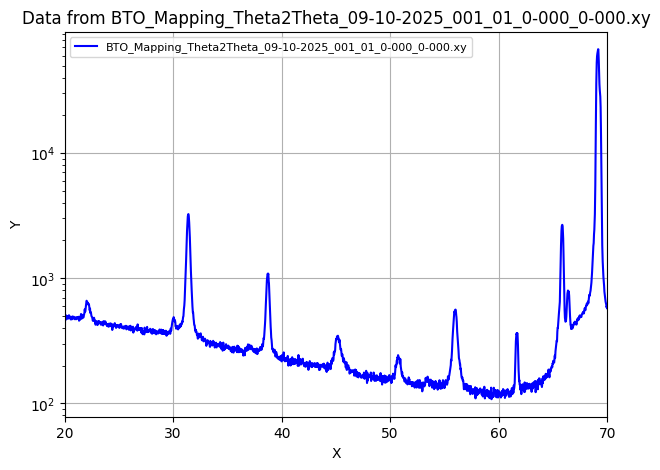

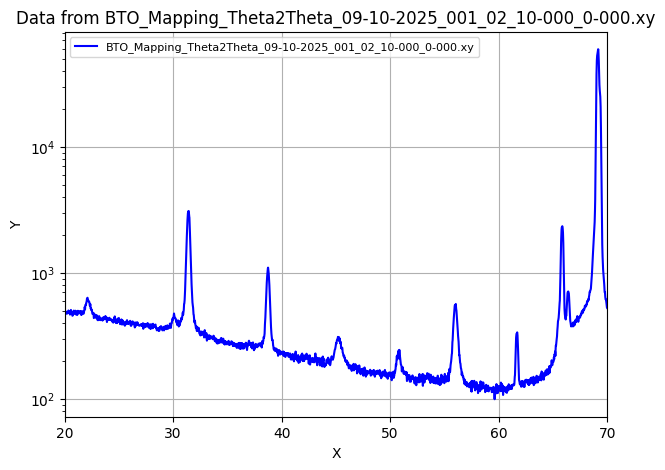

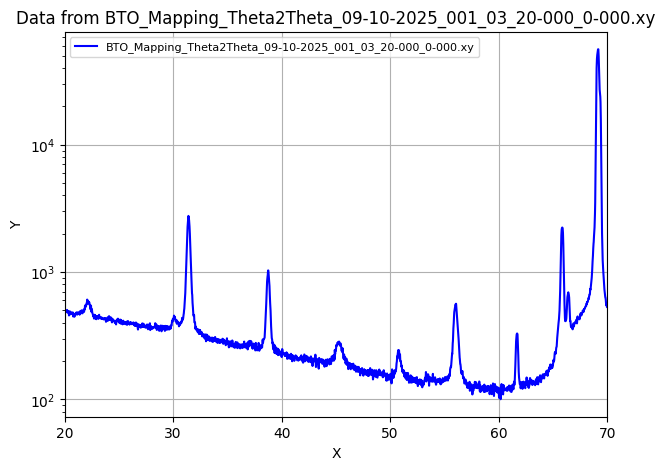

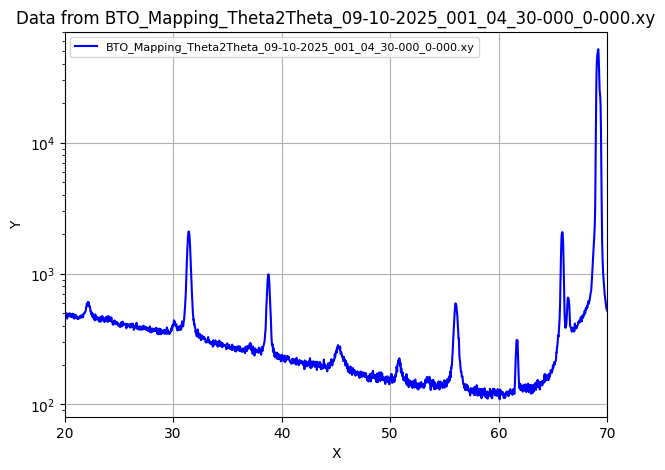

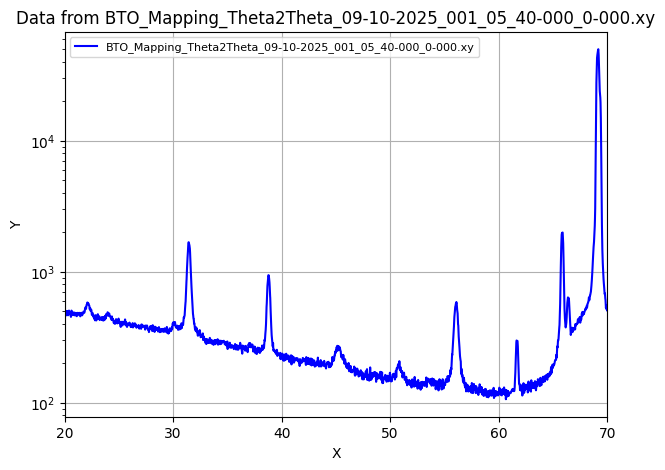

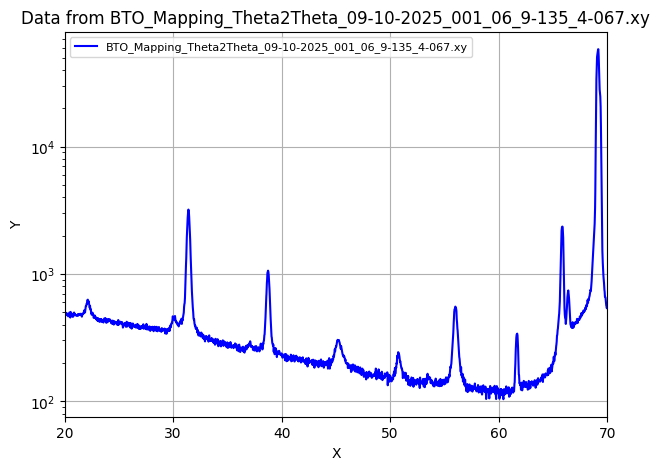

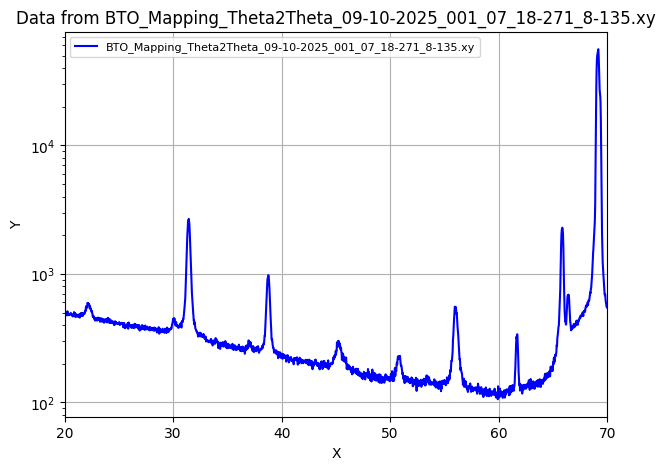

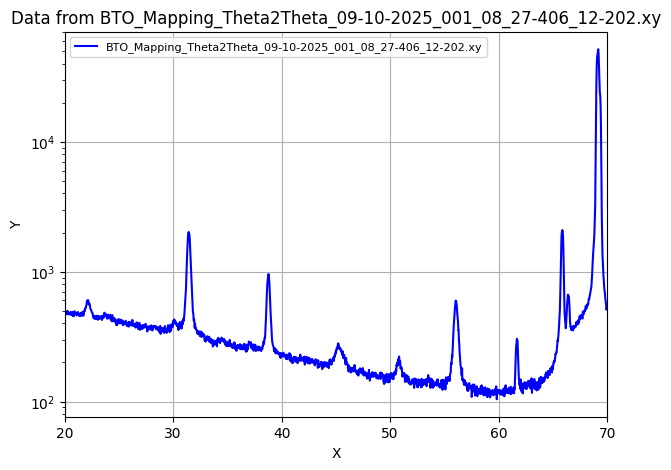

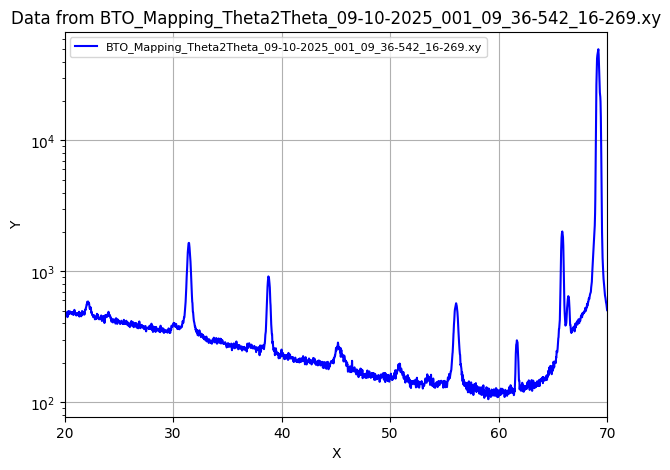

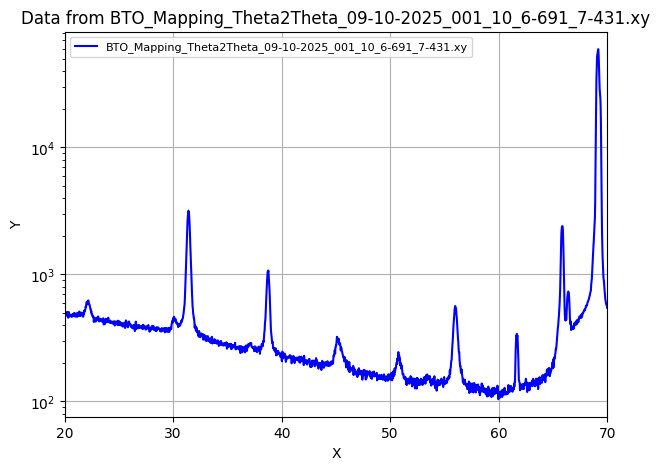

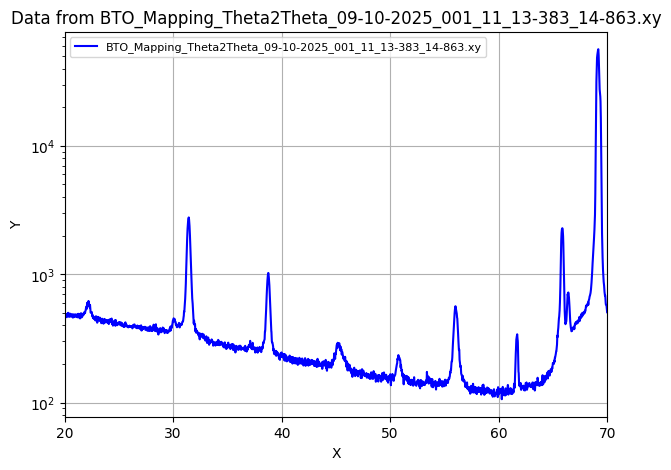

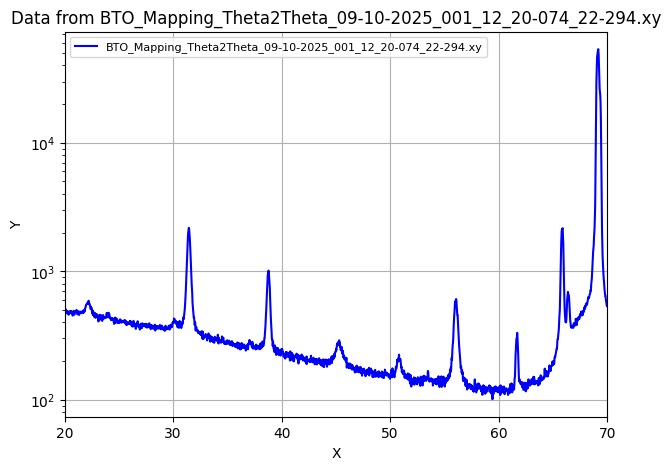

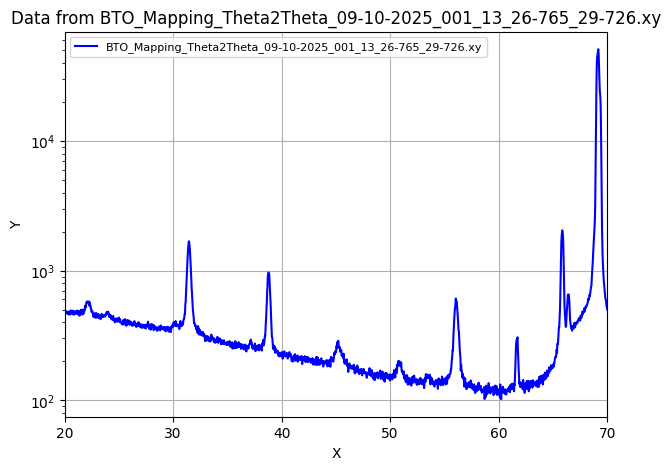

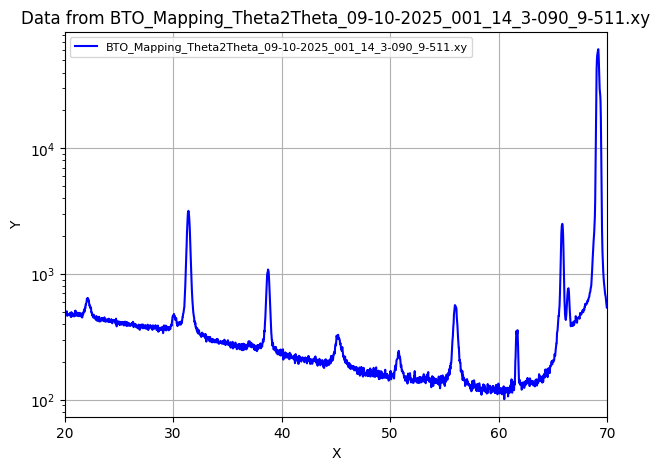

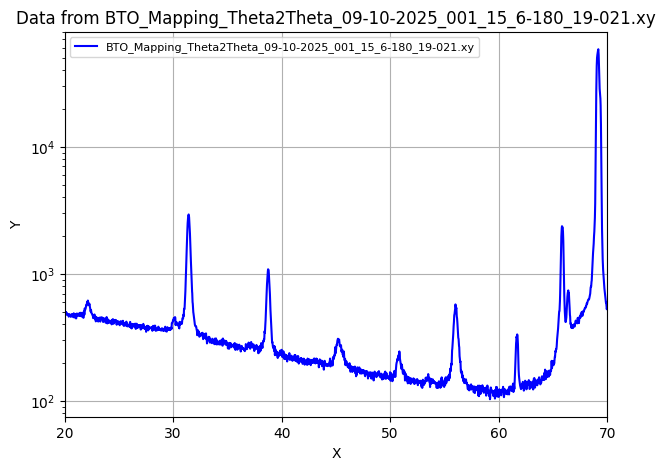

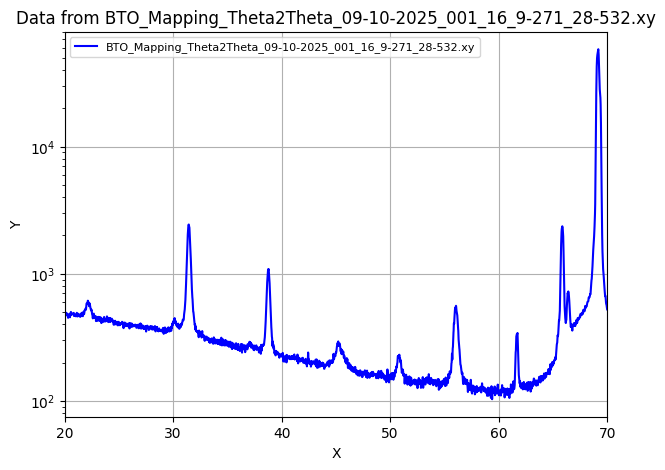

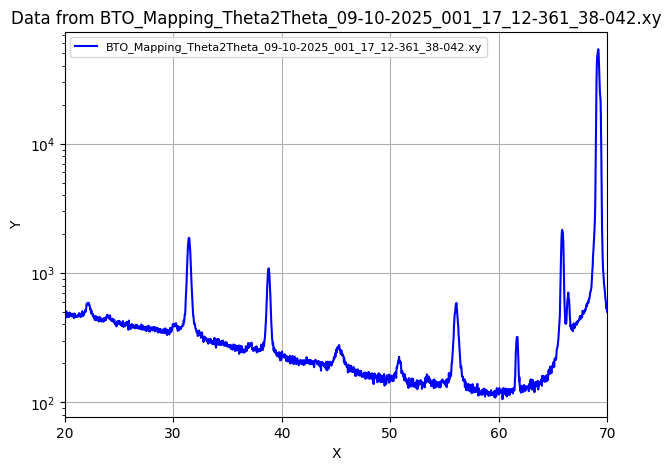

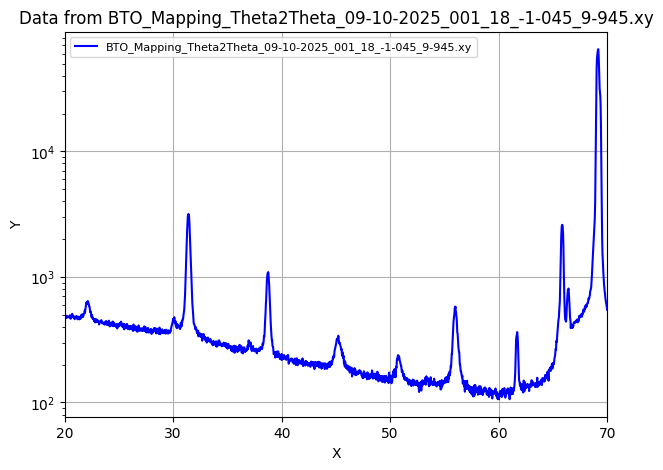

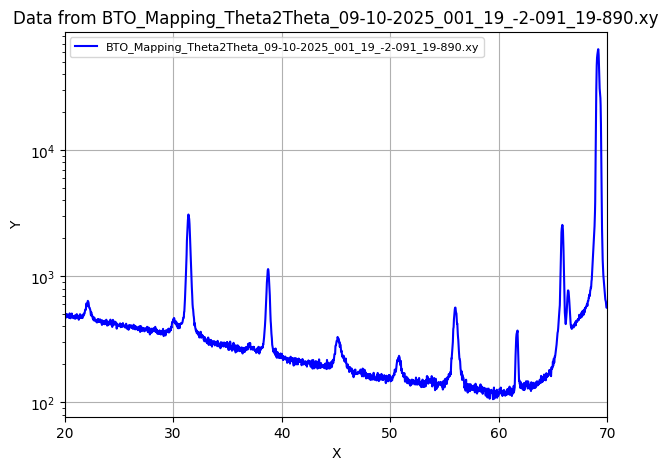

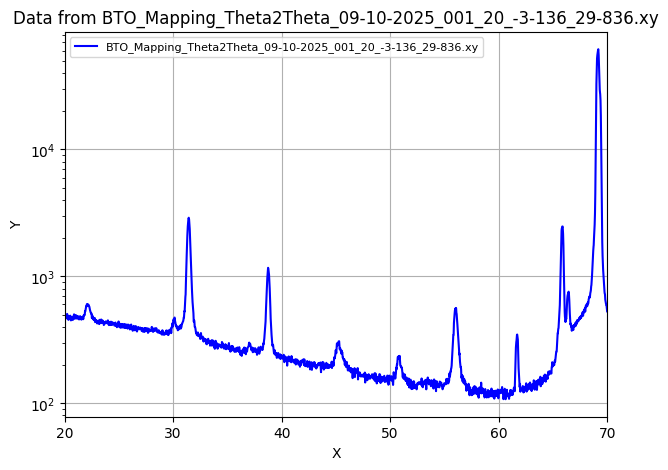

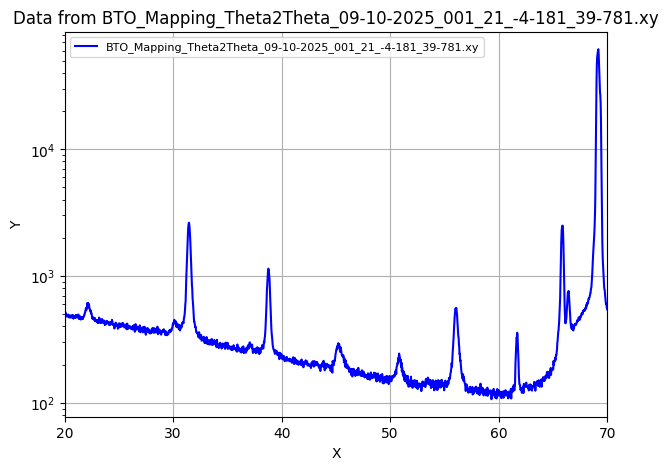

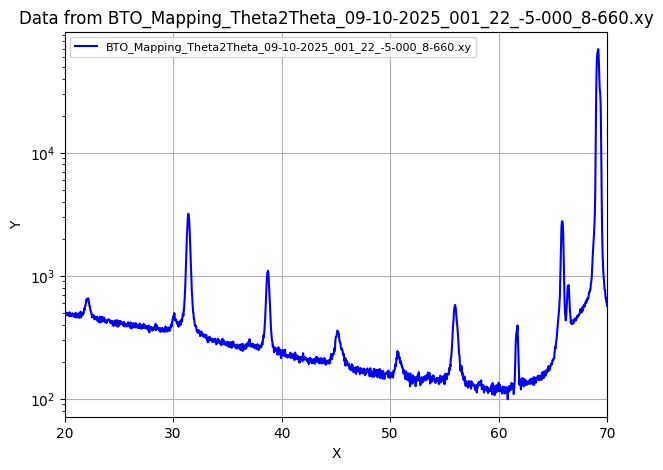

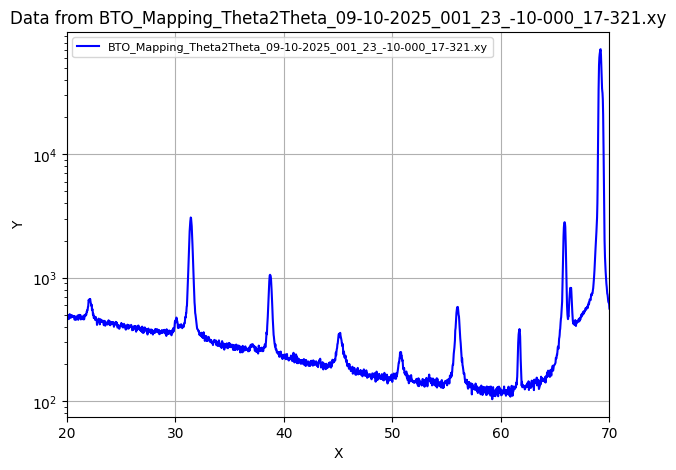

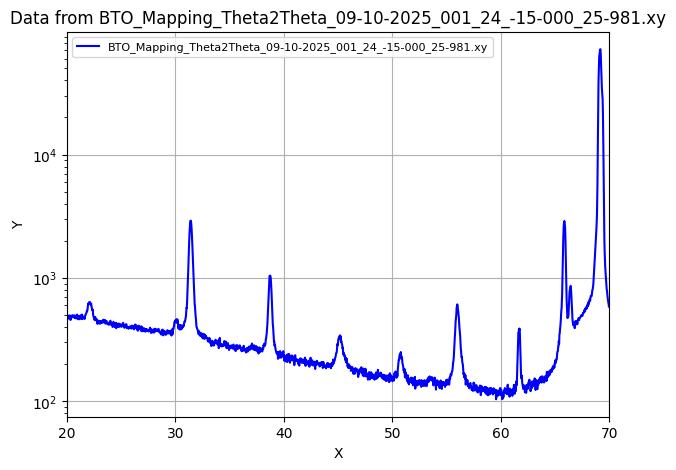

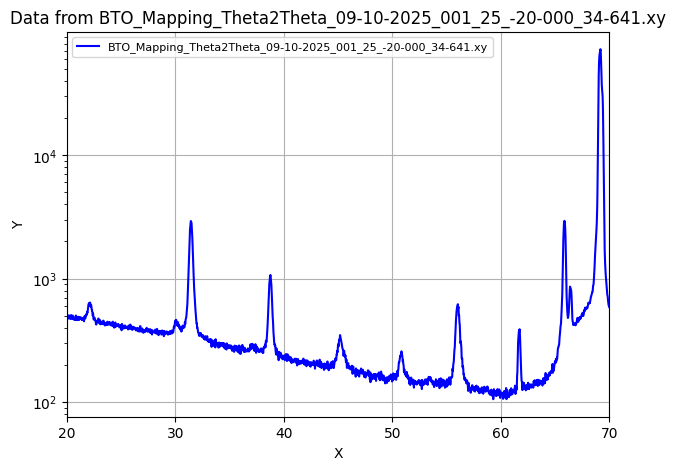

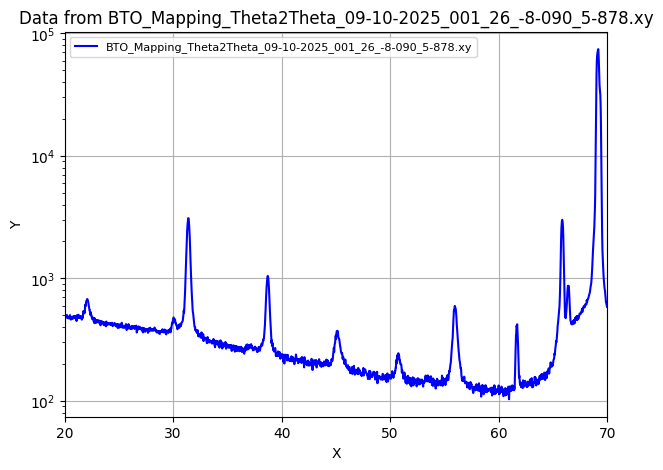

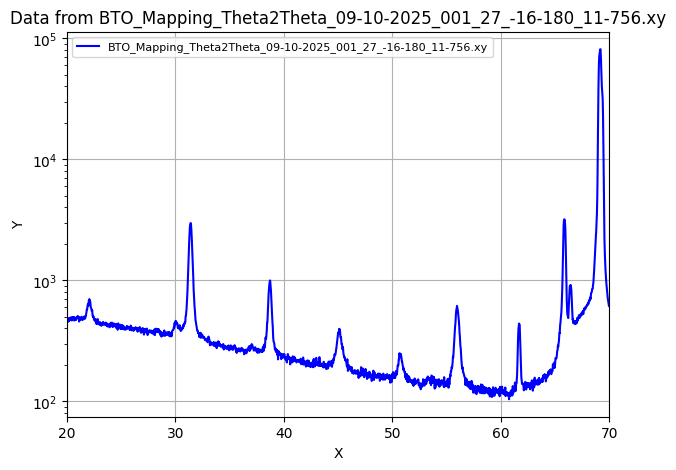

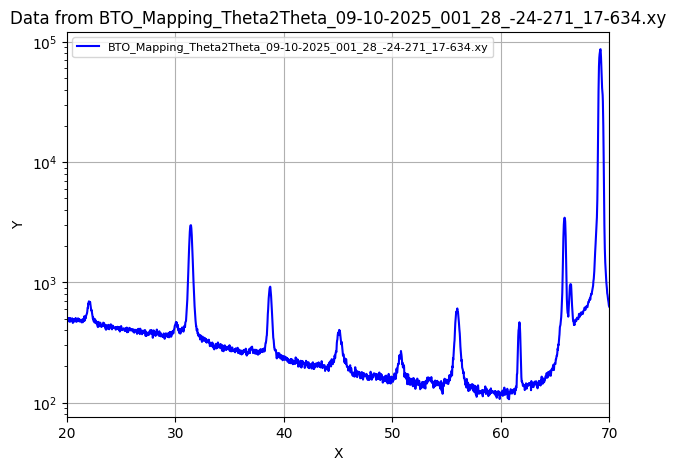

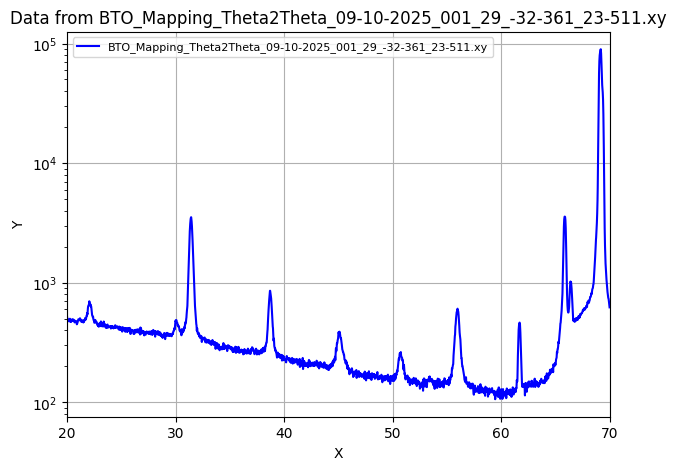

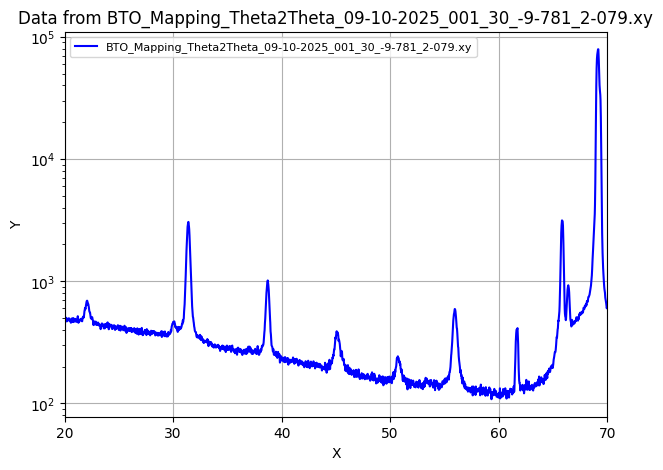

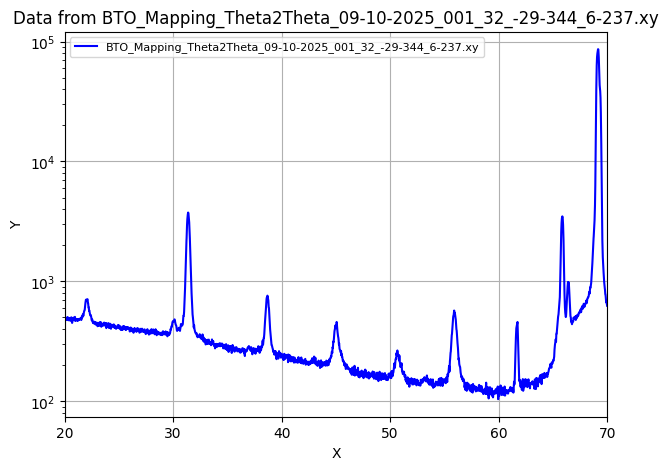

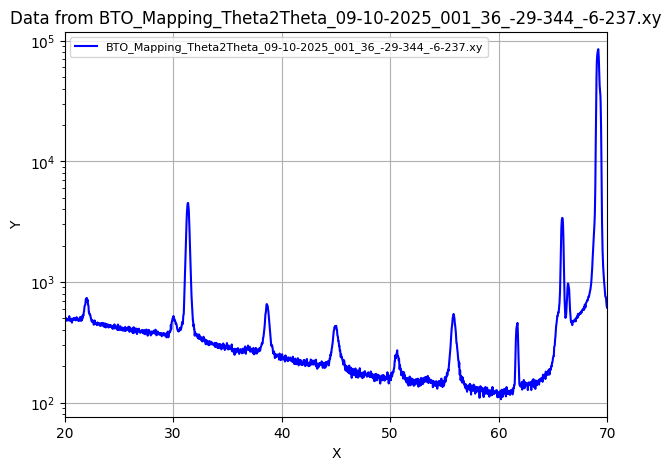

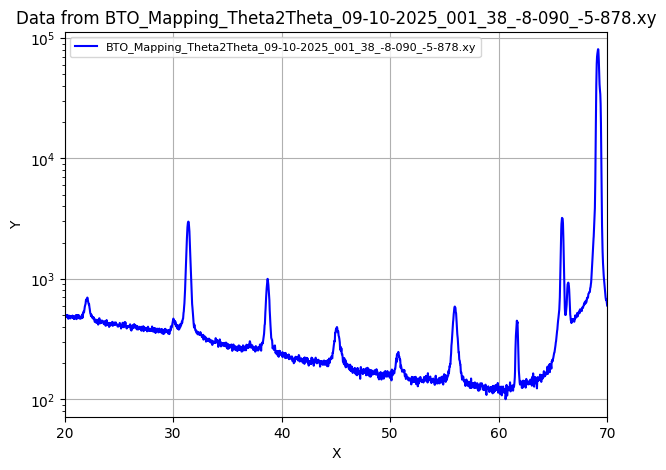

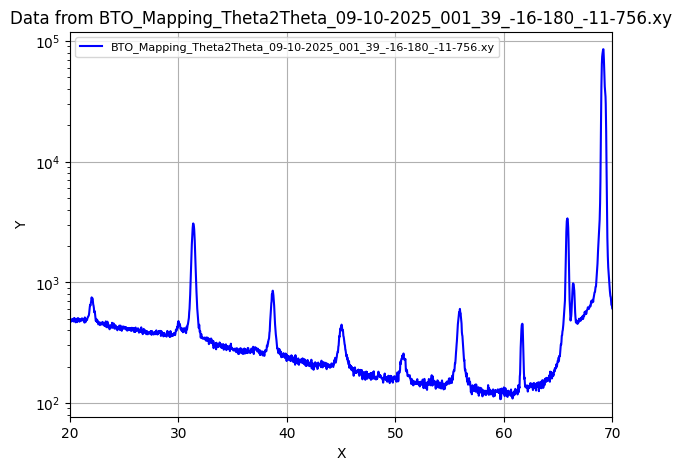

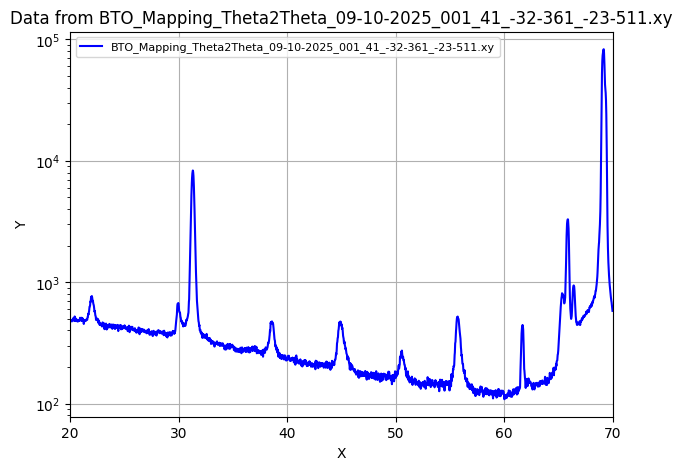

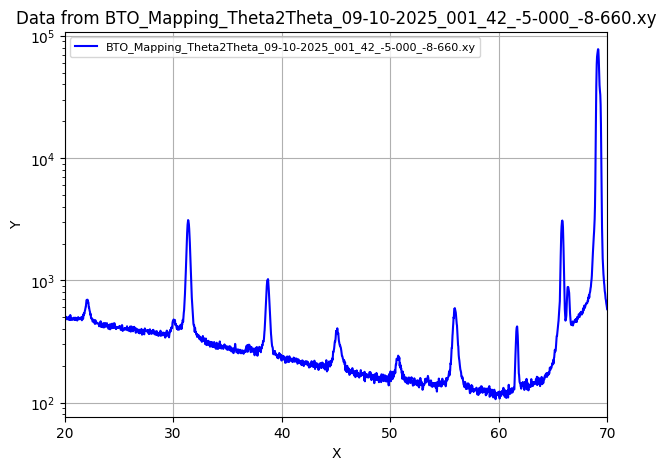

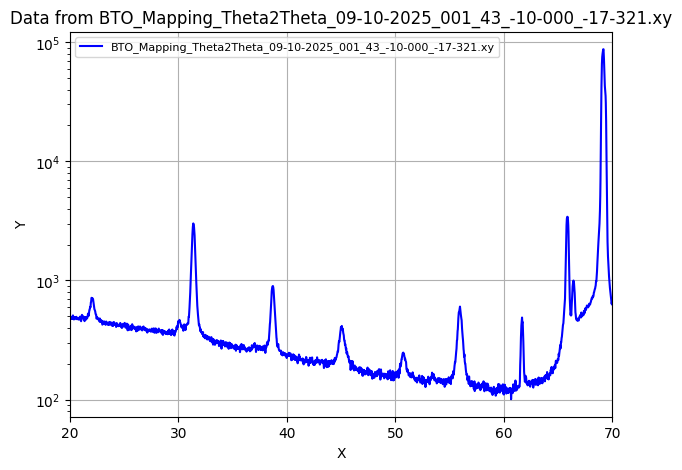

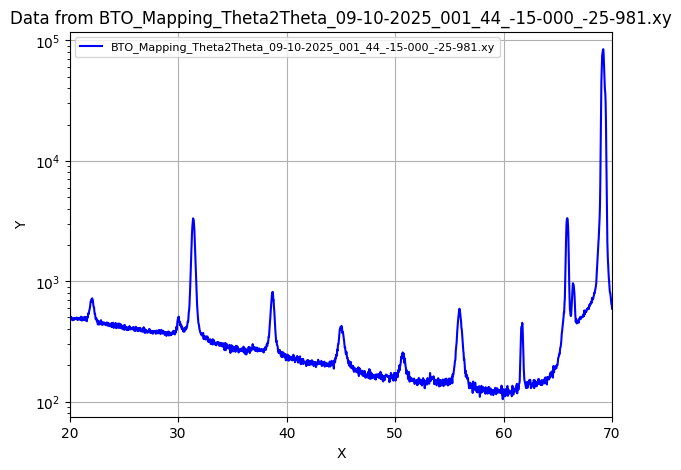

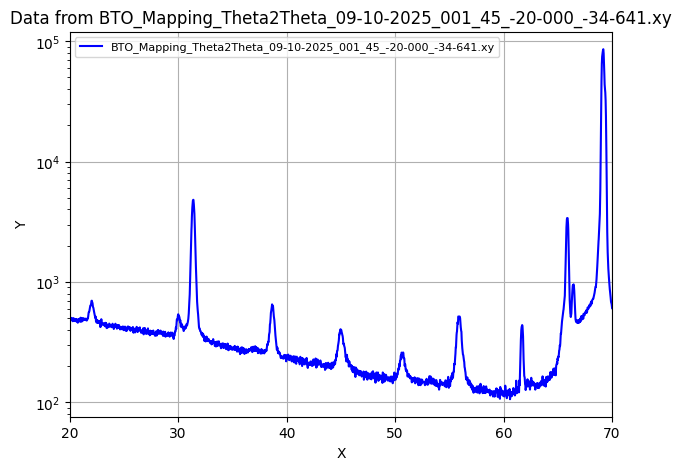

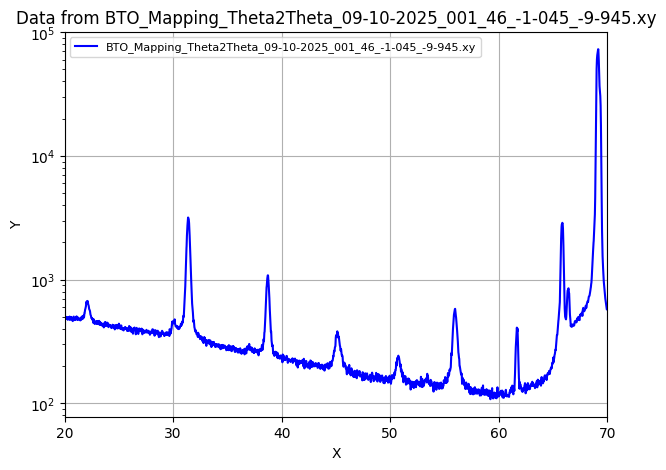

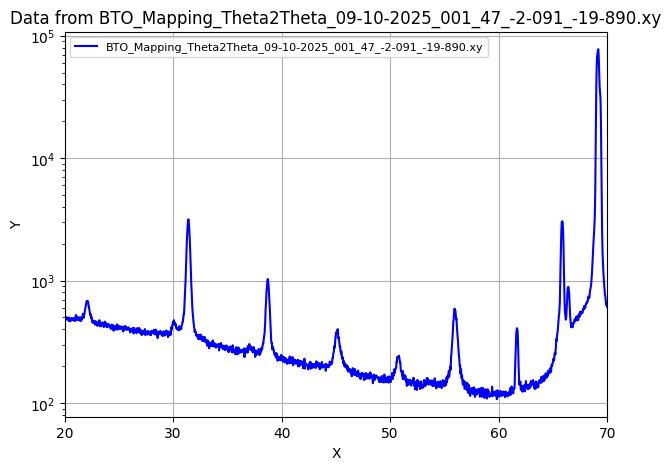

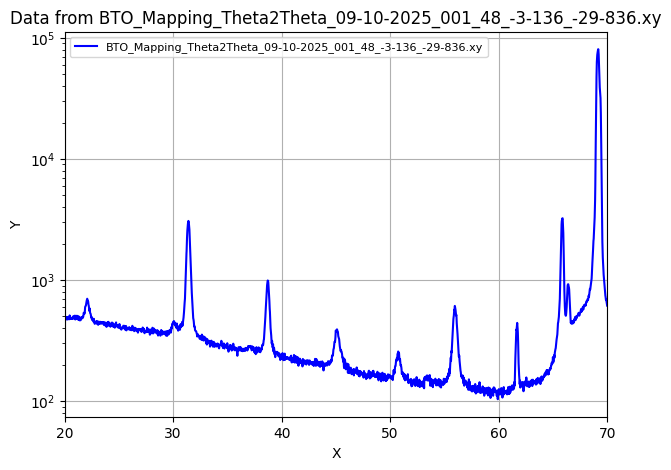

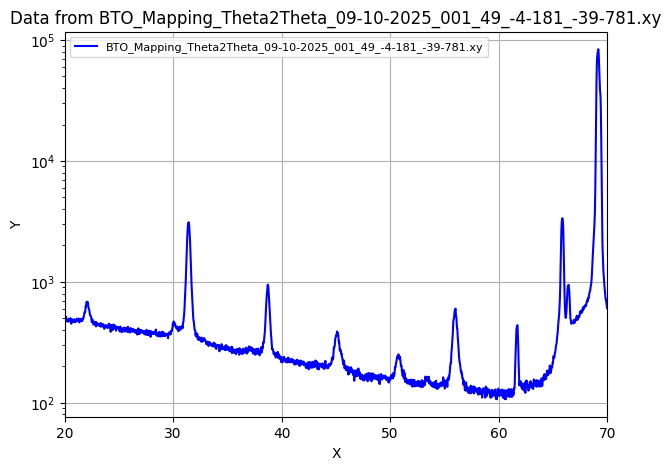

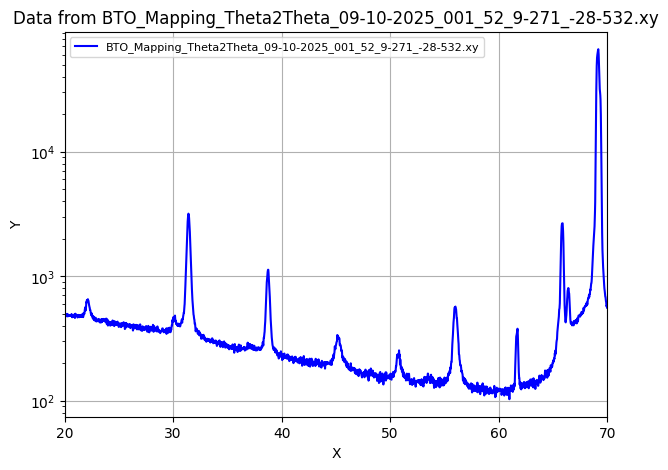

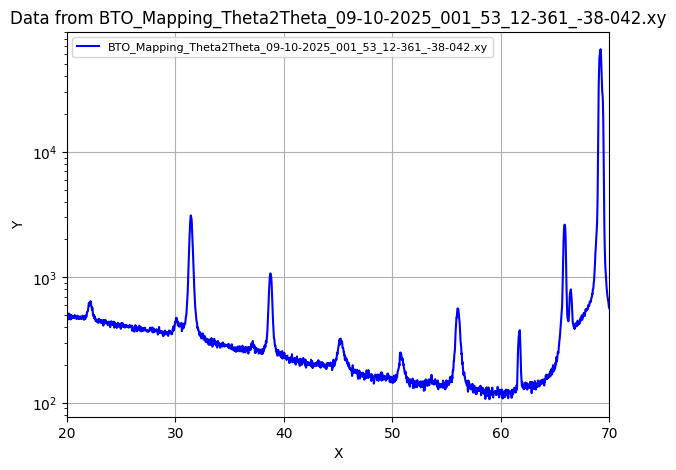

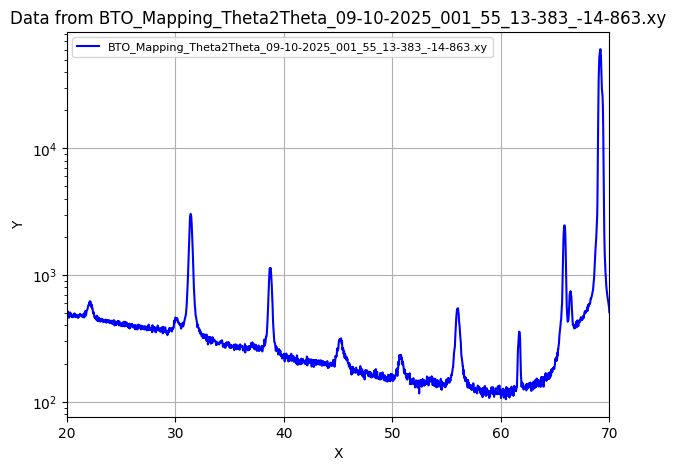

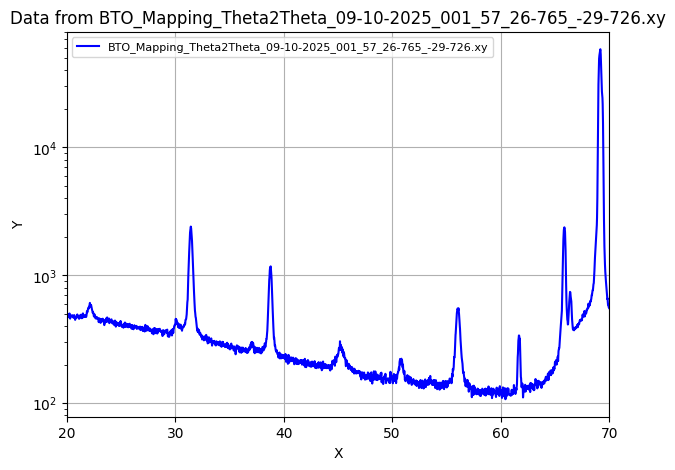

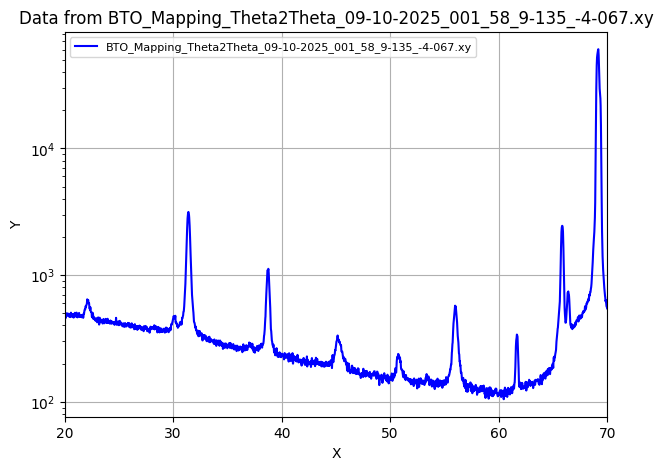

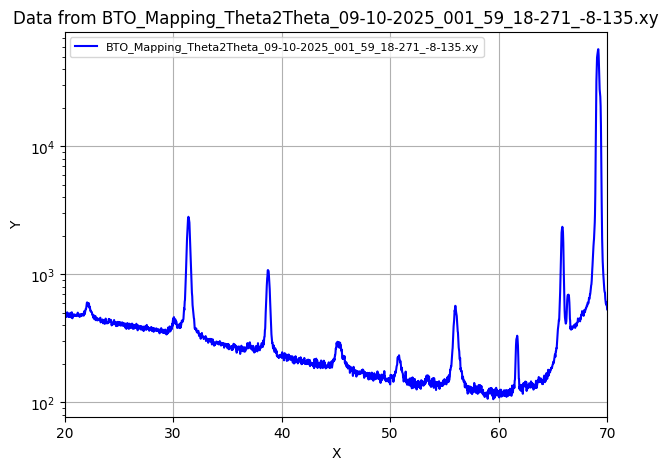

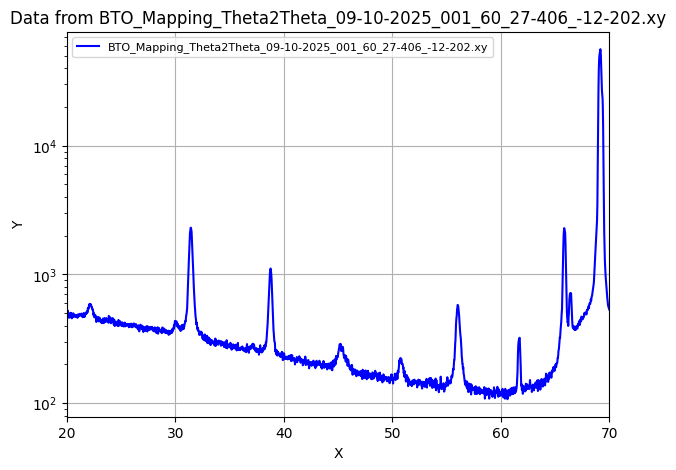

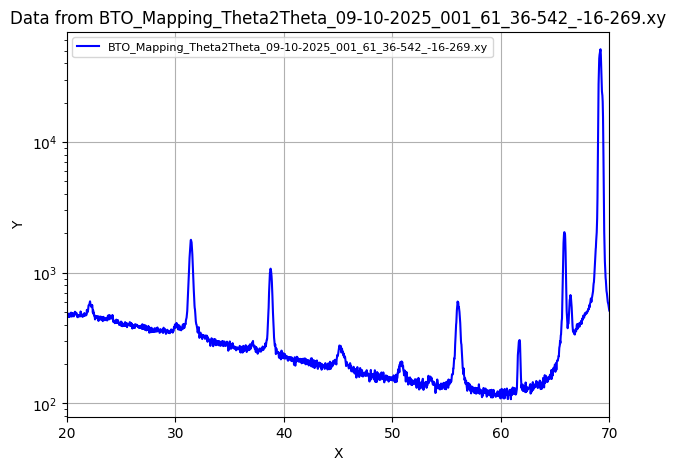

In [1]:
import pandas as pd
import numpy as np
import os, glob, re, csv
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths, savgol_filter
from scipy.optimize import curve_fit
from matplotlib.tri import Triangulation
from matplotlib.colors import LinearSegmentedColormap, PowerNorm, Normalize  # or Normalize
from pathlib import Path



# Show current working directory
print("Current directory:", os.getcwd())

# Change working directory
os.chdir("C:\\Dilan\\Study\\Master Thesis\\Characterization\\XRD\\09-10-2025 Dep 8")

folder = "C:\\Dilan\\Study\\Master Thesis\\Characterization\\XRD\\09-10-2025 Dep 8\\XY Data"
os.chdir(folder)

files = glob.glob("*.xy")

# Loop over each file and make a separate graph
for f in files:
    df = pd.read_csv(f, delim_whitespace=True, header=None, names=["X", "Y"])
    
    plt.figure(figsize=(7,5))
    plt.plot(df["X"], df["Y"], label=f, color="blue")
    plt.title(f"Data from {f}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(fontsize=8)
    plt.xlim(20,70)
    # plt.ylim(0,100000)
    plt.yscale('log')
    plt.grid()
    plt.show()

## Stacked Plot

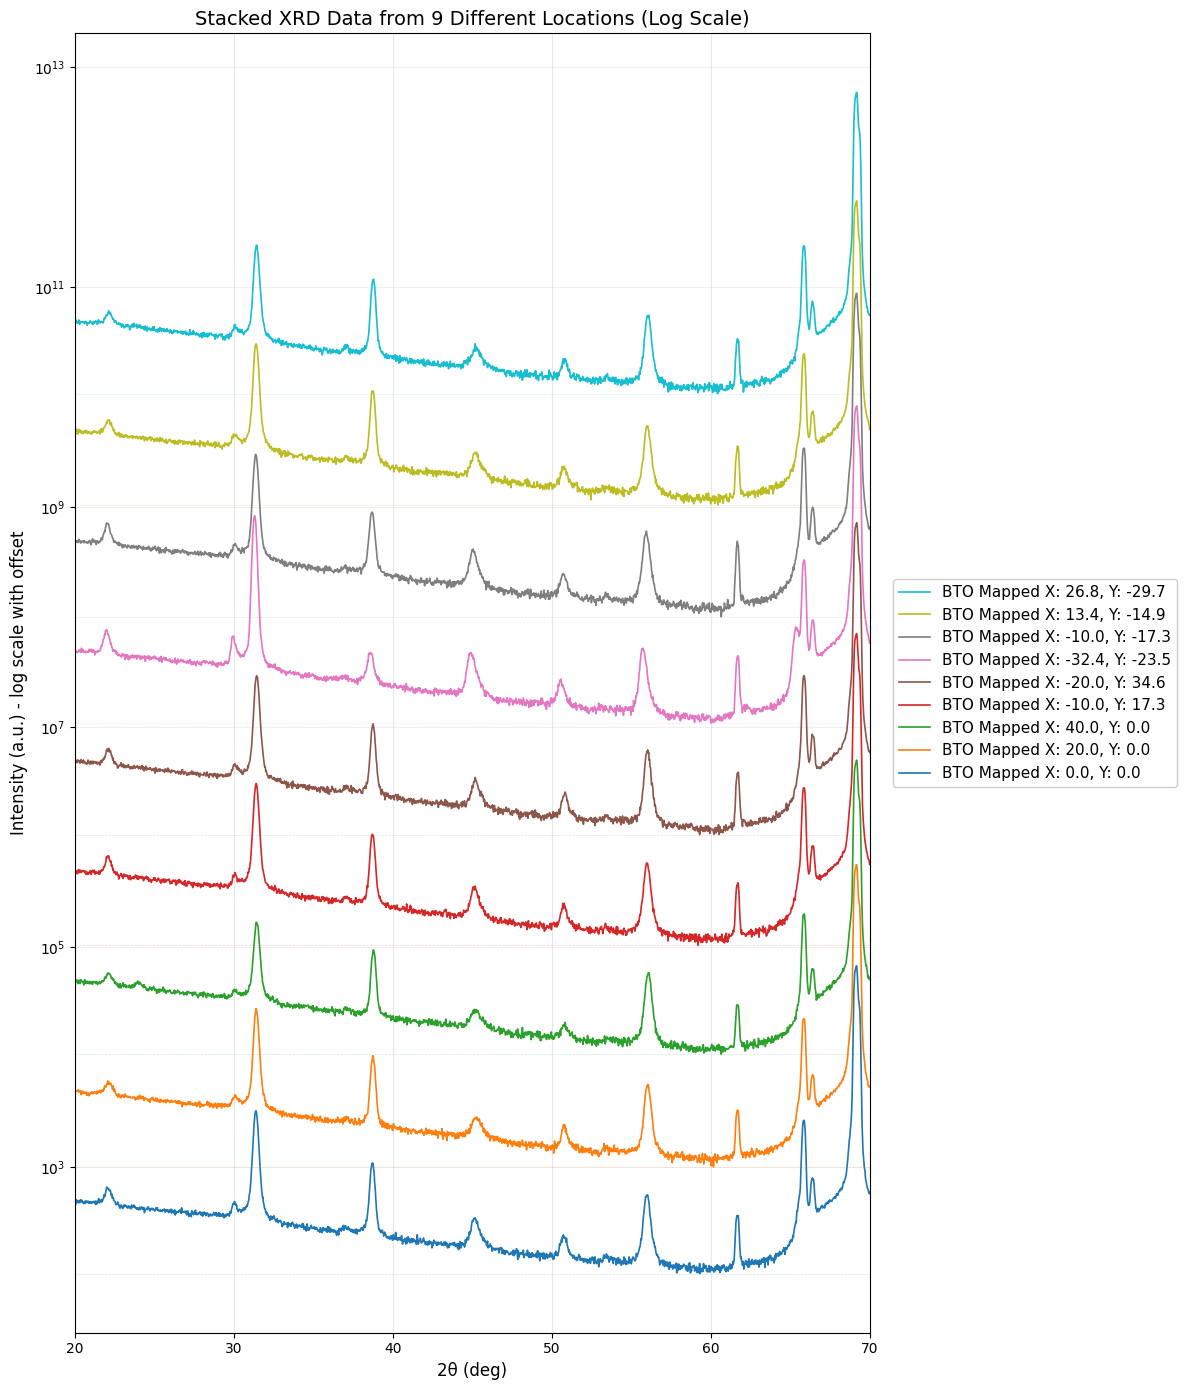

In [2]:
files_to_plot = [files[0], files[2], files[4], files[22], files[24], files[40], files[42], files[54], files[56]]

# Helper function to extract X and Y coordinates from filename
def extract_xy_from_filename(filename):
    """Extract X and Y coordinates from filename like 'something_X-value_Y-value.xy'"""
    name = os.path.basename(filename).rsplit('.', 1)[0]
    parts = name.split('_')
    try:
        x_str, y_str = parts[-2], parts[-1]
        # convert dash-separated decimals to proper floats
        def tok_to_float(t):
            if '-' in t[1:]:
                t = ('-' + t[1:].replace('-', '.', 1)) if t.startswith('-') else t.replace('-', '.', 1)
            return float(t)
        x_val, y_val = tok_to_float(x_str), tok_to_float(y_str)
        return x_val, y_val
    except Exception:
        return None, None

# Create ONE figure for all plots
fig, ax = plt.subplots(figsize=(12, 14))

# Define a colormap
colors = plt.cm.tab10(np.linspace(0, 1, len(files_to_plot)))

# Load data and prepare labels
data_list = []
label_list = []

for f in files_to_plot:
    df = pd.read_csv(f, delim_whitespace=True, header=None, names=["X", "Y"])
    data_list.append(df)
    
    # Extract coordinates and create label
    x_coord, y_coord = extract_xy_from_filename(f)
    if x_coord is not None and y_coord is not None:
        label = f"BTO Mapped X: {x_coord:.1f}, Y: {y_coord:.1f}"
    else:
        label = os.path.basename(f)
    label_list.append(label)

# Use logarithmic offset: multiply each curve by 10^idx
# This creates even spacing on a log scale
log_offset_factor = 10  # Each curve is shifted by factor of 10

# Store handles and labels for reverse ordering
handles = []
labels_for_legend = []

# Plot with logarithmic offsets
for idx, (df, label) in enumerate(zip(data_list, label_list)):
    # Multiply by 10^idx to create logarithmic offset
    offset_multiplier = log_offset_factor ** idx
    
    line, = ax.plot(df["X"], df["Y"] * offset_multiplier,
                    color=colors[idx], linewidth=1.2)
    
    handles.append(line)
    labels_for_legend.append(label)
    
    # Optional: Add horizontal gridline at baseline of each curve
    # Find the minimum value for this curve to draw baseline
    baseline = df["Y"].min() * offset_multiplier
    ax.axhline(y=baseline, color=colors[idx], linestyle='--',
               alpha=0.2, linewidth=0.5)

# Set logarithmic scale for Y-axis
ax.set_yscale('log')

# Reverse the order for legend (top curve appears at top of legend)
handles_reversed = handles[::-1]
labels_reversed = labels_for_legend[::-1]

# Add legend outside the plot on the right, with larger font
ax.legend(handles_reversed, labels_reversed, 
          loc='center left', fontsize=11, framealpha=0.95,
          bbox_to_anchor=(1.02, 0.5))

# Add labels and formatting
ax.set_title("Stacked XRD Data from 9 Different Locations (Log Scale)", fontsize=14)
ax.set_xlabel("2θ (deg)", fontsize=12)
ax.set_ylabel("Intensity (a.u.) - log scale with offset", fontsize=12)
ax.set_xlim(20, 70)
ax.grid(True, alpha=0.3, axis='x')  # Only vertical gridlines
ax.grid(True, alpha=0.2, axis='y', which='both')  # Add horizontal log grid
plt.tight_layout()
plt.show()

## Plots with smoothing, peak finding and various calculations


BTO_Mapping_Theta2Theta_09-10-2025_001_01_0-000_0-000.xy  peaks: 6
  (100)    [R1]   22.040°   I≈656.3   FWHM≈1.0743°   Area≈145.09
  (110)    [R2]   31.400°   I≈3249.6   FWHM≈1.7654°   Area≈1118.90
  (111)    [R3]   38.740°   I≈1085.6   FWHM≈1.4397°   Area≈339.59
  (200)    [R4]   45.180°   I≈345.1   FWHM≈1.7383°   Area≈133.08
  (210)    [R5]   50.720°   I≈237.3   FWHM≈1.4305°   Area≈61.14
  (112)    [R6]   56.010°   I≈561.4   FWHM≈1.7314°   Area≈241.92


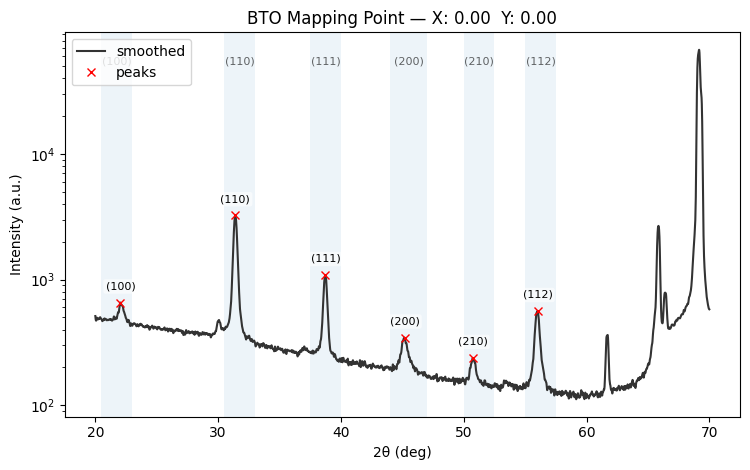


BTO_Mapping_Theta2Theta_09-10-2025_001_02_10-000_0-000.xy  peaks: 6
  (100)    [R1]   22.090°   I≈632.9   FWHM≈1.0847°   Area≈117.78
  (110)    [R2]   31.410°   I≈3104.7   FWHM≈1.7567°   Area≈1093.99
  (111)    [R3]   38.750°   I≈1089.7   FWHM≈1.4165°   Area≈335.69
  (200)    [R4]   45.260°   I≈303.7   FWHM≈1.5425°   Area≈117.05
  (210)    [R5]   50.760°   I≈239.8   FWHM≈1.3509°   Area≈63.91
  (112)    [R6]   56.020°   I≈556.5   FWHM≈1.7005°   Area≈226.07


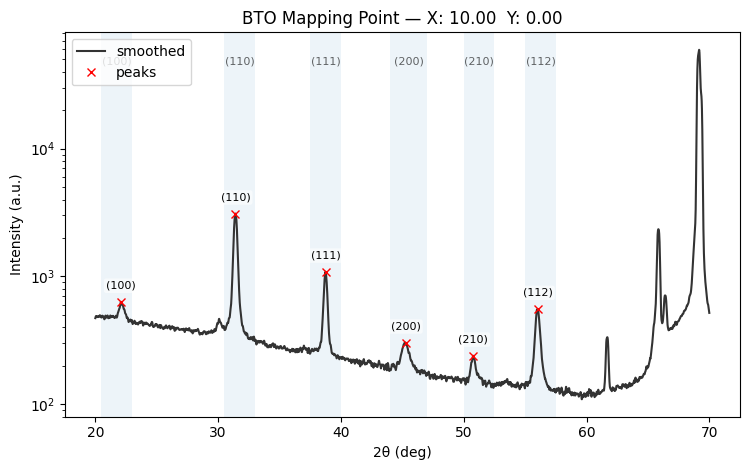


BTO_Mapping_Theta2Theta_09-10-2025_001_03_20-000_0-000.xy  peaks: 6
  (100)    [R1]   22.080°   I≈597.6   FWHM≈1.1424°   Area≈118.14
  (110)    [R2]   31.420°   I≈2713.2   FWHM≈1.7408°   Area≈928.33
  (111)    [R3]   38.760°   I≈1022.9   FWHM≈1.3991°   Area≈320.91
  (200)    [R4]   45.220°   I≈281.9   FWHM≈1.4292°   Area≈100.70
  (210)    [R5]   50.740°   I≈241.7   FWHM≈1.3212°   Area≈61.13
  (112)    [R6]   56.060°   I≈560.3   FWHM≈1.6743°   Area≈219.64



BTO_Mapping_Theta2Theta_09-10-2025_001_04_30-000_0-000.xy  peaks: 6
  (100)    [R1]   22.140°   I≈600.2   FWHM≈1.0490°   Area≈84.63
  (110)    [R2]   31.430°   I≈2086.3   FWHM≈1.7337°   Area≈715.70
  (111)    [R3]   38.780°   I≈973.1   FWHM≈1.3871°   Area≈289.02
  (200)    [R4]   45.190°   I≈277.1   FWHM≈1.4329°   Area≈100.18
  (210)    [R5]   50.850°   I≈219.4   FWHM≈1.2155°   Area≈41.36
  (112)    [R6]   56.040°   I≈589.2   FWHM≈1.6460°   Area≈237.16



BTO_Mapping_Theta2Theta_09-10-2025_001_05_40-000_0-000.xy  peaks: 6
  (100)    [R1]   22.110°   I≈580.9   FWHM≈1.1203°   Area≈84.17
  (110)    [R2]   31.430°   I≈1678.9   FWHM≈1.7293°   Area≈591.62
  (111)    [R3]   38.800°   I≈941.0   FWHM≈1.3692°   Area≈278.38
  (200)    [R4]   45.220°   I≈265.1   FWHM≈1.3929°   Area≈94.37
  (210)    [R5]   50.830°   I≈198.2   FWHM≈1.1370°   Area≈41.45
  (112)    [R6]   56.100°   I≈586.7   FWHM≈1.6348°   Area≈238.81


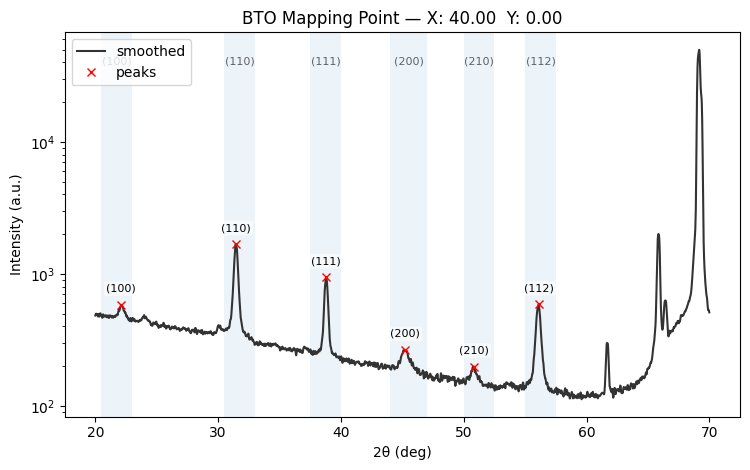


BTO_Mapping_Theta2Theta_09-10-2025_001_06_9-135_4-067.xy  peaks: 6
  (100)    [R1]   22.110°   I≈627.1   FWHM≈1.0675°   Area≈113.72
  (110)    [R2]   31.410°   I≈3157.1   FWHM≈1.7519°   Area≈1086.38
  (111)    [R3]   38.750°   I≈1053.4   FWHM≈1.4196°   Area≈323.85
  (200)    [R4]   45.170°   I≈301.1   FWHM≈1.5516°   Area≈109.61
  (210)    [R5]   50.760°   I≈241.8   FWHM≈1.3459°   Area≈56.79
  (112)    [R6]   56.020°   I≈551.5   FWHM≈1.6846°   Area≈217.51


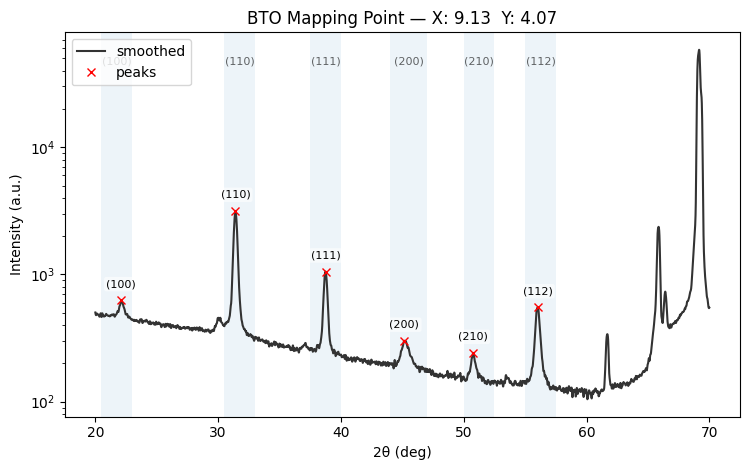


BTO_Mapping_Theta2Theta_09-10-2025_001_07_18-271_8-135.xy  peaks: 6
  (100)    [R1]   22.140°   I≈592.1   FWHM≈1.0656°   Area≈81.88
  (110)    [R2]   31.430°   I≈2647.2   FWHM≈1.7424°   Area≈902.53
  (111)    [R3]   38.770°   I≈975.4   FWHM≈1.3996°   Area≈287.78
  (200)    [R4]   45.240°   I≈295.7   FWHM≈1.4377°   Area≈91.14
  (210)    [R5]   50.740°   I≈228.3   FWHM≈1.3083°   Area≈58.54
  (112)    [R6]   55.980°   I≈546.9   FWHM≈1.6745°   Area≈222.69


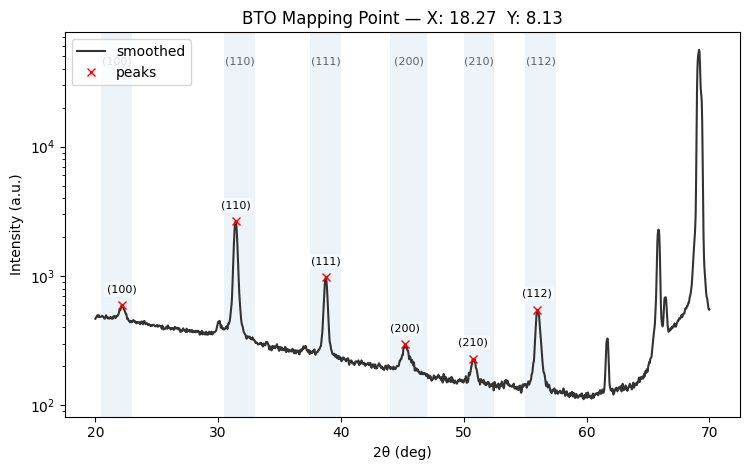


BTO_Mapping_Theta2Theta_09-10-2025_001_08_27-406_12-202.xy  peaks: 6
  (100)    [R1]   22.160°   I≈600.9   FWHM≈1.0490°   Area≈83.30
  (110)    [R2]   31.430°   I≈2018.5   FWHM≈1.7324°   Area≈724.46
  (111)    [R3]   38.790°   I≈953.6   FWHM≈1.3787°   Area≈282.78
  (200)    [R4]   45.210°   I≈279.8   FWHM≈1.3787°   Area≈90.79
  (210)    [R5]   50.830°   I≈215.8   FWHM≈1.2498°   Area≈44.19
  (112)    [R6]   56.050°   I≈600.7   FWHM≈1.6502°   Area≈254.26


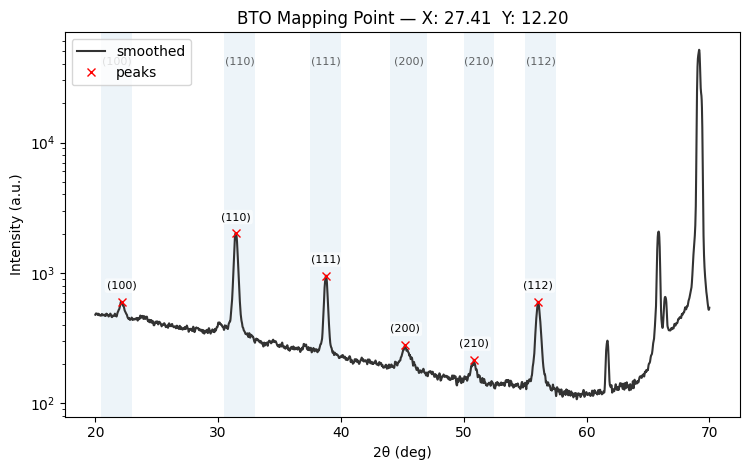


BTO_Mapping_Theta2Theta_09-10-2025_001_09_36-542_16-269.xy  peaks: 6
  (100)    [R1]   22.160°   I≈582.1   FWHM≈1.0456°   Area≈74.86
  (110)    [R2]   31.450°   I≈1653.0   FWHM≈1.7242°   Area≈577.69
  (111)    [R3]   38.800°   I≈910.5   FWHM≈1.3584°   Area≈264.43
  (200)    [R4]   45.190°   I≈279.5   FWHM≈1.3772°   Area≈82.12
  (210)    [R5]   50.880°   I≈194.9   FWHM≈1.0710°   Area≈34.25
  (112)    [R6]   56.080°   I≈567.8   FWHM≈1.6485°   Area≈238.92


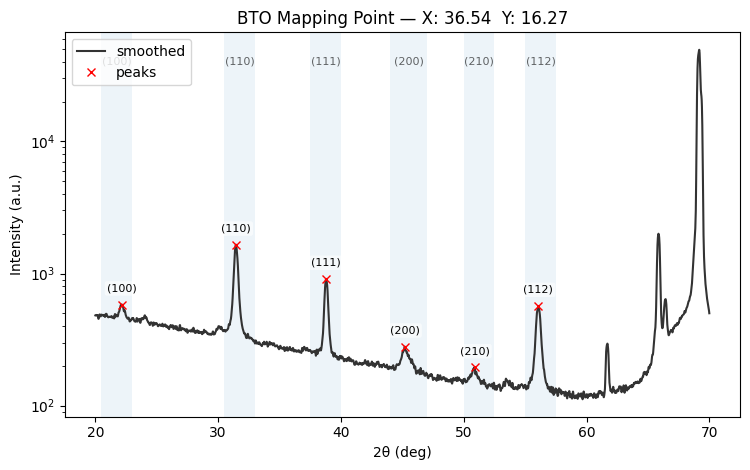


BTO_Mapping_Theta2Theta_09-10-2025_001_10_6-691_7-431.xy  peaks: 6
  (100)    [R1]   22.180°   I≈619.1   FWHM≈1.0813°   Area≈119.72
  (110)    [R2]   31.420°   I≈3142.8   FWHM≈1.7488°   Area≈1075.41
  (111)    [R3]   38.750°   I≈1060.7   FWHM≈1.4160°   Area≈329.04
  (200)    [R4]   45.100°   I≈312.6   FWHM≈1.5805°   Area≈107.12
  (210)    [R5]   50.760°   I≈235.3   FWHM≈1.3776°   Area≈55.81
  (112)    [R6]   56.010°   I≈558.5   FWHM≈1.6934°   Area≈224.53


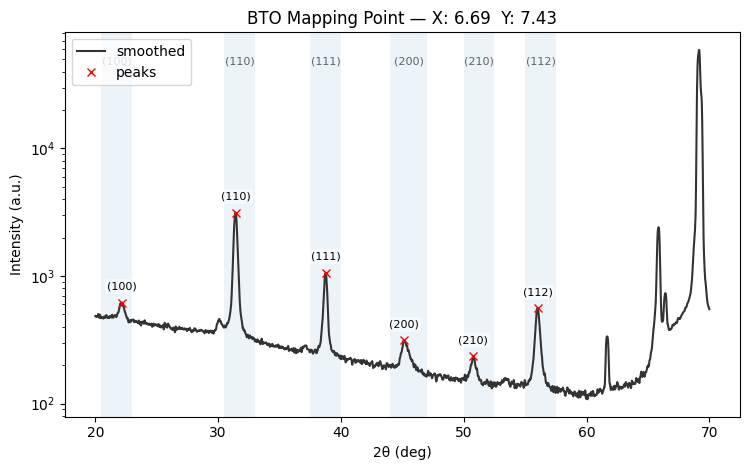


BTO_Mapping_Theta2Theta_09-10-2025_001_11_13-383_14-863.xy  peaks: 6
  (100)    [R1]   22.190°   I≈614.1   FWHM≈1.0488°   Area≈95.68
  (110)    [R2]   31.430°   I≈2746.5   FWHM≈1.7374°   Area≈939.38
  (111)    [R3]   38.770°   I≈1015.9   FWHM≈1.3959°   Area≈310.91
  (200)    [R4]   45.190°   I≈290.2   FWHM≈1.4034°   Area≈107.58
  (210)    [R5]   50.770°   I≈227.0   FWHM≈1.2824°   Area≈59.79
  (112)    [R6]   56.020°   I≈554.6   FWHM≈1.6708°   Area≈221.40


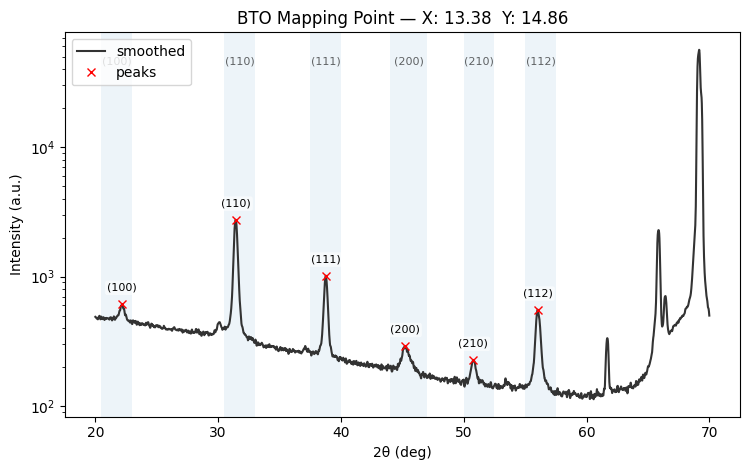


BTO_Mapping_Theta2Theta_09-10-2025_001_12_20-074_22-294.xy  peaks: 6
  (100)    [R1]   22.200°   I≈585.2   FWHM≈1.0919°   Area≈101.13
  (110)    [R2]   31.450°   I≈2162.1   FWHM≈1.7252°   Area≈737.81
  (111)    [R3]   38.790°   I≈1004.0   FWHM≈1.3708°   Area≈288.28
  (200)    [R4]   45.310°   I≈279.0   FWHM≈1.4023°   Area≈89.71
  (210)    [R5]   50.800°   I≈218.2   FWHM≈1.2365°   Area≈48.03
  (112)    [R6]   56.080°   I≈597.4   FWHM≈1.6470°   Area≈244.26


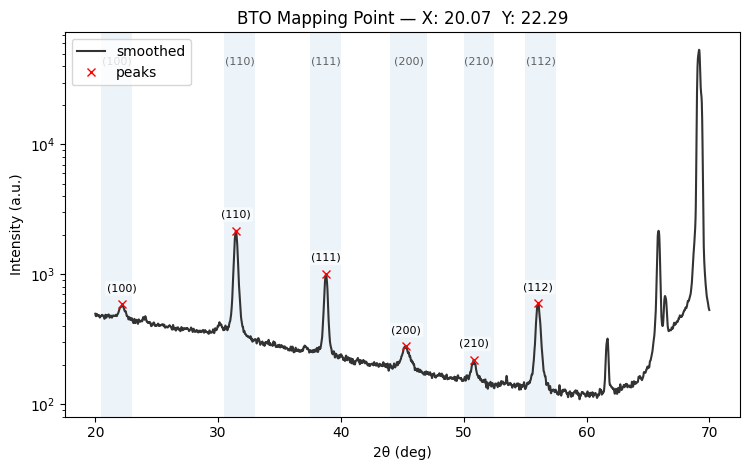


BTO_Mapping_Theta2Theta_09-10-2025_001_13_26-765_29-726.xy  peaks: 6
  (100)    [R1]   22.190°   I≈578.9   FWHM≈1.1172°   Area≈77.41
  (110)    [R2]   31.460°   I≈1674.8   FWHM≈1.7181°   Area≈575.69
  (111)    [R3]   38.810°   I≈968.9   FWHM≈1.3572°   Area≈285.72
  (200)    [R4]   45.220°   I≈278.9   FWHM≈1.3860°   Area≈86.05
  (210)    [R5]   50.760°   I≈200.1   FWHM≈1.1044°   Area≈38.19
  (112)    [R6]   56.060°   I≈592.6   FWHM≈1.6315°   Area≈237.16



BTO_Mapping_Theta2Theta_09-10-2025_001_14_3-090_9-511.xy  peaks: 6
  (100)    [R1]   22.090°   I≈636.9   FWHM≈1.0886°   Area≈120.29
  (110)    [R2]   31.400°   I≈3160.2   FWHM≈1.7527°   Area≈1084.72
  (111)    [R3]   38.760°   I≈1075.0   FWHM≈1.4220°   Area≈342.43
  (200)    [R4]   45.190°   I≈326.3   FWHM≈1.6487°   Area≈122.60
  (210)    [R5]   50.770°   I≈235.1   FWHM≈1.3511°   Area≈55.57
  (112)    [R6]   55.980°   I≈562.4   FWHM≈1.6990°   Area≈239.65



BTO_Mapping_Theta2Theta_09-10-2025_001_15_6-180_19-021.xy  peaks: 6
  (100)    [R1]   22.150°   I≈602.8   FWHM≈1.0901°   Area≈114.06
  (110)    [R2]   31.420°   I≈2936.0   FWHM≈1.7378°   Area≈1026.16
  (111)    [R3]   38.770°   I≈1086.9   FWHM≈1.3955°   Area≈323.59
  (200)    [R4]   45.170°   I≈304.2   FWHM≈1.4691°   Area≈109.60
  (210)    [R5]   50.850°   I≈233.9   FWHM≈1.3472°   Area≈50.62
  (112)    [R6]   56.030°   I≈562.6   FWHM≈1.6732°   Area≈225.81


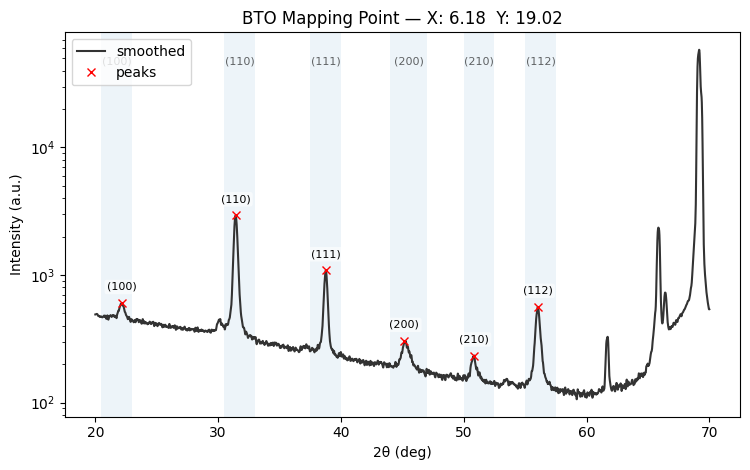


BTO_Mapping_Theta2Theta_09-10-2025_001_16_9-271_28-532.xy  peaks: 6
  (100)    [R1]   22.160°   I≈600.2   FWHM≈1.0359°   Area≈97.19
  (110)    [R2]   31.430°   I≈2425.7   FWHM≈1.7274°   Area≈849.58
  (111)    [R3]   38.780°   I≈1088.2   FWHM≈1.3798°   Area≈319.53
  (200)    [R4]   45.190°   I≈285.2   FWHM≈1.3715°   Area≈96.38
  (210)    [R5]   50.820°   I≈228.3   FWHM≈1.2612°   Area≈51.99
  (112)    [R6]   56.060°   I≈552.7   FWHM≈1.6638°   Area≈232.69



BTO_Mapping_Theta2Theta_09-10-2025_001_17_12-361_38-042.xy  peaks: 6
  (100)    [R1]   22.180°   I≈582.4   FWHM≈1.0391°   Area≈100.21
  (110)    [R2]   31.460°   I≈1869.8   FWHM≈1.7140°   Area≈648.06
  (111)    [R3]   38.800°   I≈1085.5   FWHM≈1.3623°   Area≈330.66
  (200)    [R4]   45.280°   I≈274.2   FWHM≈1.3887°   Area≈98.75
  (210)    [R5]   50.820°   I≈218.9   FWHM≈1.2429°   Area≈42.32
  (112)    [R6]   56.090°   I≈575.2   FWHM≈1.6328°   Area≈231.57



BTO_Mapping_Theta2Theta_09-10-2025_001_18_-1-045_9-945.xy  peaks: 6
  (100)    [R1]   22.150°   I≈635.2   FWHM≈1.0831°   Area≈104.49
  (110)    [R2]   31.420°   I≈3155.8   FWHM≈1.7582°   Area≈1116.85
  (111)    [R3]   38.750°   I≈1090.2   FWHM≈1.4274°   Area≈340.88
  (200)    [R4]   45.220°   I≈334.8   FWHM≈1.7155°   Area≈124.24
  (210)    [R5]   50.710°   I≈233.9   FWHM≈1.3452°   Area≈57.17
  (112)    [R6]   55.990°   I≈574.2   FWHM≈1.7138°   Area≈226.66


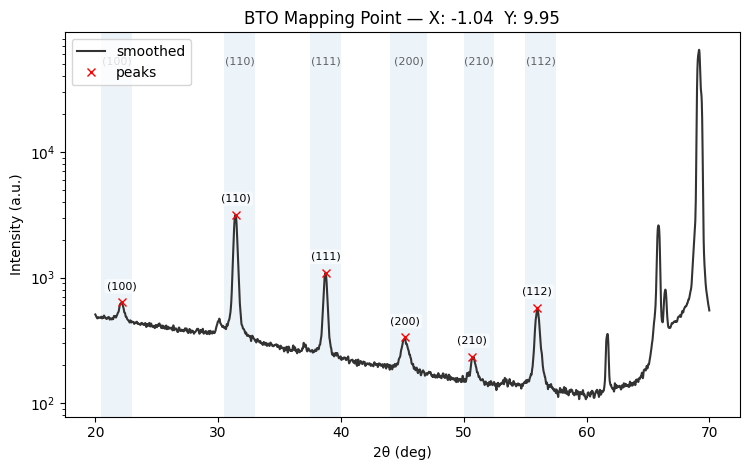


BTO_Mapping_Theta2Theta_09-10-2025_001_19_-2-091_19-890.xy  peaks: 6
  (100)    [R1]   22.150°   I≈635.1   FWHM≈1.0556°   Area≈100.49
  (110)    [R2]   31.420°   I≈3046.9   FWHM≈1.7441°   Area≈1054.33
  (111)    [R3]   38.750°   I≈1142.4   FWHM≈1.4088°   Area≈340.18
  (200)    [R4]   45.180°   I≈325.8   FWHM≈1.6320°   Area≈115.28
  (210)    [R5]   50.830°   I≈230.9   FWHM≈1.3244°   Area≈56.58
  (112)    [R6]   56.000°   I≈564.5   FWHM≈1.6916°   Area≈226.79



BTO_Mapping_Theta2Theta_09-10-2025_001_20_-3-136_29-836.xy  peaks: 6
  (100)    [R1]   22.080°   I≈602.3   FWHM≈1.1064°   Area≈116.75
  (110)    [R2]   31.440°   I≈2886.6   FWHM≈1.7329°   Area≈991.44
  (111)    [R3]   38.760°   I≈1155.1   FWHM≈1.3904°   Area≈349.54
  (200)    [R4]   45.270°   I≈309.4   FWHM≈1.5469°   Area≈94.83
  (210)    [R5]   50.850°   I≈233.4   FWHM≈1.3059°   Area≈61.54
  (112)    [R6]   56.050°   I≈556.7   FWHM≈1.6665°   Area≈228.74


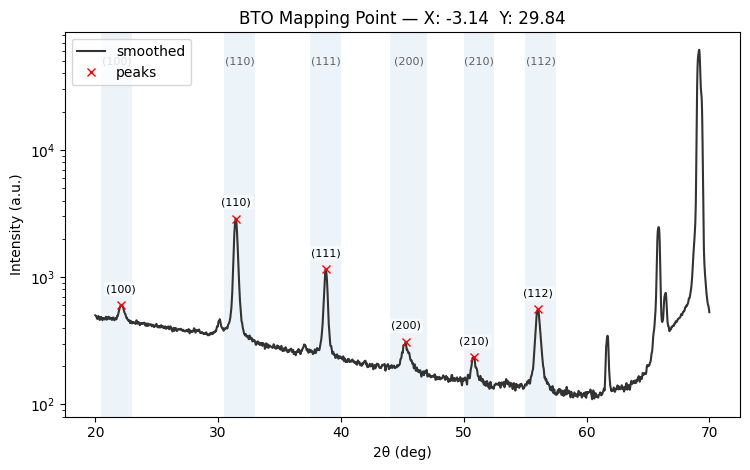


BTO_Mapping_Theta2Theta_09-10-2025_001_21_-4-181_39-781.xy  peaks: 6
  (100)    [R1]   22.200°   I≈602.9   FWHM≈1.0887°   Area≈80.78
  (110)    [R2]   31.460°   I≈2620.0   FWHM≈1.7133°   Area≈927.74
  (111)    [R3]   38.780°   I≈1137.3   FWHM≈1.3742°   Area≈332.06
  (200)    [R4]   45.300°   I≈288.0   FWHM≈1.4141°   Area≈87.79
  (210)    [R5]   50.850°   I≈241.2   FWHM≈1.3256°   Area≈61.64
  (112)    [R6]   56.070°   I≈554.4   FWHM≈1.6386°   Area≈223.69


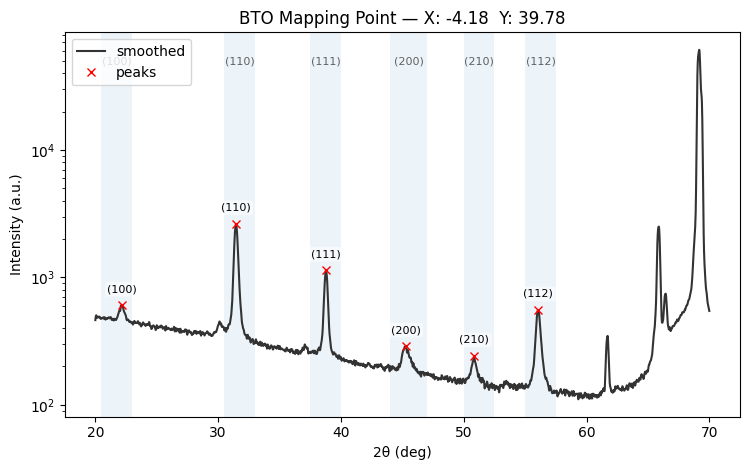


BTO_Mapping_Theta2Theta_09-10-2025_001_22_-5-000_8-660.xy  peaks: 6
  (100)    [R1]   22.170°   I≈645.8   FWHM≈1.1177°   Area≈107.49
  (110)    [R2]   31.400°   I≈3168.1   FWHM≈1.7581°   Area≈1091.99
  (111)    [R3]   38.740°   I≈1090.9   FWHM≈1.4346°   Area≈349.08
  (200)    [R4]   45.140°   I≈355.7   FWHM≈1.8094°   Area≈127.35
  (210)    [R5]   50.760°   I≈234.3   FWHM≈1.3737°   Area≈62.41
  (112)    [R6]   55.980°   I≈574.3   FWHM≈1.7290°   Area≈240.17


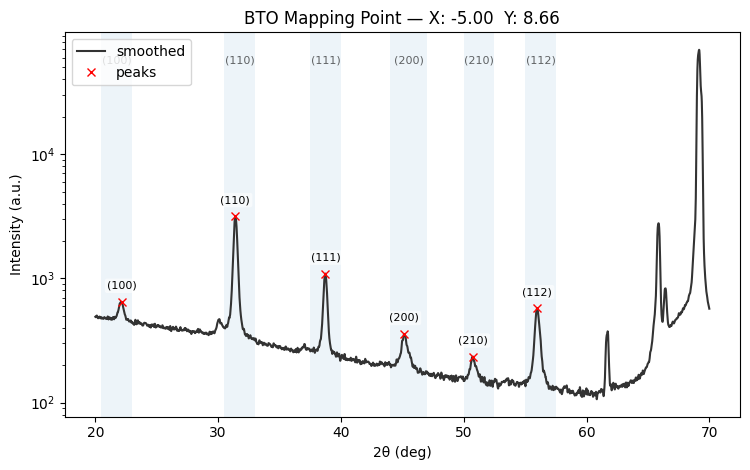


BTO_Mapping_Theta2Theta_09-10-2025_001_23_-10-000_17-321.xy  peaks: 6
  (100)    [R1]   22.110°   I≈669.9   FWHM≈1.0731°   Area≈137.51
  (110)    [R2]   31.420°   I≈3053.6   FWHM≈1.7503°   Area≈1047.88
  (111)    [R3]   38.720°   I≈1057.7   FWHM≈1.4381°   Area≈343.84
  (200)    [R4]   45.180°   I≈353.9   FWHM≈1.8166°   Area≈128.73
  (210)    [R5]   50.800°   I≈241.6   FWHM≈1.4139°   Area≈55.58
  (112)    [R6]   56.000°   I≈582.1   FWHM≈1.7120°   Area≈240.58


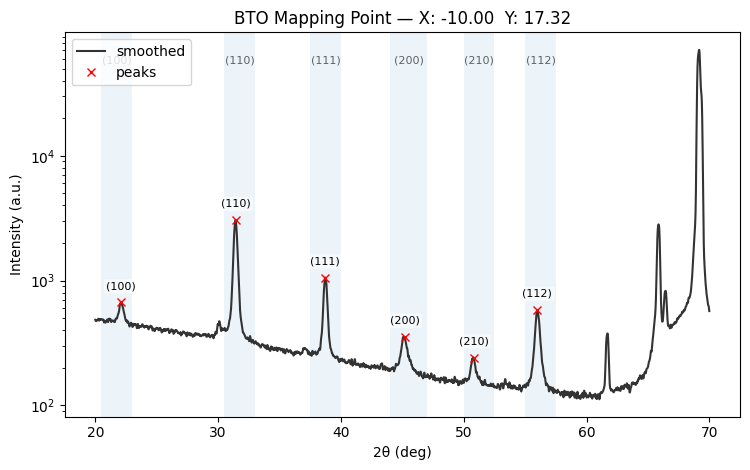


BTO_Mapping_Theta2Theta_09-10-2025_001_24_-15-000_25-981.xy  peaks: 6
  (100)    [R1]   22.110°   I≈638.4   FWHM≈1.0931°   Area≈120.43
  (110)    [R2]   31.420°   I≈2916.0   FWHM≈1.7489°   Area≈1031.45
  (111)    [R3]   38.730°   I≈1051.4   FWHM≈1.4250°   Area≈327.24
  (200)    [R4]   45.160°   I≈340.4   FWHM≈1.7456°   Area≈125.75
  (210)    [R5]   50.790°   I≈242.7   FWHM≈1.4111°   Area≈62.45
  (112)    [R6]   55.990°   I≈601.8   FWHM≈1.7040°   Area≈245.27


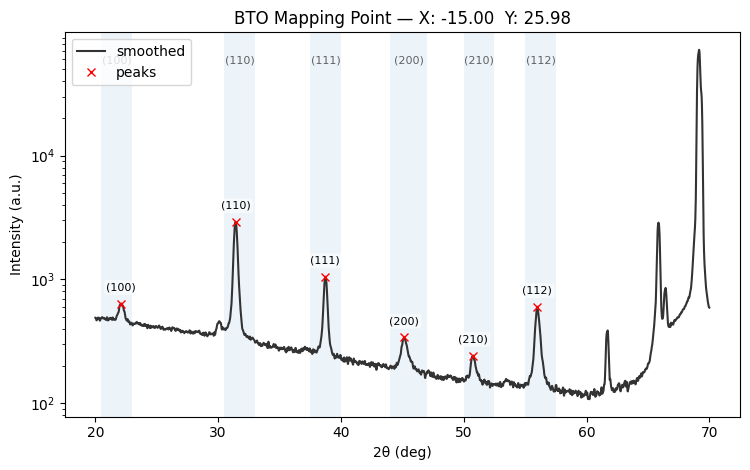


BTO_Mapping_Theta2Theta_09-10-2025_001_25_-20-000_34-641.xy  peaks: 6
  (100)    [R1]   22.150°   I≈629.8   FWHM≈1.0652°   Area≈124.44
  (110)    [R2]   31.450°   I≈2901.7   FWHM≈1.7195°   Area≈1034.01
  (111)    [R3]   38.760°   I≈1058.3   FWHM≈1.3988°   Area≈314.88
  (200)    [R4]   45.200°   I≈341.3   FWHM≈1.6821°   Area≈102.55
  (210)    [R5]   50.850°   I≈252.2   FWHM≈1.4296°   Area≈58.07
  (112)    [R6]   56.020°   I≈611.2   FWHM≈1.6752°   Area≈250.52


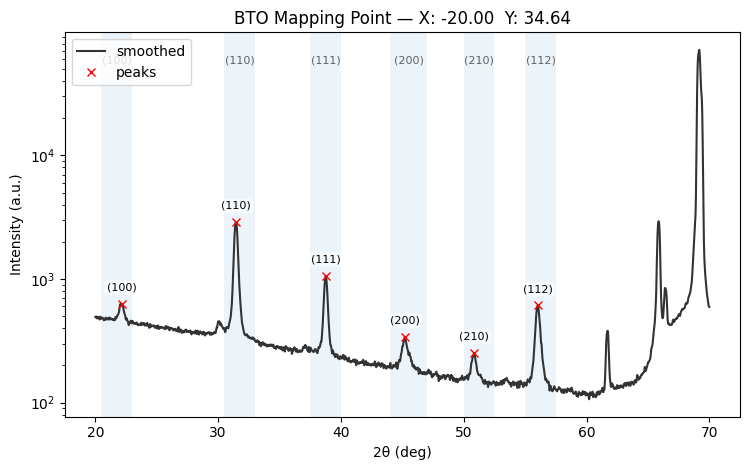


BTO_Mapping_Theta2Theta_09-10-2025_001_26_-8-090_5-878.xy  peaks: 6
  (100)    [R1]   22.090°   I≈671.6   FWHM≈1.1264°   Area≈107.27
  (110)    [R2]   31.400°   I≈3100.3   FWHM≈1.7659°   Area≈1079.98
  (111)    [R3]   38.720°   I≈1044.4   FWHM≈1.4505°   Area≈333.56
  (200)    [R4]   45.100°   I≈373.1   FWHM≈1.9524°   Area≈134.90
  (210)    [R5]   50.760°   I≈238.9   FWHM≈1.4295°   Area≈59.65
  (112)    [R6]   55.970°   I≈587.0   FWHM≈1.7162°   Area≈240.28


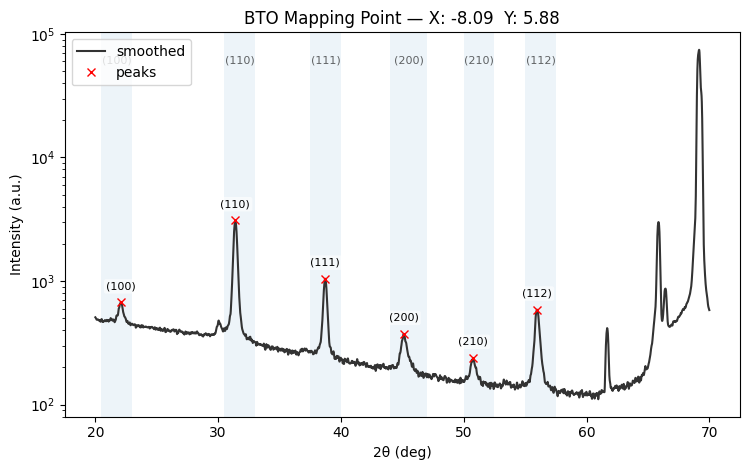


BTO_Mapping_Theta2Theta_09-10-2025_001_27_-16-180_11-756.xy  peaks: 6
  (100)    [R1]   22.060°   I≈690.7   FWHM≈1.1342°   Area≈120.85
  (110)    [R2]   31.410°   I≈2974.6   FWHM≈1.7637°   Area≈1038.92
  (111)    [R3]   38.720°   I≈989.4   FWHM≈1.4506°   Area≈302.66
  (200)    [R4]   45.140°   I≈381.7   FWHM≈1.9937°   Area≈158.00
  (210)    [R5]   50.730°   I≈242.5   FWHM≈1.4499°   Area≈51.54
  (112)    [R6]   55.980°   I≈604.4   FWHM≈1.7516°   Area≈257.14



BTO_Mapping_Theta2Theta_09-10-2025_001_28_-24-271_17-634.xy  peaks: 6
  (100)    [R1]   22.040°   I≈691.2   FWHM≈1.1195°   Area≈157.22
  (110)    [R2]   31.410°   I≈2993.3   FWHM≈1.7575°   Area≈1051.79
  (111)    [R3]   38.720°   I≈916.1   FWHM≈1.4572°   Area≈284.85
  (200)    [R4]   45.070°   I≈394.3   FWHM≈2.0659°   Area≈149.48
  (210)    [R5]   50.810°   I≈261.4   FWHM≈1.5422°   Area≈70.33
  (112)    [R6]   55.980°   I≈598.0   FWHM≈1.7448°   Area≈251.83


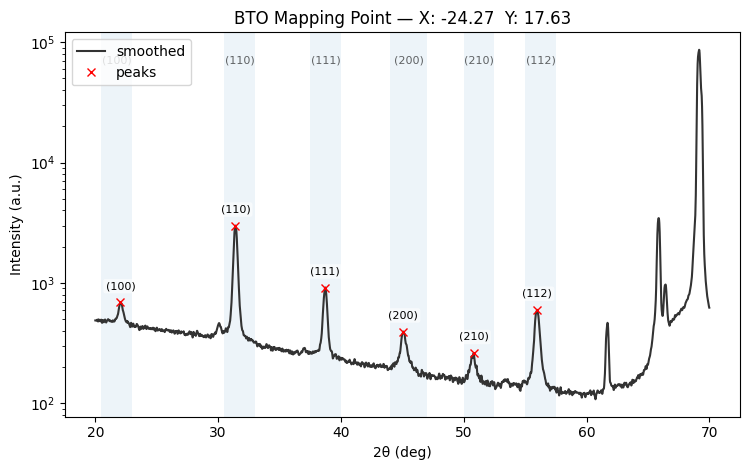


BTO_Mapping_Theta2Theta_09-10-2025_001_29_-32-361_23-511.xy  peaks: 6
  (100)    [R1]   22.070°   I≈684.3   FWHM≈1.1109°   Area≈147.03
  (110)    [R2]   31.420°   I≈3509.2   FWHM≈1.7431°   Area≈1231.54
  (111)    [R3]   38.710°   I≈849.5   FWHM≈1.4470°   Area≈250.21
  (200)    [R4]   45.120°   I≈386.3   FWHM≈2.0214°   Area≈144.98
  (210)    [R5]   50.680°   I≈256.5   FWHM≈1.5220°   Area≈74.21
  (112)    [R6]   55.990°   I≈600.1   FWHM≈1.7474°   Area≈262.55



BTO_Mapping_Theta2Theta_09-10-2025_001_30_-9-781_2-079.xy  peaks: 6
  (100)    [R1]   22.070°   I≈691.7   FWHM≈1.1611°   Area≈125.69
  (110)    [R2]   31.400°   I≈3030.2   FWHM≈1.7729°   Area≈1054.53
  (111)    [R3]   38.710°   I≈1001.3   FWHM≈1.4574°   Area≈318.23
  (200)    [R4]   45.090°   I≈384.7   FWHM≈1.9829°   Area≈143.09
  (210)    [R5]   50.710°   I≈240.1   FWHM≈1.4268°   Area≈57.71
  (112)    [R6]   55.970°   I≈591.1   FWHM≈1.7434°   Area≈238.48


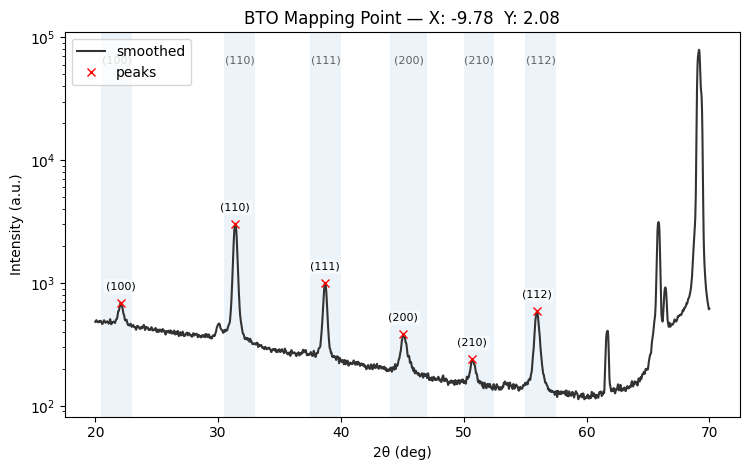


BTO_Mapping_Theta2Theta_09-10-2025_001_31_-19-563_4-158.xy  peaks: 6
  (100)    [R1]   22.020°   I≈718.8   FWHM≈1.1403°   Area≈138.12
  (110)    [R2]   31.400°   I≈2983.6   FWHM≈1.7729°   Area≈1043.62
  (111)    [R3]   38.700°   I≈866.0   FWHM≈1.4789°   Area≈279.82
  (200)    [R4]   45.070°   I≈418.9   FWHM≈2.2105°   Area≈158.34
  (210)    [R5]   50.680°   I≈245.5   FWHM≈1.5268°   Area≈59.35
  (112)    [R6]   55.940°   I≈603.1   FWHM≈1.7653°   Area≈246.98


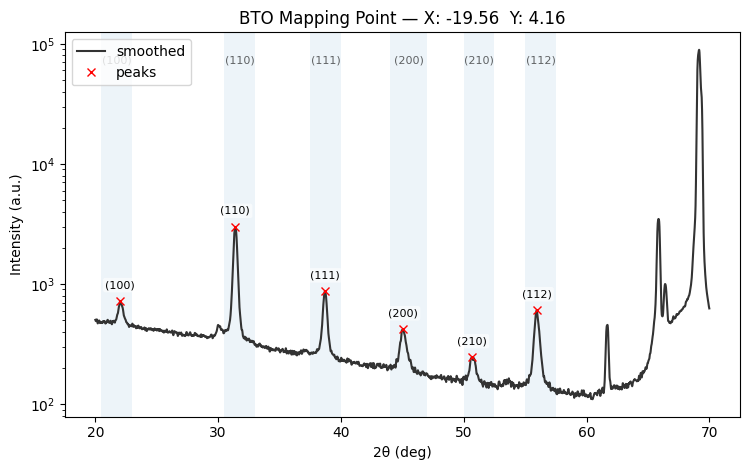


BTO_Mapping_Theta2Theta_09-10-2025_001_32_-29-344_6-237.xy  peaks: 6
  (100)    [R1]   22.080°   I≈705.3   FWHM≈1.1562°   Area≈163.65
  (110)    [R2]   31.380°   I≈3731.2   FWHM≈1.7788°   Area≈1299.60
  (111)    [R3]   38.690°   I≈751.5   FWHM≈1.5056°   Area≈229.35
  (200)    [R4]   45.080°   I≈440.6   FWHM≈2.2073°   Area≈168.99
  (210)    [R5]   50.670°   I≈262.1   FWHM≈1.6429°   Area≈66.08
  (112)    [R6]   55.910°   I≈556.9   FWHM≈1.8214°   Area≈240.74


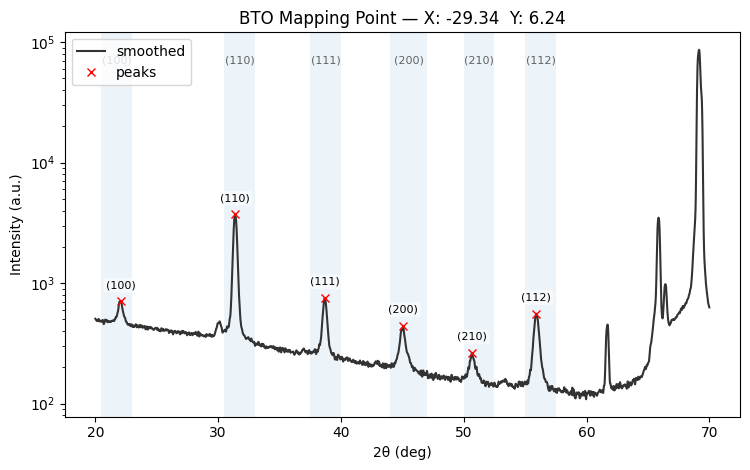


BTO_Mapping_Theta2Theta_09-10-2025_001_33_-39-126_8-316.xy  peaks: 6
  (100)    [R1]   22.100°   I≈663.9   FWHM≈1.1907°   Area≈137.31
  (110)    [R2]   31.360°   I≈6208.1   FWHM≈1.7966°   Area≈2105.67
  (111)    [R3]   38.680°   I≈576.8   FWHM≈1.5427°   Area≈184.18
  (200)    [R4]   45.000°   I≈379.8   FWHM≈2.1836°   Area≈161.09
  (210)    [R5]   50.630°   I≈264.2   FWHM≈1.7529°   Area≈64.88
  (112)    [R6]   55.870°   I≈497.3   FWHM≈1.8899°   Area≈209.10


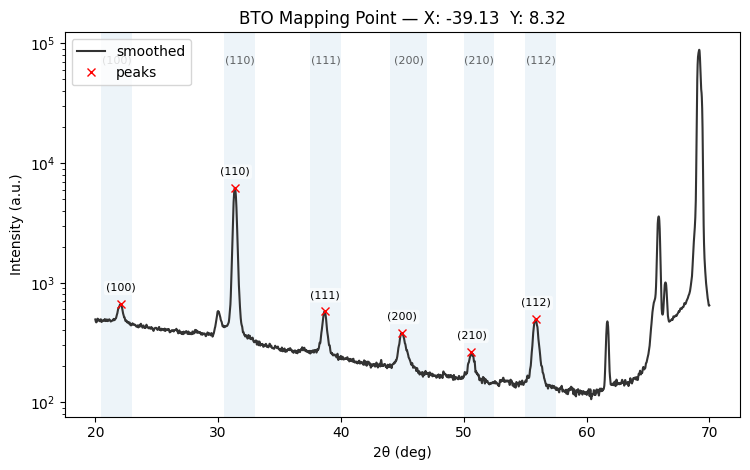


BTO_Mapping_Theta2Theta_09-10-2025_001_34_-9-781_-2-079.xy  peaks: 6
  (100)    [R1]   22.020°   I≈699.0   FWHM≈1.1300°   Area≈127.76
  (110)    [R2]   31.400°   I≈3018.8   FWHM≈1.7700°   Area≈1050.61
  (111)    [R3]   38.710°   I≈988.5   FWHM≈1.4624°   Area≈311.13
  (200)    [R4]   45.100°   I≈386.7   FWHM≈2.0023°   Area≈158.32
  (210)    [R5]   50.790°   I≈236.0   FWHM≈1.4256°   Area≈64.33
  (112)    [R6]   55.970°   I≈588.0   FWHM≈1.7508°   Area≈241.56


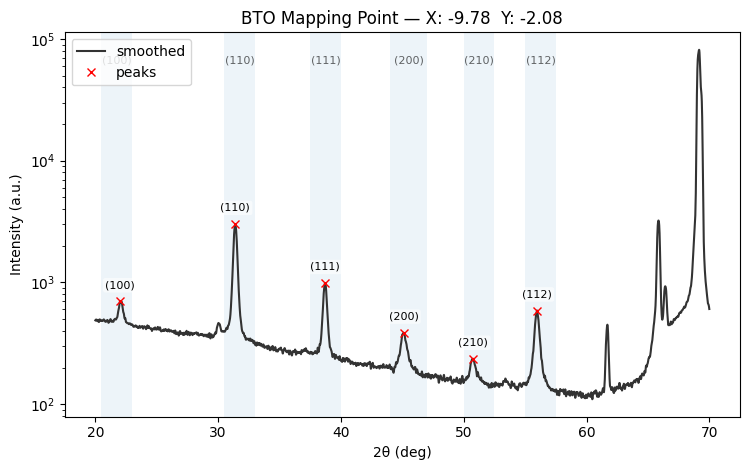


BTO_Mapping_Theta2Theta_09-10-2025_001_35_-19-563_-4-158.xy  peaks: 6
  (100)    [R1]   22.070°   I≈743.3   FWHM≈1.1502°   Area≈136.08
  (110)    [R2]   31.390°   I≈3107.6   FWHM≈1.7767°   Area≈1082.04
  (111)    [R3]   38.690°   I≈837.3   FWHM≈1.4901°   Area≈278.22
  (200)    [R4]   45.020°   I≈433.8   FWHM≈2.1969°   Area≈172.36
  (210)    [R5]   50.740°   I≈247.5   FWHM≈1.5554°   Area≈58.50
  (112)    [R6]   55.920°   I≈581.9   FWHM≈1.8013°   Area≈243.59


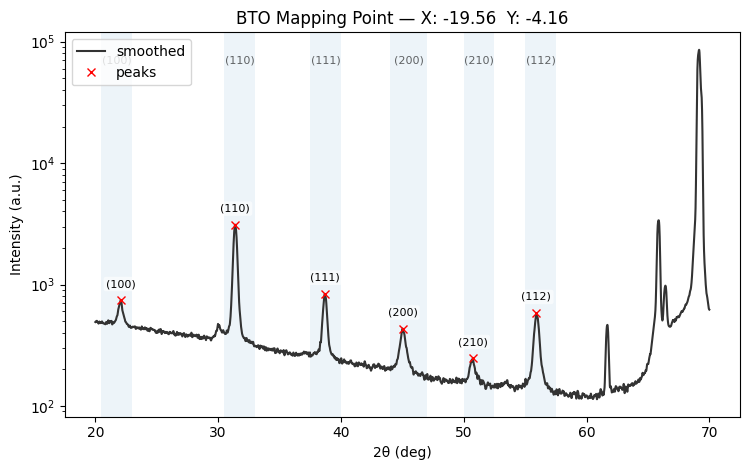


BTO_Mapping_Theta2Theta_09-10-2025_001_36_-29-344_-6-237.xy  peaks: 6
  (100)    [R1]   22.020°   I≈729.8   FWHM≈1.1931°   Area≈162.88
  (110)    [R2]   31.360°   I≈4516.6   FWHM≈1.8054°   Area≈1568.28
  (111)    [R3]   38.620°   I≈653.1   FWHM≈1.5478°   Area≈209.45
  (200)    [R4]   45.010°   I≈432.0   FWHM≈2.2965°   Area≈182.96
  (210)    [R5]   50.630°   I≈264.1   FWHM≈1.7151°   Area≈59.90
  (112)    [R6]   55.860°   I≈531.9   FWHM≈1.8886°   Area≈237.31


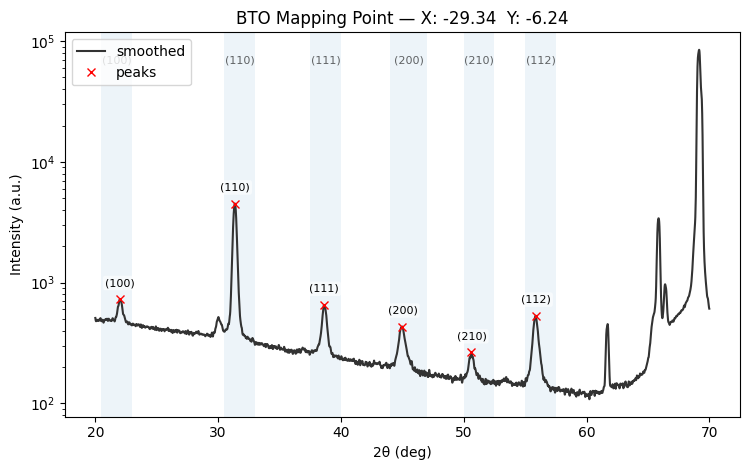


BTO_Mapping_Theta2Theta_09-10-2025_001_37_-39-126_-8-316.xy  peaks: 6
  (100)    [R1]   21.980°   I≈823.4   FWHM≈1.1824°   Area≈165.88
  (110)    [R2]   31.300°   I≈7851.2   FWHM≈1.8418°   Area≈2480.64
  (111)    [R3]   38.620°   I≈457.0   FWHM≈1.5769°   Area≈114.10
  (200)    [R4]   44.910°   I≈539.1   FWHM≈2.3427°   Area≈249.89
  (210)    [R5]   50.540°   I≈259.1   FWHM≈1.7487°   Area≈64.03
  (112)    [R6]   55.710°   I≈545.1   FWHM≈1.9876°   Area≈213.99


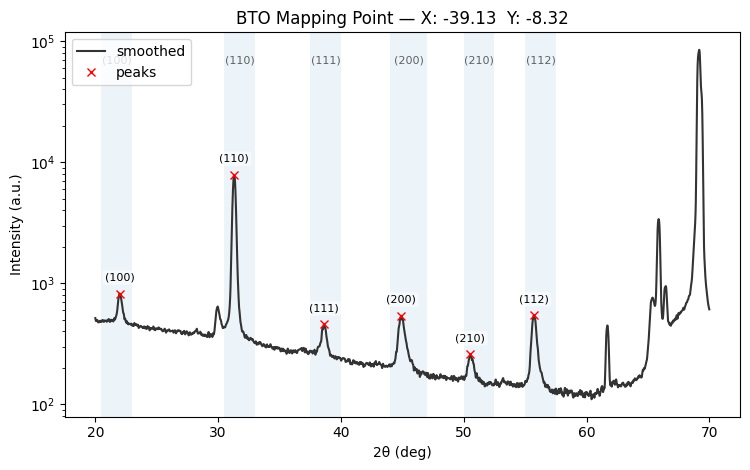


BTO_Mapping_Theta2Theta_09-10-2025_001_38_-8-090_-5-878.xy  peaks: 6
  (100)    [R1]   22.090°   I≈696.6   FWHM≈1.1435°   Area≈134.45
  (110)    [R2]   31.400°   I≈2994.9   FWHM≈1.7745°   Area≈1072.09
  (111)    [R3]   38.700°   I≈996.9   FWHM≈1.4587°   Area≈316.53
  (200)    [R4]   45.100°   I≈397.0   FWHM≈2.1082°   Area≈148.65
  (210)    [R5]   50.750°   I≈245.5   FWHM≈1.4470°   Area≈70.69
  (112)    [R6]   55.970°   I≈586.5   FWHM≈1.7558°   Area≈241.72


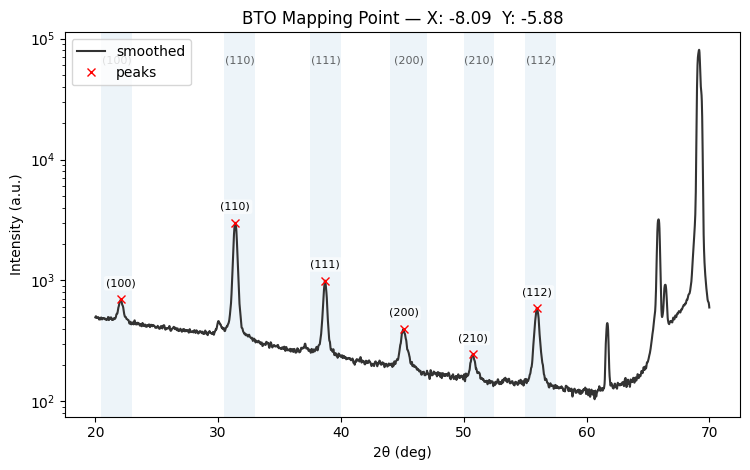


BTO_Mapping_Theta2Theta_09-10-2025_001_39_-16-180_-11-756.xy  peaks: 6
  (100)    [R1]   22.020°   I≈738.0   FWHM≈1.1724°   Area≈130.76
  (110)    [R2]   31.390°   I≈3060.8   FWHM≈1.7801°   Area≈1051.56
  (111)    [R3]   38.710°   I≈846.4   FWHM≈1.4833°   Area≈261.38
  (200)    [R4]   45.060°   I≈441.7   FWHM≈2.2021°   Area≈175.06
  (210)    [R5]   50.750°   I≈251.5   FWHM≈1.5767°   Area≈63.61
  (112)    [R6]   55.940°   I≈582.7   FWHM≈1.7858°   Area≈250.73


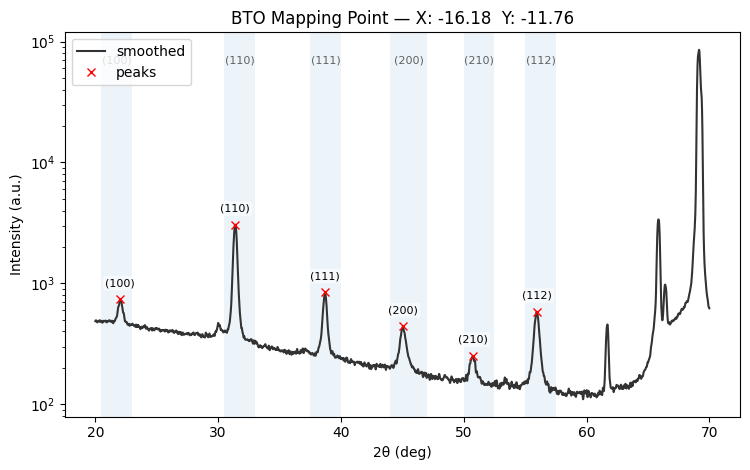


BTO_Mapping_Theta2Theta_09-10-2025_001_40_-24-271_-17-634.xy  peaks: 6
  (100)    [R1]   22.070°   I≈727.8   FWHM≈1.1893°   Area≈159.68
  (110)    [R2]   31.360°   I≈4320.5   FWHM≈1.8016°   Area≈1495.92
  (111)    [R3]   38.660°   I≈681.7   FWHM≈1.5349°   Area≈207.65
  (200)    [R4]   45.010°   I≈441.6   FWHM≈2.2783°   Area≈178.15
  (210)    [R5]   50.530°   I≈254.2   FWHM≈1.6987°   Area≈64.58
  (112)    [R6]   55.830°   I≈521.1   FWHM≈1.8765°   Area≈230.89



BTO_Mapping_Theta2Theta_09-10-2025_001_41_-32-361_-23-511.xy  peaks: 6
  (100)    [R1]   22.010°   I≈766.1   FWHM≈1.2046°   Area≈162.11
  (110)    [R2]   31.320°   I≈8270.9   FWHM≈1.8314°   Area≈2632.43
  (111)    [R3]   38.620°   I≈471.5   FWHM≈1.6104°   Area≈134.99
  (200)    [R4]   44.920°   I≈473.2   FWHM≈2.3384°   Area≈217.38
  (210)    [R5]   50.570°   I≈270.6   FWHM≈1.8106°   Area≈63.01
  (112)    [R6]   55.710°   I≈517.4   FWHM≈1.9760°   Area≈226.74



BTO_Mapping_Theta2Theta_09-10-2025_001_42_-5-000_-8-660.xy  peaks: 6
  (100)    [R1]   22.030°   I≈689.7   FWHM≈1.1032°   Area≈106.56
  (110)    [R2]   31.390°   I≈3090.1   FWHM≈1.7691°   Area≈1074.81
  (111)    [R3]   38.730°   I≈1012.5   FWHM≈1.4562°   Area≈335.18
  (200)    [R4]   45.120°   I≈398.1   FWHM≈2.0573°   Area≈154.89
  (210)    [R5]   50.750°   I≈240.7   FWHM≈1.4777°   Area≈55.64
  (112)    [R6]   55.940°   I≈591.7   FWHM≈1.7448°   Area≈251.46


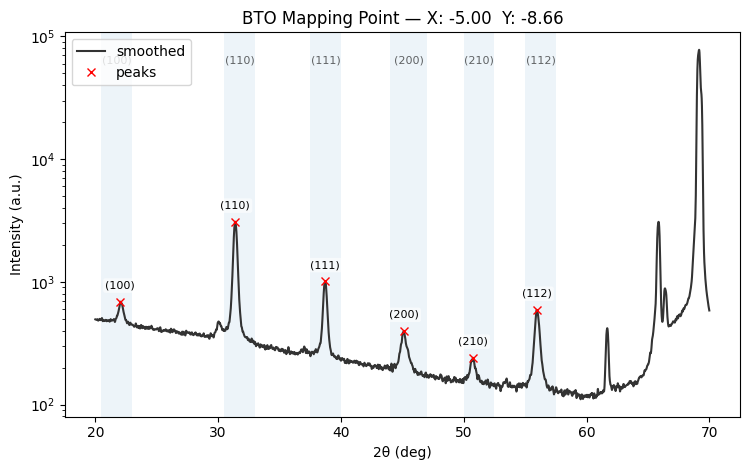


BTO_Mapping_Theta2Theta_09-10-2025_001_43_-10-000_-17-321.xy  peaks: 6
  (100)    [R1]   22.020°   I≈711.6   FWHM≈1.1447°   Area≈154.25
  (110)    [R2]   31.390°   I≈2991.2   FWHM≈1.7733°   Area≈1016.65
  (111)    [R3]   38.700°   I≈896.8   FWHM≈1.4750°   Area≈282.65
  (200)    [R4]   45.050°   I≈409.5   FWHM≈2.1860°   Area≈157.42
  (210)    [R5]   50.710°   I≈246.6   FWHM≈1.4809°   Area≈62.40
  (112)    [R6]   55.950°   I≈592.9   FWHM≈1.7631°   Area≈253.77


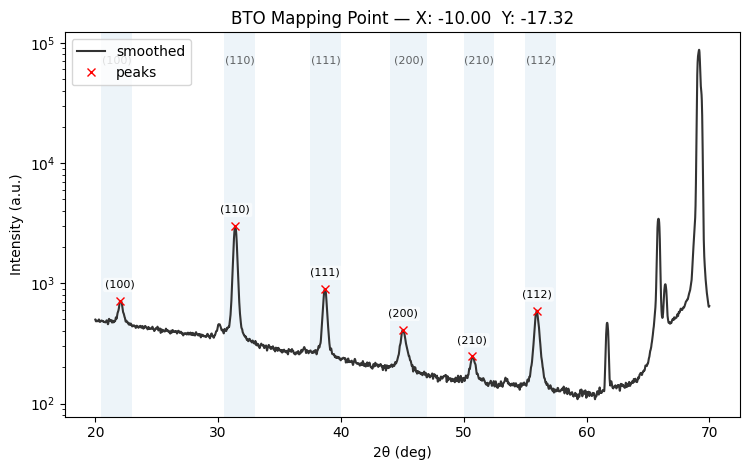


BTO_Mapping_Theta2Theta_09-10-2025_001_44_-15-000_-25-981.xy  peaks: 6
  (100)    [R1]   22.050°   I≈712.0   FWHM≈1.1439°   Area≈113.96
  (110)    [R2]   31.390°   I≈3306.9   FWHM≈1.7734°   Area≈1168.12
  (111)    [R3]   38.700°   I≈806.2   FWHM≈1.4842°   Area≈250.11
  (200)    [R4]   45.060°   I≈422.9   FWHM≈2.2044°   Area≈172.70
  (210)    [R5]   50.680°   I≈250.1   FWHM≈1.5410°   Area≈61.75
  (112)    [R6]   55.930°   I≈590.0   FWHM≈1.7886°   Area≈248.84


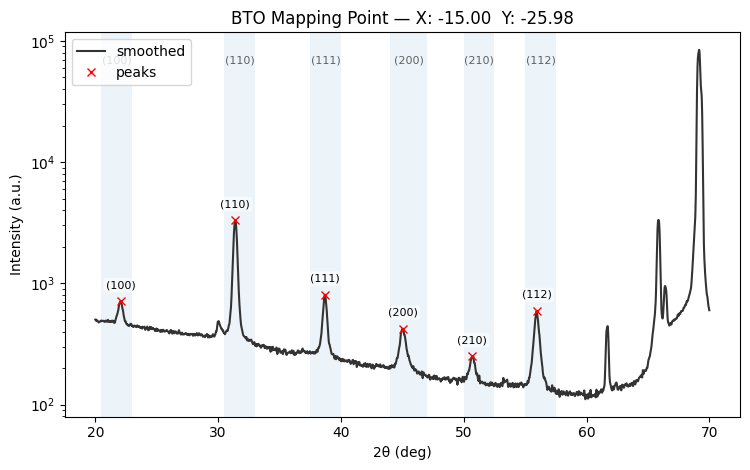


BTO_Mapping_Theta2Theta_09-10-2025_001_45_-20-000_-34-641.xy  peaks: 6
  (100)    [R1]   22.030°   I≈697.2   FWHM≈1.1727°   Area≈151.99
  (110)    [R2]   31.390°   I≈4826.8   FWHM≈1.7764°   Area≈1664.16
  (111)    [R3]   38.670°   I≈640.9   FWHM≈1.5237°   Area≈201.09
  (200)    [R4]   44.990°   I≈399.9   FWHM≈2.2059°   Area≈165.45
  (210)    [R5]   50.620°   I≈258.3   FWHM≈1.6549°   Area≈72.82
  (112)    [R6]   55.850°   I≈518.4   FWHM≈1.8624°   Area≈241.11


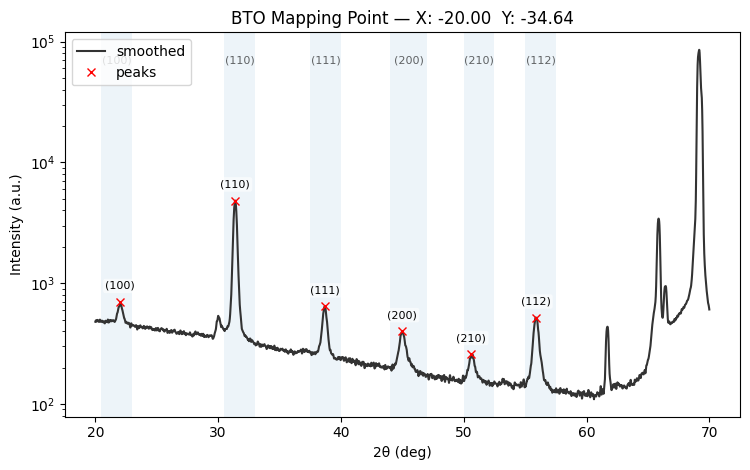


BTO_Mapping_Theta2Theta_09-10-2025_001_46_-1-045_-9-945.xy  peaks: 6
  (100)    [R1]   22.100°   I≈673.5   FWHM≈1.1139°   Area≈134.90
  (110)    [R2]   31.400°   I≈3158.8   FWHM≈1.7712°   Area≈1108.42
  (111)    [R3]   38.730°   I≈1081.2   FWHM≈1.4465°   Area≈328.89
  (200)    [R4]   45.140°   I≈369.4   FWHM≈1.9031°   Area≈123.72
  (210)    [R5]   50.750°   I≈238.9   FWHM≈1.4049°   Area≈65.52
  (112)    [R6]   55.980°   I≈578.8   FWHM≈1.7336°   Area≈230.80


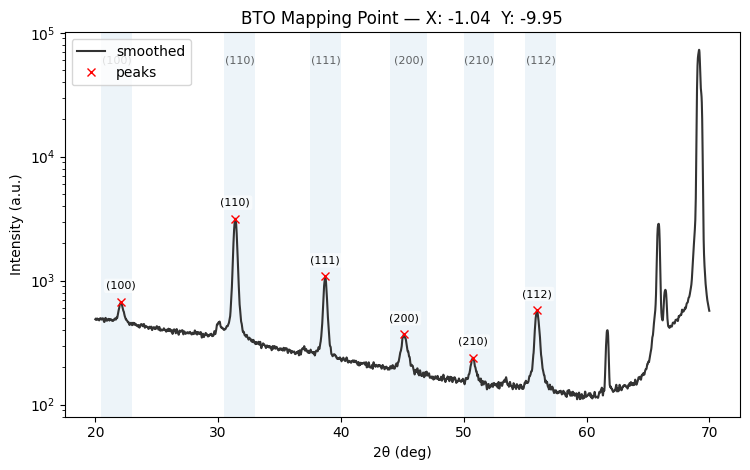


BTO_Mapping_Theta2Theta_09-10-2025_001_47_-2-091_-19-890.xy  peaks: 6
  (100)    [R1]   22.050°   I≈678.1   FWHM≈1.1282°   Area≈138.01
  (110)    [R2]   31.400°   I≈3122.2   FWHM≈1.7662°   Area≈1084.12
  (111)    [R3]   38.720°   I≈1026.2   FWHM≈1.4517°   Area≈327.22
  (200)    [R4]   45.150°   I≈398.4   FWHM≈2.0298°   Area≈150.89
  (210)    [R5]   50.810°   I≈242.3   FWHM≈1.4200°   Area≈63.94
  (112)    [R6]   55.950°   I≈583.7   FWHM≈1.7356°   Area≈245.70


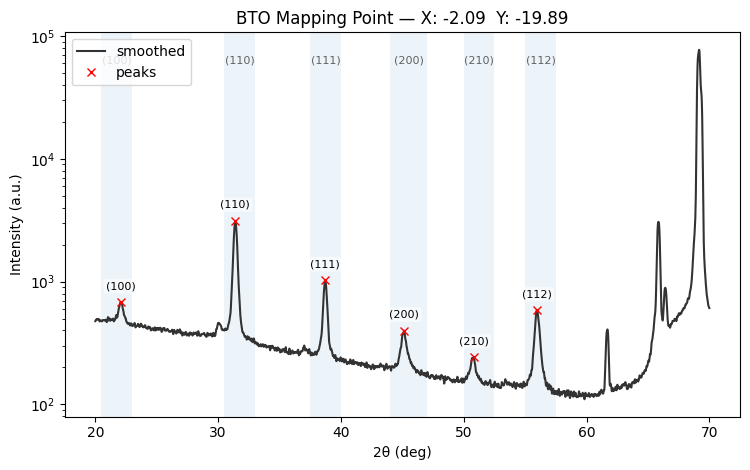


BTO_Mapping_Theta2Theta_09-10-2025_001_48_-3-136_-29-836.xy  peaks: 6
  (100)    [R1]   22.080°   I≈695.0   FWHM≈1.1205°   Area≈115.54
  (110)    [R2]   31.410°   I≈3070.0   FWHM≈1.7625°   Area≈1062.47
  (111)    [R3]   38.730°   I≈990.2   FWHM≈1.4468°   Area≈319.25
  (200)    [R4]   45.100°   I≈387.8   FWHM≈2.0745°   Area≈142.71
  (210)    [R5]   50.740°   I≈253.9   FWHM≈1.5216°   Area≈60.58
  (112)    [R6]   55.980°   I≈601.4   FWHM≈1.7411°   Area≈244.43



BTO_Mapping_Theta2Theta_09-10-2025_001_49_-4-181_-39-781.xy  peaks: 6
  (100)    [R1]   22.110°   I≈681.7   FWHM≈1.1080°   Area≈141.06
  (110)    [R2]   31.420°   I≈3115.2   FWHM≈1.7521°   Area≈1099.22
  (111)    [R3]   38.740°   I≈942.0   FWHM≈1.4411°   Area≈283.99
  (200)    [R4]   45.130°   I≈383.5   FWHM≈2.0193°   Area≈141.59
  (210)    [R5]   50.770°   I≈251.2   FWHM≈1.5220°   Area≈64.80
  (112)    [R6]   56.010°   I≈592.7   FWHM≈1.7345°   Area≈262.40


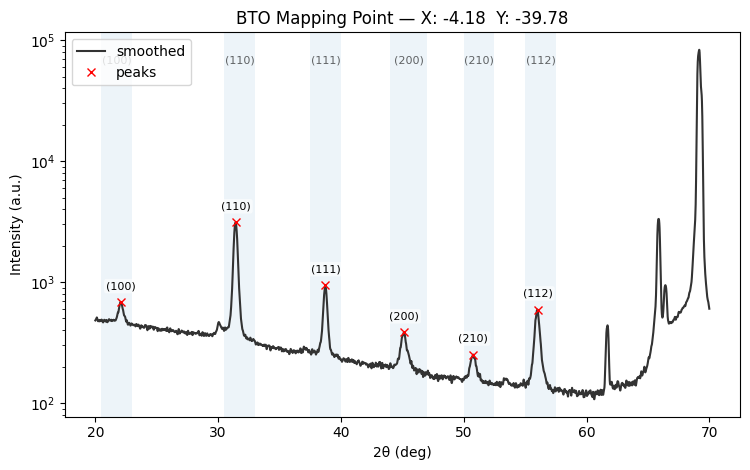


BTO_Mapping_Theta2Theta_09-10-2025_001_50_3-090_-9-511.xy  peaks: 6
  (100)    [R1]   22.090°   I≈645.1   FWHM≈1.1120°   Area≈117.65
  (110)    [R2]   31.410°   I≈3233.3   FWHM≈1.7617°   Area≈1128.50
  (111)    [R3]   38.720°   I≈1115.3   FWHM≈1.4337°   Area≈335.10
  (200)    [R4]   45.190°   I≈342.0   FWHM≈1.7821°   Area≈120.97
  (210)    [R5]   50.820°   I≈232.0   FWHM≈1.3542°   Area≈56.94
  (112)    [R6]   55.970°   I≈565.8   FWHM≈1.7224°   Area≈240.03


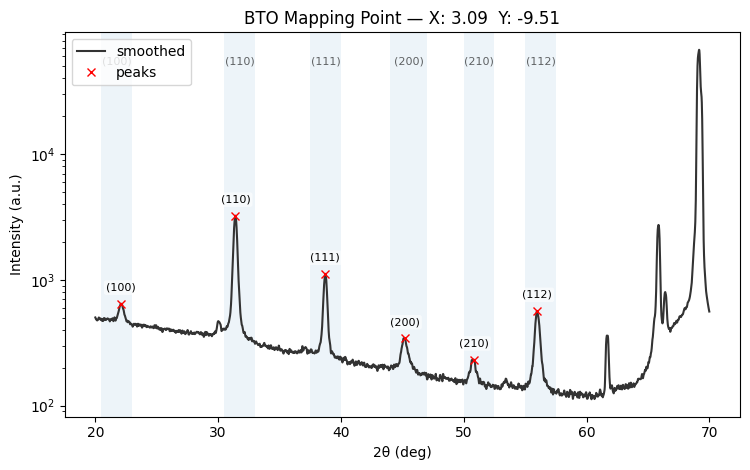


BTO_Mapping_Theta2Theta_09-10-2025_001_51_6-180_-19-021.xy  peaks: 6
  (100)    [R1]   22.130°   I≈659.8   FWHM≈1.0316°   Area≈116.06
  (110)    [R2]   31.410°   I≈3166.0   FWHM≈1.7592°   Area≈1095.57
  (111)    [R3]   38.740°   I≈1112.6   FWHM≈1.4288°   Area≈348.74
  (200)    [R4]   45.160°   I≈334.9   FWHM≈1.7338°   Area≈118.11
  (210)    [R5]   50.770°   I≈241.4   FWHM≈1.3922°   Area≈56.26
  (112)    [R6]   56.000°   I≈570.3   FWHM≈1.7221°   Area≈249.78



BTO_Mapping_Theta2Theta_09-10-2025_001_52_9-271_-28-532.xy  peaks: 6
  (100)    [R1]   22.150°   I≈645.9   FWHM≈1.0397°   Area≈105.88
  (110)    [R2]   31.420°   I≈3157.3   FWHM≈1.7505°   Area≈1092.71
  (111)    [R3]   38.750°   I≈1127.6   FWHM≈1.4208°   Area≈356.50
  (200)    [R4]   45.150°   I≈331.7   FWHM≈1.7287°   Area≈112.96
  (210)    [R5]   50.840°   I≈241.0   FWHM≈1.3726°   Area≈64.44
  (112)    [R6]   56.000°   I≈566.1   FWHM≈1.7049°   Area≈232.38



BTO_Mapping_Theta2Theta_09-10-2025_001_53_12-361_-38-042.xy  peaks: 6
  (100)    [R1]   22.170°   I≈629.5   FWHM≈1.0542°   Area≈94.85
  (110)    [R2]   31.430°   I≈3073.5   FWHM≈1.7356°   Area≈1091.18
  (111)    [R3]   38.760°   I≈1066.3   FWHM≈1.4060°   Area≈327.51
  (200)    [R4]   45.240°   I≈319.3   FWHM≈1.5895°   Area≈110.72
  (210)    [R5]   50.790°   I≈247.9   FWHM≈1.3580°   Area≈59.07
  (112)    [R6]   56.020°   I≈563.9   FWHM≈1.6850°   Area≈233.13


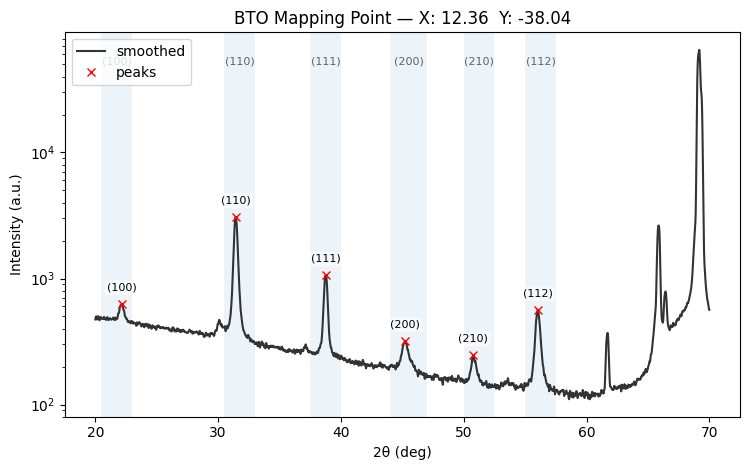


BTO_Mapping_Theta2Theta_09-10-2025_001_54_6-691_-7-431.xy  peaks: 6
  (100)    [R1]   22.150°   I≈643.1   FWHM≈1.1195°   Area≈114.37
  (110)    [R2]   31.410°   I≈3237.2   FWHM≈1.7572°   Area≈1121.86
  (111)    [R3]   38.740°   I≈1121.9   FWHM≈1.4278°   Area≈358.88
  (200)    [R4]   45.180°   I≈320.1   FWHM≈1.6481°   Area≈112.85
  (210)    [R5]   50.820°   I≈236.3   FWHM≈1.3261°   Area≈62.59
  (112)    [R6]   56.020°   I≈552.3   FWHM≈1.7151°   Area≈233.10


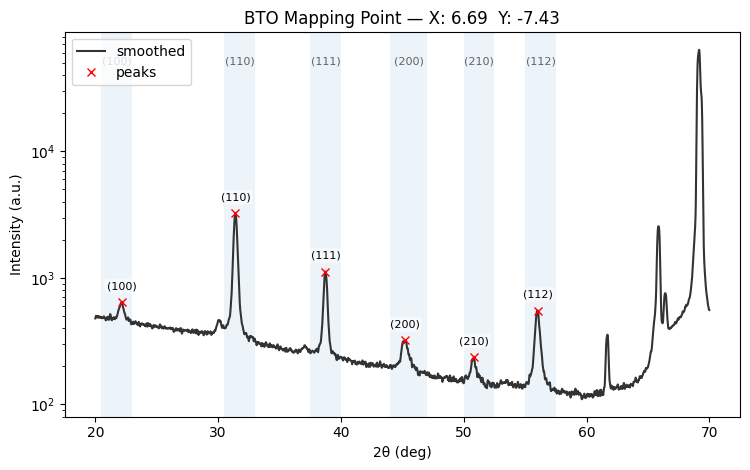


BTO_Mapping_Theta2Theta_09-10-2025_001_55_13-383_-14-863.xy  peaks: 6
  (100)    [R1]   22.150°   I≈618.4   FWHM≈1.0984°   Area≈104.47
  (110)    [R2]   31.410°   I≈3019.2   FWHM≈1.7535°   Area≈1087.43
  (111)    [R3]   38.760°   I≈1129.1   FWHM≈1.4186°   Area≈358.52
  (200)    [R4]   45.180°   I≈311.5   FWHM≈1.5981°   Area≈111.43
  (210)    [R5]   50.790°   I≈232.5   FWHM≈1.3702°   Area≈69.21
  (112)    [R6]   56.020°   I≈543.4   FWHM≈1.6910°   Area≈223.27


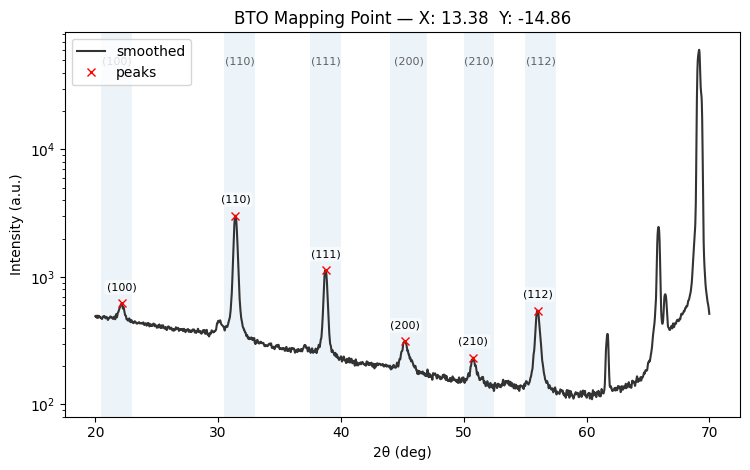


BTO_Mapping_Theta2Theta_09-10-2025_001_56_20-074_-22-294.xy  peaks: 6
  (100)    [R1]   22.140°   I≈604.1   FWHM≈1.0914°   Area≈99.60
  (110)    [R2]   31.420°   I≈2804.0   FWHM≈1.7400°   Area≈965.40
  (111)    [R3]   38.760°   I≈1212.0   FWHM≈1.3921°   Area≈371.65
  (200)    [R4]   45.260°   I≈289.2   FWHM≈1.4327°   Area≈88.54
  (210)    [R5]   50.730°   I≈223.6   FWHM≈1.3003°   Area≈44.80
  (112)    [R6]   55.990°   I≈552.6   FWHM≈1.6895°   Area≈231.65


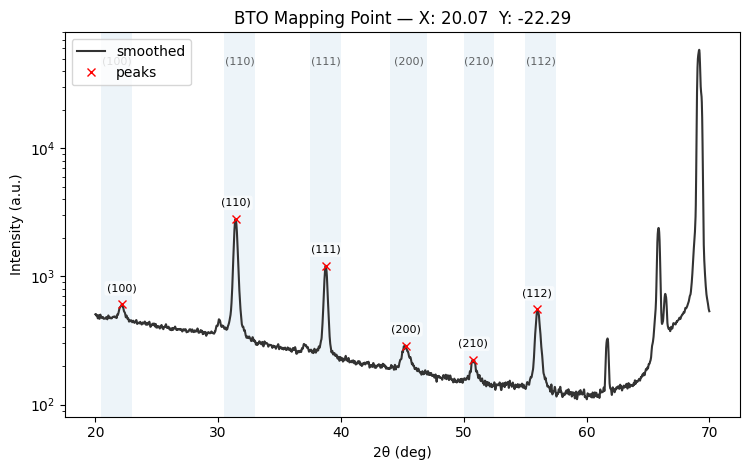


BTO_Mapping_Theta2Theta_09-10-2025_001_57_26-765_-29-726.xy  peaks: 6
  (100)    [R1]   22.130°   I≈597.1   FWHM≈1.0612°   Area≈97.37
  (110)    [R2]   31.440°   I≈2374.2   FWHM≈1.7291°   Area≈817.30
  (111)    [R3]   38.780°   I≈1169.1   FWHM≈1.3851°   Area≈352.72
  (200)    [R4]   45.270°   I≈279.6   FWHM≈1.3949°   Area≈82.79
  (210)    [R5]   50.820°   I≈220.5   FWHM≈1.2284°   Area≈51.41
  (112)    [R6]   56.020°   I≈544.9   FWHM≈1.6618°   Area≈232.21


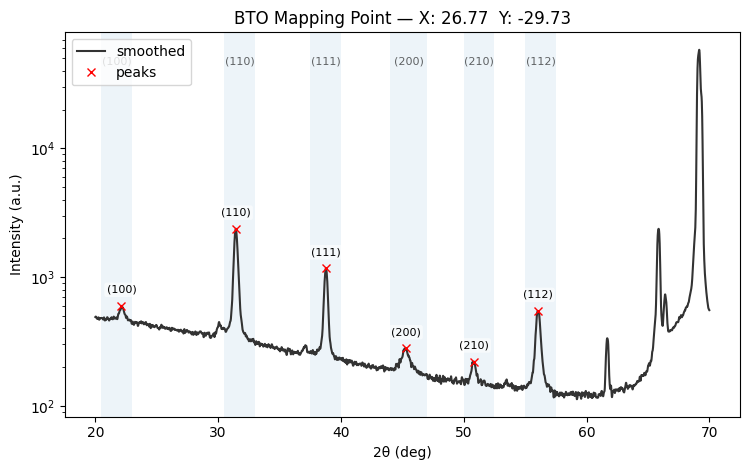


BTO_Mapping_Theta2Theta_09-10-2025_001_58_9-135_-4-067.xy  peaks: 6
  (100)    [R1]   22.090°   I≈627.9   FWHM≈1.1029°   Area≈118.06
  (110)    [R2]   31.400°   I≈3139.0   FWHM≈1.7570°   Area≈1112.57
  (111)    [R3]   38.760°   I≈1107.7   FWHM≈1.4238°   Area≈352.72
  (200)    [R4]   45.150°   I≈327.7   FWHM≈1.6366°   Area≈106.76
  (210)    [R5]   50.760°   I≈237.7   FWHM≈1.3492°   Area≈57.07
  (112)    [R6]   56.000°   I≈558.0   FWHM≈1.6998°   Area≈219.53



BTO_Mapping_Theta2Theta_09-10-2025_001_59_18-271_-8-135.xy  peaks: 6
  (100)    [R1]   22.060°   I≈600.3   FWHM≈1.0706°   Area≈108.70
  (110)    [R2]   31.410°   I≈2815.6   FWHM≈1.7501°   Area≈974.56
  (111)    [R3]   38.750°   I≈1081.2   FWHM≈1.4086°   Area≈349.61
  (200)    [R4]   45.380°   I≈289.6   FWHM≈1.4407°   Area≈104.12
  (210)    [R5]   50.820°   I≈229.1   FWHM≈1.2797°   Area≈65.51
  (112)    [R6]   56.010°   I≈565.2   FWHM≈1.6832°   Area≈217.56


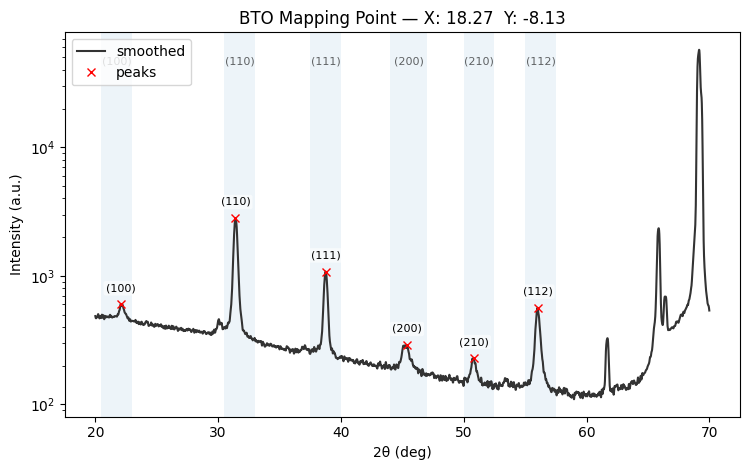


BTO_Mapping_Theta2Theta_09-10-2025_001_60_27-406_-12-202.xy  peaks: 6
  (100)    [R1]   22.140°   I≈590.3   FWHM≈1.0717°   Area≈103.08
  (110)    [R2]   31.430°   I≈2301.5   FWHM≈1.7425°   Area≈827.22
  (111)    [R3]   38.780°   I≈1109.6   FWHM≈1.3837°   Area≈345.36
  (200)    [R4]   45.150°   I≈282.7   FWHM≈1.3519°   Area≈89.81
  (210)    [R5]   50.750°   I≈222.6   FWHM≈1.2589°   Area≈49.26
  (112)    [R6]   56.040°   I≈577.8   FWHM≈1.6525°   Area≈218.40


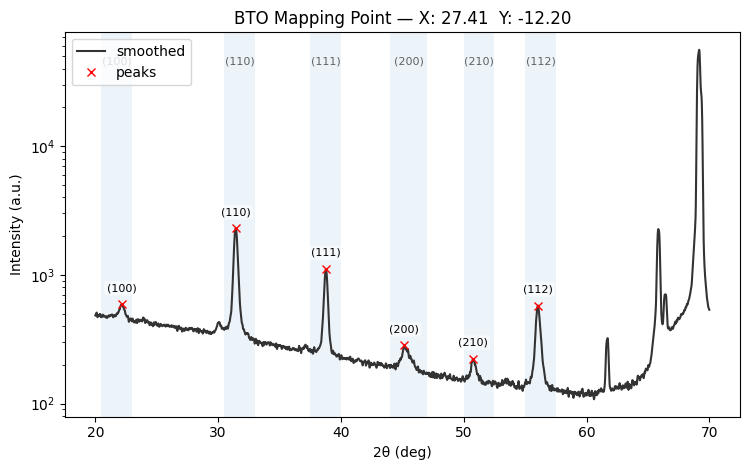


BTO_Mapping_Theta2Theta_09-10-2025_001_61_36-542_-16-269.xy  peaks: 6
  (100)    [R1]   22.130°   I≈597.5   FWHM≈1.0302°   Area≈87.26
  (110)    [R2]   31.440°   I≈1779.1   FWHM≈1.7310°   Area≈610.89
  (111)    [R3]   38.790°   I≈1061.9   FWHM≈1.3717°   Area≈325.53
  (200)    [R4]   45.110°   I≈274.9   FWHM≈1.3820°   Area≈89.19
  (210)    [R5]   50.760°   I≈207.1   FWHM≈1.2123°   Area≈44.97
  (112)    [R6]   56.040°   I≈595.5   FWHM≈1.6403°   Area≈234.27


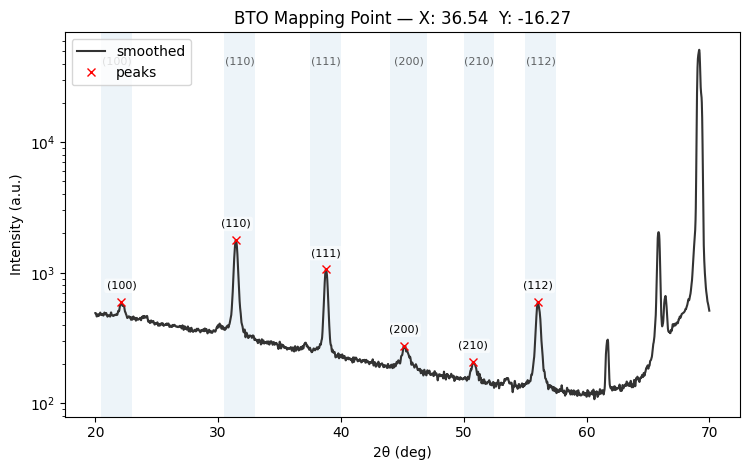


=== Summary ===
Number of files processed: 61
Results shape (FWHM): (61, 6)
Peak intensity shape: (61, 6)
Peak areas shape: (61, 6)
Coordinates: 61 x, 61 y

FWHM statistics (excluding NaN):
  (100): min=1.0302°, max=1.2046°, mean=1.1049°
  (110): min=1.7133°, max=1.8418°, mean=1.7559°
  (111): min=1.3572°, max=1.6104°, mean=1.4352°
  (200): min=1.3519°, max=2.3427°, mean=1.7717°
  (210): min=1.0710°, max=1.8106°, mean=1.4042°
  (112): min=1.6315°, max=1.9876°, mean=1.7256°

Integrated Area statistics (excluding NaN):
  (100): min=74.86, max=165.88, mean=118.39
  (110): min=575.69, max=2632.43, mean=1090.40
  (111): min=114.10, max=371.65, mean=302.91
  (200): min=82.12, max=249.89, mean=127.91
  (210): min=34.25, max=74.21, mean=58.06
  (112): min=209.10, max=262.55, mean=236.29


In [3]:
# ---------- settings ----------
pattern       = "*.xy"
window_pts    = 12
polyorder     = 2
min_sep_deg   = 0.25
width_deg     = (0.06, 1.2)
ratio_min     = 1.2
frac_min      = 0.00

# Initialize storage: list of dictionaries, one per file
all_file_results = []
x_coordinates = []
y_coordinates = []

# Define your search windows (lo, hi) and their names (same order!)
REGIONS = [
    (20.5, 23.0),   # e.g. (100)
    (30.5, 33.0),   # e.g. (110)
    (37.5, 40.0),   # e.g. (111) or whatever you expect
    (44.0, 47.0),   # e.g. (200)
    (50.0, 52.5),   # e.g. (210)
    (55.0, 57.5),   # e.g. (300)
]
REGION_NAMES = ["(100)", "(110)", "(111)", "(200)", "(210)", "(112)"]  # <- set to your BTO planes

# ------------------------------
def _safe_window(n, w, p):
    if n < 5:
        return None, None
    w = min(w, n - (1 - (n % 2)))
    if w % 2 == 0: w += 1
    w = max(5, w)
    p = min(p, w - 2)
    return w, p

files = sorted(glob.glob(pattern))
for fp in files:
    data = np.loadtxt(fp)
    x, y = data[:,0], data[:,1]
    step = float(np.mean(np.diff(x)))

    # smooth for visuals
    w_use, p_use = _safe_window(len(x), window_pts, polyorder)
    ys = savgol_filter(y, w_use, p_use, mode="interp") if w_use is not None else y.copy()

    distance = max(1, int(min_sep_deg/step))
    width_s  = (max(1, int(width_deg[0]/step)), max(2, int(width_deg[1]/step)))

    # Storage for THIS file: we'll store 6 values (one per region)
    file_fwhm = np.full(6, np.nan)      # Initialize with NaN
    file_intensity = np.full(6, np.nan)
    file_area = np.full(6, np.nan)
    file_peak_positions = [None] * 6
    
    all_peaks_idx = []
    all_fwhm_deg  = []
    all_area      = []
    all_region_id = []
    all_Ipk       = []
    all_labels    = []

    # counters per region for numbering multiple peaks
    per_region_count = {i: 0 for i in range(1, len(REGIONS)+1)}

    for rid, (lo, hi) in enumerate(REGIONS, start=1):
        m = (x >= lo) & (x <= hi)
        if np.count_nonzero(m) < 7:
            continue

        xr  = x[m]
        yr  = ys[m]
        idx0 = np.nonzero(m)[0][0]

        # coarse candidates
        cand_r, prop = find_peaks(yr, distance=distance, width=width_s)
        if cand_r.size == 0:
            continue

        keep_r = []
        for i, pk in enumerate(cand_r):
            lb = prop["left_bases"][i]
            rb = prop["right_bases"][i]
            base = max(yr[lb], yr[rb])
            amp  = yr[pk] - base
            if amp <= 0:                                  continue
            if yr[pk] / max(base, 1e-9) < ratio_min:     continue
            if amp < frac_min * base:                    continue
            keep_r.append(i)

        if not keep_r:
            continue

        peaks_r = cand_r[keep_r]
        widths, w_left, w_right, _ = peak_widths(yr, peaks_r, rel_height=0.5)

        idx_axis = np.arange(len(xr), dtype=float)
        left_x   = np.interp(w_left,  idx_axis, xr)
        right_x  = np.interp(w_right, idx_axis, xr)
        fwhm_deg = np.abs(right_x - left_x)  # Ensure positive FWHM

        for j, pk in enumerate(peaks_r):
            lb = prop["left_bases"][keep_r[j]]
            rb = prop["right_bases"][keep_r[j]]

            # Get baseline points
            x_lb, y_lb = xr[lb], yr[lb]
            x_rb, y_rb = xr[rb], yr[rb]

            # Define integration limits: use the base points as limits
            # (these are typically wider than FWHM)
            lx, rx = x_lb, x_rb
            
            # Make sure lx < rx
            if lx >= rx:
                lx = left_x[j]
                rx = right_x[j]
            
            # Get all points in the integration region
            seg_mask = (xr >= lx) & (xr <= rx)
            
            if np.count_nonzero(seg_mask) < 2:
                # Fallback: use a window around the peak
                k0 = max(0, pk - 3)
                k1 = min(len(xr), pk + 4)
                seg_mask = np.zeros_like(xr, dtype=bool)
                seg_mask[k0:k1] = True
            
            # Get x and y values in integration region
            xs = xr[seg_mask]
            ys_seg = yr[seg_mask]
            
            # Calculate linear baseline
            if x_rb != x_lb:
                slope = (y_rb - y_lb) / (x_rb - x_lb)
                y_base = y_lb + slope * (xs - x_lb)
            else:
                y_base = np.full_like(xs, np.mean([y_lb, y_rb]))
            
            # Integrate: area above baseline
            area = np.trapz(np.maximum(ys_seg - y_base, 0.0), xs)
            
            # Alternative: simpler rectangular approximation if trapz gives issues
            if area == 0.0 or not np.isfinite(area):
                # Use peak height times FWHM as approximation (Gaussian-like)
                peak_height = yr[pk] - np.mean([y_lb, y_rb])
                area = peak_height * fwhm_deg[j] * 0.5 * np.sqrt(np.pi / np.log(2))

            gi = idx0 + pk
            all_peaks_idx.append(gi)
            all_fwhm_deg.append(float(fwhm_deg[j]))
            all_area.append(float(area))
            all_region_id.append(rid)
            all_Ipk.append(float(yr[pk]))

            # --- NAME the peak ---
            base_name = REGION_NAMES[rid-1] if rid-1 < len(REGION_NAMES) else f"R{rid}"
            per_region_count[rid] += 1
            label = base_name if per_region_count[rid] == 1 else f"{base_name}-{per_region_count[rid]}"
            all_labels.append(label)
            
            # Store in region array (use first peak if multiple)
            if per_region_count[rid] == 1:
                file_fwhm[rid-1] = float(fwhm_deg[j])
                file_intensity[rid-1] = float(yr[pk])
                file_area[rid-1] = float(area)
                file_peak_positions[rid-1] = float(x[gi])

    # ---- output ----
    print(f"\n{os.path.basename(fp)}  peaks: {len(all_peaks_idx)}")
    for lbl, rid, gi, Ipk, fwhm, area in zip(all_labels, all_region_id, all_peaks_idx, all_Ipk, all_fwhm_deg, all_area):
        print(f"  {lbl:8s} [R{rid}]  {x[gi]:7.3f}°   I≈{Ipk:.1f}   FWHM≈{fwhm:.4f}°   Area≈{area:.2f}")
    
    # ---- plot ----
    plt.figure(figsize=(7.6, 4.8))
    plt.plot(x, ys, label="smoothed", color="0.2")

    # annotate peaks with their names
    if all_peaks_idx:
        p_x = x[np.array(all_peaks_idx)]
        p_y = np.array(all_Ipk)
        plt.plot(p_x, p_y, "rx", label="peaks")
        for (xx, yy, lbl) in zip(p_x, p_y, all_labels):
            plt.annotate(lbl, (xx, yy), xytext=(0, 8), textcoords="offset points",
                         ha="center", va="bottom", fontsize=8, rotation=0,
                         bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.6))

    # draw region spans
    for (lo, hi), nm in zip(REGIONS, REGION_NAMES):
        plt.axvspan(lo, hi, alpha=0.08)
        mid = 0.5*(lo+hi)
        plt.text(mid, plt.ylim()[1]*0.85, nm, ha="center", va="top", fontsize=8, alpha=0.6)

    # --- extract X and Y coordinates from filename ---
    name = os.path.basename(fp).rsplit('.', 1)[0]
    parts = name.split('_')
    try:
        x_str, y_str = parts[-2], parts[-1]
        def tok_to_float(t):
            if '-' in t[1:]:
                t = ('-' + t[1:].replace('-', '.', 1)) if t.startswith('-') else t.replace('-', '.', 1)
            return float(t)
        x_val, y_val = tok_to_float(x_str), tok_to_float(y_str)
        x_coordinates.append(x_val)
        y_coordinates.append(y_val)
        title_text = f"BTO Mapping Point — X: {x_val:.2f}  Y: {y_val:.2f}"
    except Exception:
        title_text = "BTO Mapping Point — Coordinates Unknown"

    plt.title(title_text)
    plt.xlabel("2θ (deg)"); plt.ylabel("Intensity (a.u.)")
    plt.yscale("log")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Store results for this file
    all_file_results.append({
        'fwhm': file_fwhm,
        'intensity': file_intensity,
        'area': file_area,
        'peak_positions': file_peak_positions
    })

# Convert to numpy arrays for easier manipulation
results = np.array([f['fwhm'] for f in all_file_results])  # Shape: (n_files, 6)
peak_intensity = np.array([f['intensity'] for f in all_file_results])  # Shape: (n_files, 6)
peak_areas = np.array([f['area'] for f in all_file_results])  # Shape: (n_files, 6)

print(f"\n=== Summary ===")
print(f"Number of files processed: {len(all_file_results)}")
print(f"Results shape (FWHM): {results.shape}")
print(f"Peak intensity shape: {peak_intensity.shape}")
print(f"Peak areas shape: {peak_areas.shape}")
print(f"Coordinates: {len(x_coordinates)} x, {len(y_coordinates)} y")
print(f"\nFWHM statistics (excluding NaN):")
for i, name in enumerate(REGION_NAMES):
    valid_fwhm = results[:, i][~np.isnan(results[:, i])]
    if len(valid_fwhm) > 0:
        print(f"  {name}: min={valid_fwhm.min():.4f}°, max={valid_fwhm.max():.4f}°, mean={valid_fwhm.mean():.4f}°")
    else:
        print(f"  {name}: No valid data")

print(f"\nIntegrated Area statistics (excluding NaN):")
for i, name in enumerate(REGION_NAMES):
    valid_area = peak_areas[:, i][~np.isnan(peak_areas[:, i])]
    if len(valid_area) > 0:
        print(f"  {name}: min={valid_area.min():.2f}, max={valid_area.max():.2f}, mean={valid_area.mean():.2f}")
    else:
        print(f"  {name}: No valid data")

In [4]:
results[:] = np.abs(results)
print(len(x_coordinates), len(y_coordinates), peak_intensity)

61 61 [[ 656.29223077 3249.60503497 1085.61964336  345.06136364  237.31051049
   561.38893007]
 [ 632.86977622 3104.66241259 1089.74178322  303.72831469  239.75364336
   556.49200699]
 [ 597.56523077 2713.2426993  1022.93948252  281.87199301  241.7228042
   560.30527273]
 [ 600.19903497 2086.27232867  973.07746154  277.09858042  219.44425175
   589.22777622]
 [ 580.86561538 1678.94708392  941.03886014  265.11855944  198.23362238
   586.65372028]
 [ 627.12672028 3157.1162028  1053.36323077  301.05032867  241.8371958
   551.46516084]
 [ 592.14838462 2647.19204196  975.44596503  295.68893007  228.28541259
   546.85105594]
 [ 600.88242657 2018.45566434  953.63318881  279.83229371  215.76108392
   600.69004196]
 [ 582.10921678 1653.04127273  910.48774126  279.49317483  194.92301399
   567.82838462]
 [ 619.07037762 3142.77029371 1060.66874126  312.5594965   235.2968042
   558.52104895]
 [ 614.09426573 2746.51017483 1015.89355245  290.18955245  227.01255944
   554.61995105]
 [ 585.15153147 21

## Contour Line Graphs

### Contour all FWHM

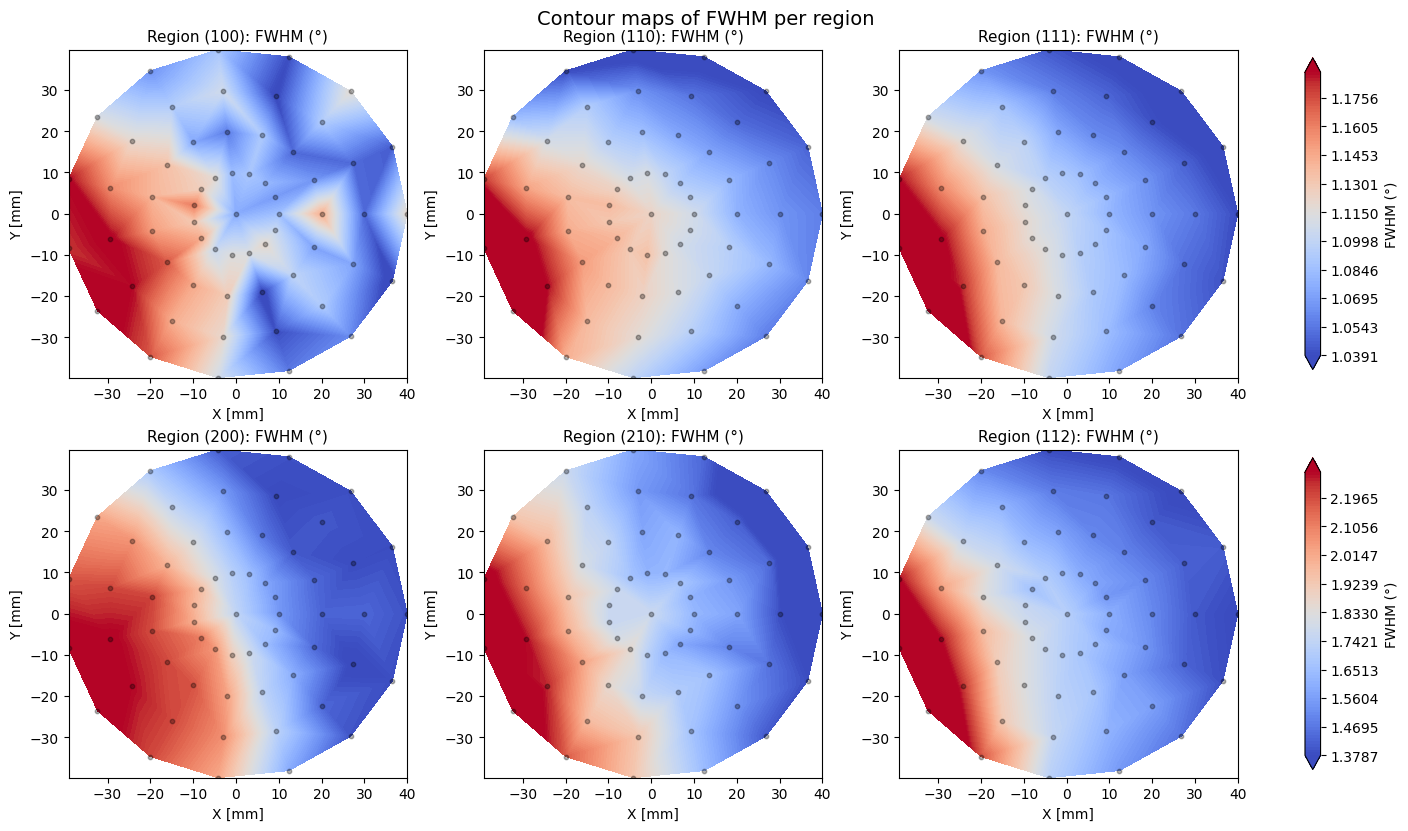

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from scipy.interpolate import griddata

# ---- your inputs ----
x_pos = np.asarray(x_coordinates, dtype=float)
y_pos = np.asarray(y_coordinates, dtype=float)
fw_raw = np.asarray(results, dtype=float)
N = x_pos.size


# ---- normalize fw_raw into shape (N, 6) ----
def normalize_fwhm(fw_raw, N):
    fw = np.asarray(fw_raw)
    if fw.ndim == 2 and fw.shape == (N, 6):
        return fw
    if fw.ndim == 1 and fw.size == N * 6:
        return fw.reshape(N, 6)
    if fw.ndim == 2 and fw.shape[0] == N * 6 and fw.shape[1] == 6:
        blocks = np.split(fw, 6, axis=0)
        return np.column_stack([blocks[j][:, j] for j in range(6)])
    if fw.ndim == 2 and fw.shape == (N * 6, 1):
        return fw.reshape(N, 6)
    raise ValueError(f"Cannot reshape results with shape {fw.shape} to (N,6).")

fwhm = normalize_fwhm(fw_raw, N)

# ---- helpers for plotting ----
def _unique_xy(x, y, z):
    arr = np.column_stack([x, y, z])
    keys = np.ascontiguousarray(arr[:, :2]).view(
        np.dtype((np.void, arr[:, :2].dtype.itemsize * 2))
    ).ravel()
    _, idx = np.unique(keys, return_index=True)
    idx = np.sort(idx)
    return arr[idx, 0], arr[idx, 1], arr[idx, 2]


def _contour_one(ax, xs, ys, zs, title, nlevels=100, cmap="coolwarm", try_grid_fallback=True):
    m = np.isfinite(xs) & np.isfinite(ys) & np.isfinite(zs)
    xs, ys, zs = xs[m], ys[m], zs[m]
    if len(xs) == 0:
        ax.text(0.5, 0.5, "No data", ha='center', va='center', transform=ax.transAxes)
        ax.set_axis_off(); return None

    xs, ys, zs = _unique_xy(xs, ys, zs)
    if len(xs) < 3:
        ax.text(0.5, 0.5, "Too few points", ha='center', va='center', transform=ax.transAxes)
        ax.set_axis_off(); return None

    # robust color limits
    vmin = np.nanpercentile(zs, 5)
    vmax = np.nanpercentile(zs, 95)
    if not np.isfinite(vmin) or not np.isfinite(vmax) or vmin == vmax:
        vmin, vmax = float(np.nanmin(zs)), float(np.nanmax(zs))
        if not np.isfinite(vmin) or vmin == vmax:
            ax.text(0.5, 0.5, "No variation", ha='center', va='center', transform=ax.transAxes)
            ax.set_axis_off(); return None

    # triangulation or grid fallback
    try:
        tri = Triangulation(xs, ys)
        cf = ax.tricontourf(tri, zs, levels=np.linspace(vmin, vmax, nlevels),
                            extend='both', cmap=cmap)
    except Exception:
        if not try_grid_fallback:
            ax.text(0.5, 0.5, "Triangulation failed", ha='center', va='center', transform=ax.transAxes)
            ax.set_axis_off(); return None

        gx = np.linspace(xs.min(), xs.max(), 60)
        gy = np.linspace(ys.min(), ys.max(), 60)
        GX, GY = np.meshgrid(gx, gy)
        GZ = griddata((xs, ys), zs, (GX, GY), method='linear')
        if np.isnan(GZ).all():
            GZ = griddata((xs, ys), zs, (GX, GY), method='nearest')
        if np.isnan(GZ).all():
            ax.text(0.5, 0.5, "Insufficient geometry", ha='center', va='center', transform=ax.transAxes)
            ax.set_axis_off(); return None

        cf = ax.contourf(GX, GY, GZ, levels=np.linspace(vmin, vmax, nlevels),
                         extend='both', cmap=cmap)

    # no contour lines — only color map
    ax.scatter(xs, ys, s=10, c='k', alpha=0.3)  # optional: show measurement points
    ax.set_title(title, fontsize=11)
    ax.set_xlabel("X [mm]")
    ax.set_ylabel("Y [mm]")
    return cf

# ---- plot with coolwarm colormap ----
titles = [f"Region {REGION_NAMES[i]}" for i in range(6)]
fig, axes = plt.subplots(2, 3, figsize=(14, 8), constrained_layout=True)
cfs = []
for i in range(6):
    r, c = divmod(i, 3)
    cf = _contour_one(axes[r, c], x_pos, y_pos, fwhm[:, i],
                      title=f"{titles[i]}: FWHM (°)", cmap="coolwarm")
    cfs.append(cf)

# row-wise colorbars
for r in range(2):
    row = [cfs[r*3 + j] for j in range(3) if cfs[r*3 + j] is not None]
    if row:
        fig.colorbar(row[0], ax=axes[r, :], shrink=0.95, label="FWHM (°)")



plt.suptitle("Contour maps of FWHM per region", y=1.02, fontsize=14)
plt.show()


### Contour all Peak Intensity

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from scipy.interpolate import griddata

# ---- inputs ----
x_pos = np.asarray(x_coordinates, dtype=float)
y_pos = np.asarray(y_coordinates, dtype=float)
pi_raw = np.asarray(peak_intensity, dtype=float)   # <-- use intensity here
N = x_pos.size

# ---- normalize into shape (N, 6) ----
def normalize_six(arr, N):
    a = np.asarray(arr)
    if a.ndim == 2 and a.shape == (N, 6):
        return a
    if a.ndim == 1 and a.size == N * 6:
        return a.reshape(N, 6)
    if a.ndim == 2 and a.shape[0] == N * 6 and a.shape[1] == 6:
        blocks = np.split(a, 6, axis=0)
        return np.column_stack([blocks[j][:, j] for j in range(6)])
    if a.ndim == 2 and a.shape == (N * 6, 1):
        return a.reshape(N, 6)
    raise ValueError(f"Cannot reshape array with shape {a.shape} to (N,6).")

peakI = normalize_six(pi_raw, N)   # (N, 6)

# ---- helpers ----
def _unique_xy(x, y, z):
    arr = np.column_stack([x, y, z])
    keys = np.ascontiguousarray(arr[:, :2]).view(
        np.dtype((np.void, arr[:, :2].dtype.itemsize * 2))
    ).ravel()
    _, idx = np.unique(keys, return_index=True)
    idx = np.sort(idx)
    return arr[idx, 0], arr[idx, 1], arr[idx, 2]

def _contour_one(ax, xs, ys, zs, title, nlevels=100, cmap="coolwarm", try_grid_fallback=True):
    m = np.isfinite(xs) & np.isfinite(ys) & np.isfinite(zs)
    xs, ys, zs = xs[m], ys[m], zs[m]
    if len(xs) == 0:
        ax.text(0.5, 0.5, "No data", ha='center', va='center', transform=ax.transAxes)
        ax.set_axis_off(); return None

    xs, ys, zs = _unique_xy(xs, ys, zs)
    if len(xs) < 3:
        ax.text(0.5, 0.5, "Too few points", ha='center', va='center', transform=ax.transAxes)
        ax.set_axis_off(); return None

    # color limits
    vmin = np.nanpercentile(zs, 5)
    vmax = np.nanpercentile(zs, 95)
    if not np.isfinite(vmin) or not np.isfinite(vmax) or vmin == vmax:
        vmin, vmax = float(np.nanmin(zs)), float(np.nanmax(zs))
        if not np.isfinite(vmin) or vmin == vmax:
            ax.text(0.5, 0.5, "No variation", ha='center', va='center', transform=ax.transAxes)
            ax.set_axis_off(); return None

    # triangulation or grid fallback
    try:
        tri = Triangulation(xs, ys)
        cf = ax.tricontourf(tri, zs, levels=np.linspace(vmin, vmax, nlevels),
                            extend='both', cmap=cmap)
    except Exception:
        if not try_grid_fallback:
            ax.text(0.5, 0.5, "Triangulation failed", ha='center', va='center', transform=ax.transAxes)
            ax.set_axis_off(); return None

        gx = np.linspace(xs.min(), xs.max(), 60)
        gy = np.linspace(ys.min(), ys.max(), 60)
        GX, GY = np.meshgrid(gx, gy)
        GZ = griddata((xs, ys), zs, (GX, GY), method='linear')
        if np.isnan(GZ).all():
            GZ = griddata((xs, ys), zs, (GX, GY), method='nearest')
        if np.isnan(GZ).all():
            ax.text(0.5, 0.5, "Insufficient geometry", ha='center', va='center', transform=ax.transAxes)
            ax.set_axis_off(); return None

        cf = ax.contourf(GX, GY, GZ, levels=np.linspace(vmin, vmax, nlevels),
                         extend='both', cmap=cmap)

    ax.scatter(xs, ys, s=10, c='k', alpha=0.3)  # optional markers
    ax.set_title(title, fontsize=11)
    ax.set_xlabel("X [mm]")
    ax.set_ylabel("Y [mm]")
    return cf

# ---- plot 6 intensity maps ----
titles = [f"Region {REGION_NAMES[i]}" for i in range(6)]  # keep your region labels
fig, axes = plt.subplots(2, 3, figsize=(14, 8), constrained_layout=True)
cfs = []
for i in range(6):
    r, c = divmod(i, 3)
    cf = _contour_one(axes[r, c], x_pos, y_pos, peakI[:, i],
                      title=f"{titles[i]}: Peak intensity [counts per second]",
                      cmap="coolwarm", nlevels=120)
    cfs.append(cf)

# row-wise colorbars
for r in range(2):
    row = [cfs[r*3 + j] for j in range(3) if cfs[r*3 + j] is not None]
    if row:
        fig.colorbar(row[0], ax=axes[r, :], shrink=0.95, label="Peak intensity")


plt.suptitle("Contour maps of peak intensity per region (coolwarm, no lines)", y=1.02, fontsize=14)
plt.show()


### 100 and 110 Planes, FHWM, Peak Intensity, Integrated area and Ratio

FWHM variability by plane (min, max, Δ):
  Region (100): min=1.0302, max=1.2046, Δ=0.1743
  Region (110): min=1.7133, max=1.8418, Δ=0.1284


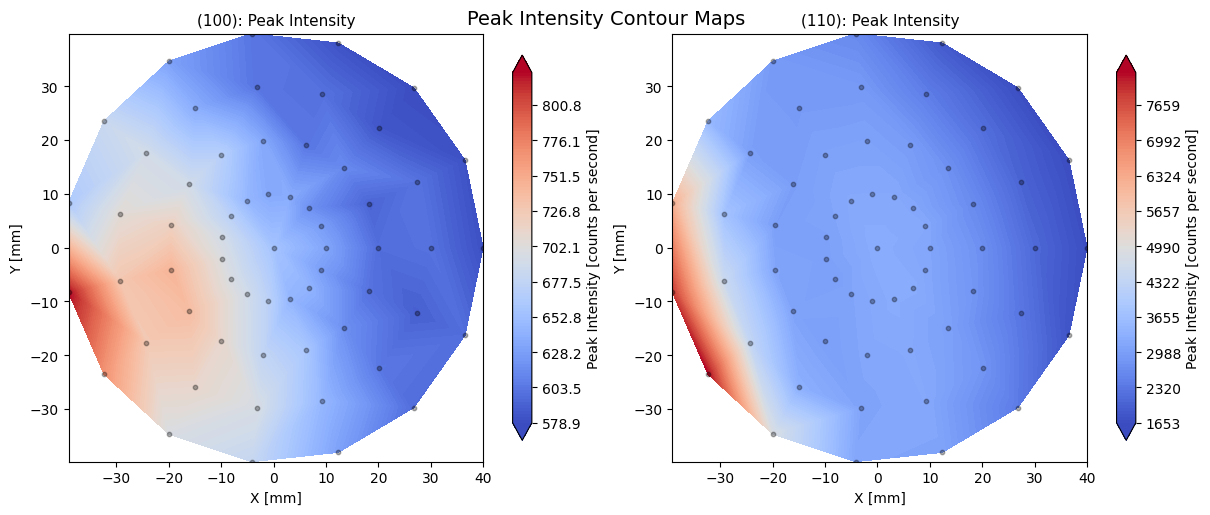

Peak intensity variability by plane (min, max, Δ):
  Region (100): min=578.8848, max=823.3555, Δ=244.4707
  Region (110): min=1653.0413, max=8270.9236, Δ=6617.8823


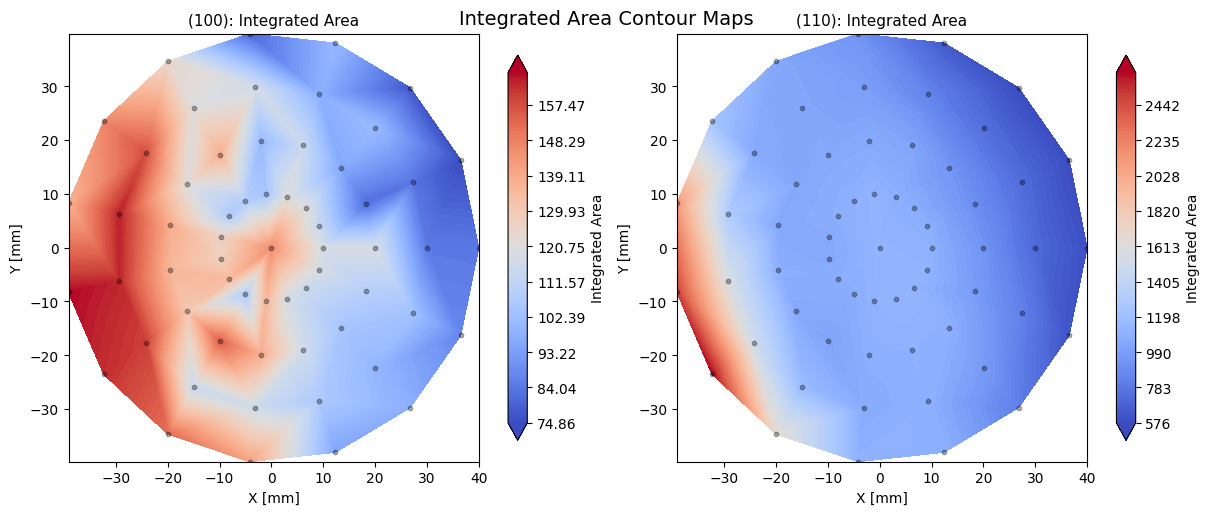

Integrated area variability by plane (min, max, Δ):
  Region (100): min=74.86, max=165.88, Δ=91.02
  Region (110): min=575.69, max=2632.43, Δ=2056.74



Area Ratio (100)/(110) statistics:
  min=0.062, max=0.155, mean=0.113, Δ=0.093


In [7]:
# ---- your inputs ----
x_pos = np.asarray(x_coordinates, dtype=float)
y_pos = np.asarray(y_coordinates, dtype=float)
fw_raw = np.asarray(results, dtype=float)
N = x_pos.size


# ---- normalize fw_raw into shape (N, 6) ----
def normalize_fwhm(fw_raw, N):
    fw = np.asarray(fw_raw)
    if fw.ndim == 2 and fw.shape == (N, 6):
        return fw
    if fw.ndim == 1 and fw.size == N * 6:
        return fw.reshape(N, 6)
    if fw.ndim == 2 and fw.shape[0] == N * 6 and fw.shape[1] == 6:
        blocks = np.split(fw, 6, axis=0)
        return np.column_stack([blocks[j][:, j] for j in range(6)])
    if fw.ndim == 2 and fw.shape == (N * 6, 1):
        return fw.reshape(N, 6)
    raise ValueError(f"Cannot reshape results with shape {fw.shape} to (N,6).")


fwhm = normalize_fwhm(fw_raw, N)


# ---- helpers for plotting ----
def _unique_xy(x, y, z):
    arr = np.column_stack([x, y, z])
    keys = np.ascontiguousarray(arr[:, :2]).view(
        np.dtype((np.void, arr[:, :2].dtype.itemsize * 2))
    ).ravel()
    _, idx = np.unique(keys, return_index=True)
    idx = np.sort(idx)
    return arr[idx, 0], arr[idx, 1], arr[idx, 2]


def _robust_minmax(zs):
    vmin = np.nanpercentile(zs, 5)
    vmax = np.nanpercentile(zs, 95)
    if not np.isfinite(vmin) or not np.isfinite(vmax) or vmin == vmax:
        vmin = float(np.nanmin(zs))
        vmax = float(np.nanmax(zs))
    return vmin, vmax


def _contour_one(
    ax,
    xs,
    ys,
    zs,
    title,
    nlevels=100,
    cmap="coolwarm",
    try_grid_fallback=True,
    levels=None,
):
    m = np.isfinite(xs) & np.isfinite(ys) & np.isfinite(zs)
    xs, ys, zs = xs[m], ys[m], zs[m]
    if len(xs) == 0:
        ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
        ax.set_axis_off()
        return None

    xs, ys, zs = _unique_xy(xs, ys, zs)
    if len(xs) < 3:
        ax.text(
            0.5, 0.5, "Too few points", ha="center", va="center", transform=ax.transAxes
        )
        ax.set_axis_off()
        return None

    finite_levels = None
    if levels is not None:
        finite_levels = np.asarray(levels, dtype=float)
        finite_levels = finite_levels[np.isfinite(finite_levels)]

    if finite_levels is None or finite_levels.size == 0:
        vmin, vmax = _robust_minmax(zs)
        if not np.isfinite(vmin) or not np.isfinite(vmax) or vmin == vmax:
            ax.text(
                0.5, 0.5, "No variation", ha="center", va="center", transform=ax.transAxes
            )
            ax.set_axis_off()
            return None
        finite_levels = np.linspace(vmin, vmax, nlevels)
    else:
        vmin = float(finite_levels.min())
        vmax = float(finite_levels.max())

    try:
        tri = Triangulation(xs, ys)
        cf = ax.tricontourf(
            tri,
            zs,
            levels=finite_levels,
            extend="both",
            cmap=cmap,
        )
    except Exception:
        if not try_grid_fallback:
            ax.text(
                0.5,
                0.5,
                "Triangulation failed",
                ha="center",
                va="center",
                transform=ax.transAxes,
            )
            ax.set_axis_off()
            return None

        gx = np.linspace(xs.min(), xs.max(), 60)
        gy = np.linspace(ys.min(), ys.max(), 60)
        GX, GY = np.meshgrid(gx, gy)
        GZ = griddata((xs, ys), zs, (GX, GY), method="linear")
        if np.isnan(GZ).all():
            GZ = griddata((xs, ys), zs, (GX, GY), method="nearest")
        if np.isnan(GZ).all():
            ax.text(
                0.5,
                0.5,
                "Insufficient geometry",
                ha="center",
                va="center",
                transform=ax.transAxes,
            )
            ax.set_axis_off()
            return None

        cf = ax.contourf(
            GX,
            GY,
            GZ,
            levels=finite_levels,
            extend="both",
            cmap=cmap,
        )

    ax.scatter(xs, ys, s=10, c="k", alpha=0.3)
    ax.set_title(title, fontsize=11)
    ax.set_xlabel("X [mm]")
    ax.set_ylabel("Y [mm]")
    return cf


# ---- Plot only (100) and (110) with independent colorbars ----
titles = [f"Region {REGION_NAMES[i]}" for i in range(6)]
planes_to_plot = [0, 1]  # (100) and (110)
plane_names = [REGION_NAMES[i] for i in planes_to_plot]

# Calculate statistics for each plane
plane_stats = []
for idx in planes_to_plot:
    plane_vals = np.asarray(fwhm[:, idx], dtype=float)
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        plane_stats.append(
            {"title": titles[idx], "min": pmin, "max": pmax, "range": pmax - pmin}
        )
    else:
        plane_stats.append(
            {"title": titles[idx], "min": np.nan, "max": np.nan, "range": np.nan}
        )

# ---- plot with individual colorbars for maximum variability ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

for plot_idx, plane_idx in enumerate(planes_to_plot):
    # Each plane gets its own levels based on its min/max
    plane_vals = fwhm[:, plane_idx]
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        if pmin == pmax:
            pmax = pmin + 1e-6
        plane_levels = np.linspace(pmin, pmax, 120)
    else:
        plane_levels = None
    
    cf = _contour_one(
        axes[plot_idx],
        x_pos,
        y_pos,
        fwhm[:, plane_idx],
        title=f"{plane_names[plot_idx]}: FWHM (°)",
        cmap="coolwarm",
        levels=plane_levels,
    )
    
    # Add individual colorbar for each subplot
    if cf is not None:
        fig.colorbar(cf, ax=axes[plot_idx], shrink=0.9, label="FWHM (°)")

plt.suptitle("FWHM Contour Map", y=1.00, fontsize=14)
plt.show()

print("FWHM variability by plane (min, max, Δ):")
for stat in plane_stats:
    title = stat["title"]
    if np.isnan(stat["range"]):
        print(f"  {title}: no finite data")
    else:
        print(
            f"  {title}: min={stat['min']:.4f}, max={stat['max']:.4f}, Δ={stat['range']:.4f}"
        )

# ===============================================================
# PEAK INTENSITY CONTOUR MAPS
# ===============================================================

# ---- inputs ----
pi_raw = np.asarray(peak_intensity, dtype=float)

def normalize_six(arr, N):
    a = np.asarray(arr)
    if a.ndim == 2 and a.shape == (N, 6):
        return a
    if a.ndim == 1 and a.size == N * 6:
        return a.reshape(N, 6)
    if a.ndim == 2 and a.shape[0] == N * 6 and a.shape[1] == 6:
        blocks = np.split(a, 6, axis=0)
        return np.column_stack([blocks[j][:, j] for j in range(6)])
    if a.ndim == 2 and a.shape == (N * 6, 1):
        return a.reshape(N, 6)
    raise ValueError(f"Cannot reshape array with shape {a.shape} to (N,6).")

peakI = normalize_six(pi_raw, N)

# Calculate statistics for each plane
plane_stats = []
for idx in planes_to_plot:
    plane_vals = np.asarray(peakI[:, idx], dtype=float)
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        plane_stats.append(
            {"title": titles[idx], "min": pmin, "max": pmax, "range": pmax - pmin}
        )
    else:
        plane_stats.append(
            {"title": titles[idx], "min": np.nan, "max": np.nan, "range": np.nan}
        )

# ---- plot with individual colorbars for maximum variability ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

for plot_idx, plane_idx in enumerate(planes_to_plot):
    # Each plane gets its own levels based on its min/max
    plane_vals = peakI[:, plane_idx]
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        if pmin == pmax:
            pmax = pmin + 1e-6
        plane_levels = np.linspace(pmin, pmax, 120)
    else:
        plane_levels = None
    
    cf = _contour_one(
        axes[plot_idx],
        x_pos,
        y_pos,
        peakI[:, plane_idx],
        title=f"{plane_names[plot_idx]}: Peak Intensity",
        cmap="coolwarm",
        levels=plane_levels,
    )
    
    # Add individual colorbar for each subplot
    if cf is not None:
        fig.colorbar(cf, ax=axes[plot_idx], shrink=0.9, label="Peak Intensity [counts per second]")

plt.suptitle("Peak Intensity Contour Maps", y=1.00, fontsize=14)
plt.show()

print("Peak intensity variability by plane (min, max, Δ):")
for stat in plane_stats:
    title = stat["title"]
    if np.isnan(stat["range"]):
        print(f"  {title}: no finite data")
    else:
        print(
            f"  {title}: min={stat['min']:.4f}, max={stat['max']:.4f}, Δ={stat['range']:.4f}"
        )

# ===============================================================
# INTEGRATED AREA CONTOUR MAPS
# ===============================================================

# ---- inputs ----
area_raw = np.asarray(peak_areas, dtype=float)
peakA = normalize_six(area_raw, N)

# Calculate statistics for each plane
plane_stats = []
for idx in planes_to_plot:
    plane_vals = np.asarray(peakA[:, idx], dtype=float)
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        plane_stats.append(
            {"title": titles[idx], "min": pmin, "max": pmax, "range": pmax - pmin}
        )
    else:
        plane_stats.append(
            {"title": titles[idx], "min": np.nan, "max": np.nan, "range": np.nan}
        )

# ---- plot with individual colorbars for maximum variability ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

for plot_idx, plane_idx in enumerate(planes_to_plot):
    # Each plane gets its own levels based on its min/max
    plane_vals = peakA[:, plane_idx]
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        if pmin == pmax:
            pmax = pmin + 1e-6
        plane_levels = np.linspace(pmin, pmax, 120)
    else:
        plane_levels = None
    
    cf = _contour_one(
        axes[plot_idx],
        x_pos,
        y_pos,
        peakA[:, plane_idx],
        title=f"{plane_names[plot_idx]}: Integrated Area",
        cmap="coolwarm",
        levels=plane_levels,
    )
    
    # Add individual colorbar for each subplot
    if cf is not None:
        fig.colorbar(cf, ax=axes[plot_idx], shrink=0.9, label="Integrated Area")

plt.suptitle("Integrated Area Contour Maps", y=1.00, fontsize=14)
plt.show()

print("Integrated area variability by plane (min, max, Δ):")
for stat in plane_stats:
    title = stat["title"]
    if np.isnan(stat["range"]):
        print(f"  {title}: no finite data")
    else:
        print(
            f"  {title}: min={stat['min']:.2f}, max={stat['max']:.2f}, Δ={stat['range']:.2f}"
        )

# ===============================================================
# AREA RATIO (100)/(110) CONTOUR MAP
# ===============================================================

# Calculate the ratio of (100) to (110) integrated areas
area_100 = peakA[:, 0]  # (100) is index 0
area_110 = peakA[:, 1]  # (110) is index 1

# Calculate ratio, handling division by zero
with np.errstate(divide='ignore', invalid='ignore'):
    area_ratio = area_100 / area_110

# Replace inf and -inf with NaN
area_ratio[~np.isfinite(area_ratio)] = np.nan

# Plot the ratio
fig, ax = plt.subplots(1, 1, figsize=(8, 6), constrained_layout=True)

# Get statistics
finite_ratio = area_ratio[np.isfinite(area_ratio)]
if finite_ratio.size > 0:
    rmin = float(finite_ratio.min())
    rmax = float(finite_ratio.max())
    rmean = float(finite_ratio.mean())
    if rmin == rmax:
        rmax = rmin + 1e-6
    ratio_levels = np.linspace(rmin, rmax, 120)
else:
    ratio_levels = None

cf = _contour_one(
    ax,
    x_pos,
    y_pos,
    area_ratio,
    title="Area Ratio: (100)/(110)",
    cmap="coolwarm",
    levels= np.linspace(0.05, 0.25, 120),
)

if cf is not None:
    fig.colorbar(cf, ax=ax, shrink=0.9, label="Area Ratio (100)/(110)")

#plt.suptitle("Integrated Area Ratio Contour Map", y=1.02, fontsize=12)
plt.show()

if finite_ratio.size > 0:
    print(f"\nArea Ratio (100)/(110) statistics:")
    print(f"  min={rmin:.3f}, max={rmax:.3f}, mean={rmean:.3f}, Δ={rmax-rmin:.3f}")
else:
    print("\nArea Ratio (100)/(110): No finite data")

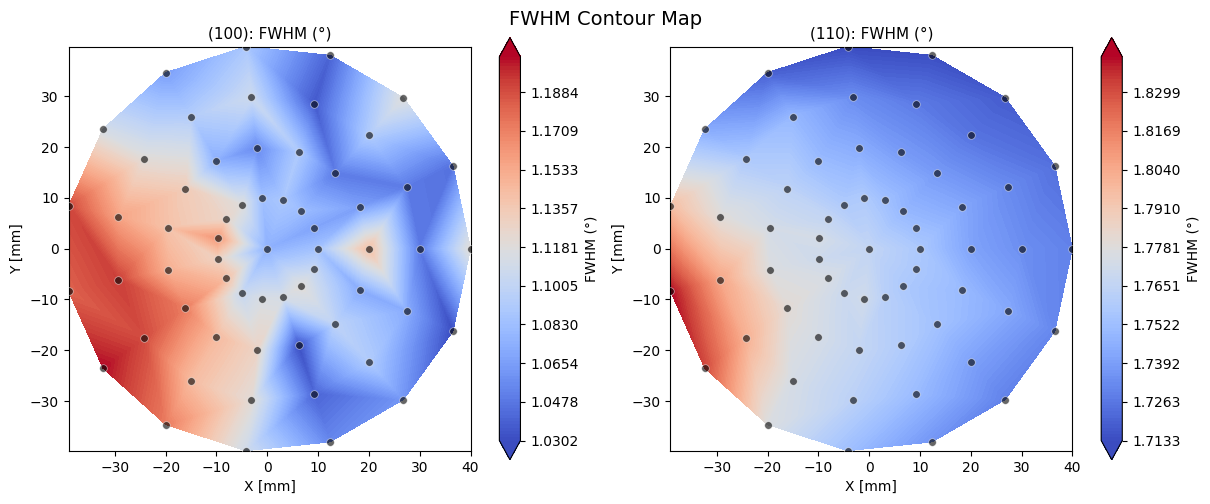

FWHM variability by plane (min, max, Δ):
  Region (100): min=1.0302, max=1.2046, Δ=0.1743
  Region (110): min=1.7133, max=1.8418, Δ=0.1284


Peak intensity variability by plane (min, max, Δ):
  Region (100): min=578.8848, max=823.3555, Δ=244.4707
  Region (110): min=1653.0413, max=8270.9236, Δ=6617.8823


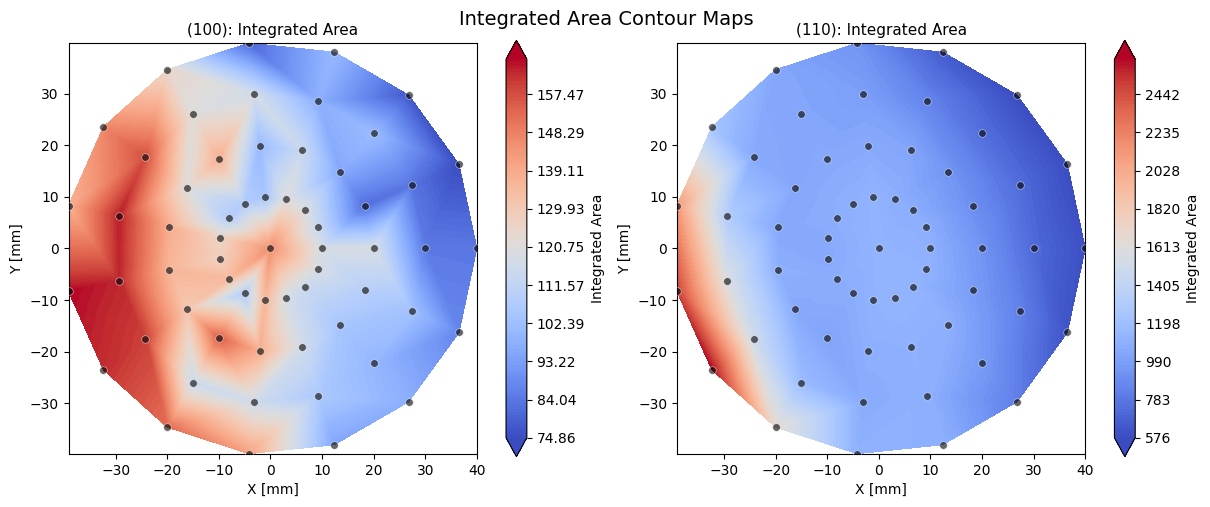

Integrated area variability by plane (min, max, Δ):
  Region (100): min=74.86, max=165.88, Δ=91.02
  Region (110): min=575.69, max=2632.43, Δ=2056.74


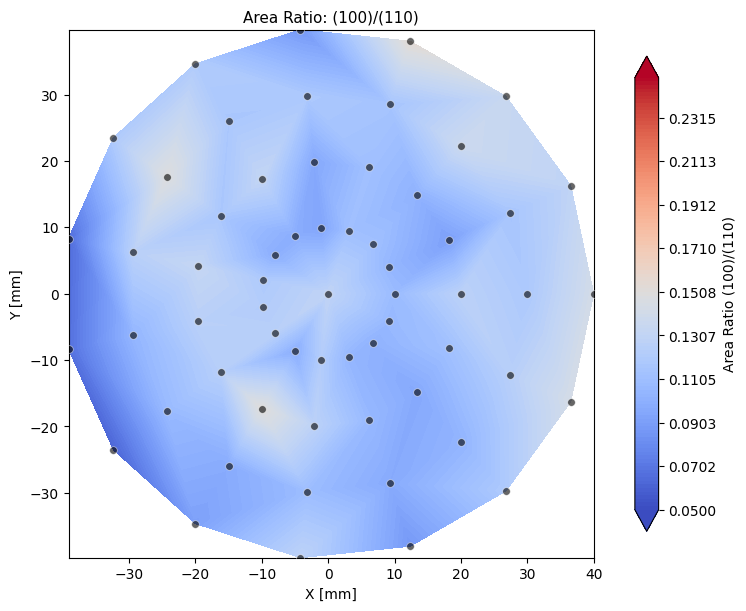


Area Ratio (100)/(110) statistics:
  min=0.062, max=0.155, mean=0.113, Δ=0.093


In [8]:
# ---- your inputs ----
x_pos = np.asarray(x_coordinates, dtype=float)
y_pos = np.asarray(y_coordinates, dtype=float)
fw_raw = np.asarray(results, dtype=float)
N = x_pos.size


# ---- normalize fw_raw into shape (N, 6) ----
def normalize_fwhm(fw_raw, N):
    fw = np.asarray(fw_raw)
    if fw.ndim == 2 and fw.shape == (N, 6):
        return fw
    if fw.ndim == 1 and fw.size == N * 6:
        return fw.reshape(N, 6)
    if fw.ndim == 2 and fw.shape[0] == N * 6 and fw.shape[1] == 6:
        blocks = np.split(fw, 6, axis=0)
        return np.column_stack([blocks[j][:, j] for j in range(6)])
    if fw.ndim == 2 and fw.shape == (N * 6, 1):
        return fw.reshape(N, 6)
    raise ValueError(f"Cannot reshape results with shape {fw.shape} to (N,6).")


fwhm = normalize_fwhm(fw_raw, N)


# ---- helpers for plotting ----
def _unique_xy(x, y, z):
    arr = np.column_stack([x, y, z])
    keys = np.ascontiguousarray(arr[:, :2]).view(
        np.dtype((np.void, arr[:, :2].dtype.itemsize * 2))
    ).ravel()
    _, idx = np.unique(keys, return_index=True)
    idx = np.sort(idx)
    return arr[idx, 0], arr[idx, 1], arr[idx, 2]


def _robust_minmax(zs):
    vmin = np.nanpercentile(zs, 5)
    vmax = np.nanpercentile(zs, 95)
    if not np.isfinite(vmin) or not np.isfinite(vmax) or vmin == vmax:
        vmin = float(np.nanmin(zs))
        vmax = float(np.nanmax(zs))
    return vmin, vmax


def _contour_one(
    ax,
    xs_all,
    ys_all,
    zs_all,
    title,
    nlevels=100,
    cmap="coolwarm",
    levels=None,
):
    """
    Create smooth contour plot using triangulation.
    Shows all measurement points with markers.
    """
    # Separate finite and NaN data points
    mask_finite = np.isfinite(xs_all) & np.isfinite(ys_all) & np.isfinite(zs_all)
    xs = xs_all[mask_finite]
    ys = ys_all[mask_finite]
    zs = zs_all[mask_finite]
    
    if len(xs) == 0:
        ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
        # Still show all measurement points even if no data
        ax.scatter(xs_all, ys_all, s=30, c='red', marker='x', alpha=0.6, linewidths=2)
        ax.set_title(title, fontsize=11)
        ax.set_xlabel("X [mm]")
        ax.set_ylabel("Y [mm]")
        ax.set_aspect('equal', adjustable='box')
        return None

    xs, ys, zs = _unique_xy(xs, ys, zs)
    
    if len(xs) < 3:
        ax.text(0.5, 0.5, "Too few points", ha="center", va="center", transform=ax.transAxes)
        # Show all measurement points
        ax.scatter(xs_all, ys_all, s=30, c='red', marker='x', alpha=0.6, linewidths=2)
        ax.set_title(title, fontsize=11)
        ax.set_xlabel("X [mm]")
        ax.set_ylabel("Y [mm]")
        ax.set_aspect('equal', adjustable='box')
        return None

    # Determine color levels
    finite_levels = None
    if levels is not None:
        finite_levels = np.asarray(levels, dtype=float)
        finite_levels = finite_levels[np.isfinite(finite_levels)]

    if finite_levels is None or finite_levels.size == 0:
        vmin, vmax = _robust_minmax(zs)
        if not np.isfinite(vmin) or not np.isfinite(vmax) or vmin == vmax:
            ax.text(
                0.5, 0.5, "No variation", ha="center", va="center", transform=ax.transAxes
            )
            ax.set_title(title, fontsize=11)
            ax.set_xlabel("X [mm]")
            ax.set_ylabel("Y [mm]")
            ax.set_aspect('equal', adjustable='box')
            return None
        finite_levels = np.linspace(vmin, vmax, nlevels)
    else:
        vmin = float(finite_levels.min())
        vmax = float(finite_levels.max())

    # Use triangulation for smooth edges
    try:
        tri = Triangulation(xs, ys)
        cf = ax.tricontourf(
            tri,
            zs,
            levels=finite_levels,
            extend="both",
            cmap=cmap,
        )
    except Exception:
        # Fallback: try grid interpolation
        gx = np.linspace(xs.min(), xs.max(), 100)
        gy = np.linspace(ys.min(), ys.max(), 100)
        GX, GY = np.meshgrid(gx, gy)
        GZ = griddata((xs, ys), zs, (GX, GY), method="linear")
        if np.isnan(GZ).all():
            GZ = griddata((xs, ys), zs, (GX, GY), method="nearest")
        if np.isnan(GZ).all():
            ax.text(0.5, 0.5, "Triangulation failed", ha="center", va="center", transform=ax.transAxes)
            ax.set_title(title, fontsize=11)
            ax.set_xlabel("X [mm]")
            ax.set_ylabel("Y [mm]")
            ax.set_aspect('equal', adjustable='box')
            return None
        
        cf = ax.contourf(GX, GY, GZ, levels=finite_levels, extend="both", cmap=cmap)

    # Scatter plot: show ALL measurement points
    # Black circles for detected peaks
    if np.sum(mask_finite) > 0:
        ax.scatter(xs_all[mask_finite], ys_all[mask_finite], 
                   s=30, c="k", alpha=0.6, edgecolors='white', linewidths=0.5, zorder=5)
    
    # Red X for missing/undetected peaks
    if np.sum(~mask_finite) > 0:
        ax.scatter(xs_all[~mask_finite], ys_all[~mask_finite], 
                   s=30, c="red", marker='x', alpha=0.8, linewidths=2, zorder=5)
    
    ax.set_title(title, fontsize=11)
    ax.set_xlabel("X [mm]")
    ax.set_ylabel("Y [mm]")
    ax.set_aspect('equal', adjustable='box')
    
    return cf


# ---- Plot only (100) and (110) with independent colorbars ----
titles = [f"Region {REGION_NAMES[i]}" for i in range(6)]
planes_to_plot = [0, 1]  # (100) and (110)
plane_names = [REGION_NAMES[i] for i in planes_to_plot]

# Calculate statistics for each plane
plane_stats = []
for idx in planes_to_plot:
    plane_vals = np.asarray(fwhm[:, idx], dtype=float)
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        plane_stats.append(
            {"title": titles[idx], "min": pmin, "max": pmax, "range": pmax - pmin}
        )
    else:
        plane_stats.append(
            {"title": titles[idx], "min": np.nan, "max": np.nan, "range": np.nan}
        )

# ---- plot with individual colorbars for maximum variability ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

for plot_idx, plane_idx in enumerate(planes_to_plot):
    # Each plane gets its own levels based on its min/max
    plane_vals = fwhm[:, plane_idx]
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        if pmin == pmax:
            pmax = pmin + 1e-6
        plane_levels = np.linspace(pmin, pmax, 120)
    else:
        plane_levels = None
    
    cf = _contour_one(
        axes[plot_idx],
        x_pos,
        y_pos,
        fwhm[:, plane_idx],
        title=f"{plane_names[plot_idx]}: FWHM (°)",
        cmap="coolwarm",
        levels=plane_levels,
    )
    
    # Add individual colorbar for each subplot
    if cf is not None:
        fig.colorbar(cf, ax=axes[plot_idx], shrink=0.9, label="FWHM (°)")

plt.suptitle("FWHM Contour Map", y=1.00, fontsize=14)
plt.show()

print("FWHM variability by plane (min, max, Δ):")
for stat in plane_stats:
    title = stat["title"]
    if np.isnan(stat["range"]):
        print(f"  {title}: no finite data")
    else:
        print(
            f"  {title}: min={stat['min']:.4f}, max={stat['max']:.4f}, Δ={stat['range']:.4f}"
        )

# ===============================================================
# PEAK INTENSITY CONTOUR MAPS
# ===============================================================

# ---- inputs ----
pi_raw = np.asarray(peak_intensity, dtype=float)

def normalize_six(arr, N):
    a = np.asarray(arr)
    if a.ndim == 2 and a.shape == (N, 6):
        return a
    if a.ndim == 1 and a.size == N * 6:
        return a.reshape(N, 6)
    if a.ndim == 2 and a.shape[0] == N * 6 and a.shape[1] == 6:
        blocks = np.split(a, 6, axis=0)
        return np.column_stack([blocks[j][:, j] for j in range(6)])
    if a.ndim == 2 and a.shape == (N * 6, 1):
        return a.reshape(N, 6)
    raise ValueError(f"Cannot reshape array with shape {a.shape} to (N,6).")

peakI = normalize_six(pi_raw, N)

# Calculate statistics for each plane
plane_stats = []
for idx in planes_to_plot:
    plane_vals = np.asarray(peakI[:, idx], dtype=float)
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        plane_stats.append(
            {"title": titles[idx], "min": pmin, "max": pmax, "range": pmax - pmin}
        )
    else:
        plane_stats.append(
            {"title": titles[idx], "min": np.nan, "max": np.nan, "range": np.nan}
        )

# ---- plot with individual colorbars for maximum variability ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

for plot_idx, plane_idx in enumerate(planes_to_plot):
    # Each plane gets its own levels based on its min/max
    plane_vals = peakI[:, plane_idx]
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        if pmin == pmax:
            pmax = pmin + 1e-6
        plane_levels = np.linspace(pmin, pmax, 120)
    else:
        plane_levels = None
    
    cf = _contour_one(
        axes[plot_idx],
        x_pos,
        y_pos,
        peakI[:, plane_idx],
        title=f"{plane_names[plot_idx]}: Peak Intensity",
        cmap="coolwarm",
        levels=plane_levels,
    )
    
    # Add individual colorbar for each subplot
    if cf is not None:
        fig.colorbar(cf, ax=axes[plot_idx], shrink=0.9, label="Peak Intensity [counts per second]")

plt.suptitle("Peak Intensity Contour Maps", y=1.00, fontsize=14)
plt.show()

print("Peak intensity variability by plane (min, max, Δ):")
for stat in plane_stats:
    title = stat["title"]
    if np.isnan(stat["range"]):
        print(f"  {title}: no finite data")
    else:
        print(
            f"  {title}: min={stat['min']:.4f}, max={stat['max']:.4f}, Δ={stat['range']:.4f}"
        )

# ===============================================================
# INTEGRATED AREA CONTOUR MAPS
# ===============================================================

# ---- inputs ----
area_raw = np.asarray(peak_areas, dtype=float)
peakA = normalize_six(area_raw, N)

# Calculate statistics for each plane
plane_stats = []
for idx in planes_to_plot:
    plane_vals = np.asarray(peakA[:, idx], dtype=float)
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        plane_stats.append(
            {"title": titles[idx], "min": pmin, "max": pmax, "range": pmax - pmin}
        )
    else:
        plane_stats.append(
            {"title": titles[idx], "min": np.nan, "max": np.nan, "range": np.nan}
        )

# ---- plot with individual colorbars for maximum variability ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

for plot_idx, plane_idx in enumerate(planes_to_plot):
    # Each plane gets its own levels based on its min/max
    plane_vals = peakA[:, plane_idx]
    finite_vals = plane_vals[np.isfinite(plane_vals)]
    
    if finite_vals.size:
        pmin = float(finite_vals.min())
        pmax = float(finite_vals.max())
        if pmin == pmax:
            pmax = pmin + 1e-6
        plane_levels = np.linspace(pmin, pmax, 120)
    else:
        plane_levels = None
    
    cf = _contour_one(
        axes[plot_idx],
        x_pos,
        y_pos,
        peakA[:, plane_idx],
        title=f"{plane_names[plot_idx]}: Integrated Area",
        cmap="coolwarm",
        levels=plane_levels,
    )
    
    # Add individual colorbar for each subplot
    if cf is not None:
        fig.colorbar(cf, ax=axes[plot_idx], shrink=0.9, label="Integrated Area")

plt.suptitle("Integrated Area Contour Maps", y=1.00, fontsize=14)
plt.show()

print("Integrated area variability by plane (min, max, Δ):")
for stat in plane_stats:
    title = stat["title"]
    if np.isnan(stat["range"]):
        print(f"  {title}: no finite data")
    else:
        print(
            f"  {title}: min={stat['min']:.2f}, max={stat['max']:.2f}, Δ={stat['range']:.2f}"
        )

# ===============================================================
# AREA RATIO (100)/(110) CONTOUR MAP
# ===============================================================

# Calculate the ratio of (100) to (110) integrated areas
area_100 = peakA[:, 0]  # (100) is index 0
area_110 = peakA[:, 1]  # (110) is index 1

# Calculate ratio, handling division by zero
with np.errstate(divide='ignore', invalid='ignore'):
    area_ratio = area_100 / area_110

# Replace inf and -inf with NaN
area_ratio[~np.isfinite(area_ratio)] = np.nan

# Plot the ratio
fig, ax = plt.subplots(1, 1, figsize=(8, 6), constrained_layout=True)

# Get statistics
finite_ratio = area_ratio[np.isfinite(area_ratio)]
if finite_ratio.size > 0:
    rmin = float(finite_ratio.min())
    rmax = float(finite_ratio.max())
    rmean = float(finite_ratio.mean())
    if rmin == rmax:
        rmax = rmin + 1e-6
    ratio_levels = np.linspace(rmin, rmax, 120)
else:
    ratio_levels = None

cf = _contour_one(
    ax,
    x_pos,
    y_pos,
    area_ratio,
    title="Area Ratio: (100)/(110)",
    cmap="coolwarm",
    levels=np.linspace(0.05, 0.25, 120),
)

if cf is not None:
    fig.colorbar(cf, ax=ax, shrink=0.9, label="Area Ratio (100)/(110)")

#plt.suptitle("Integrated Area Ratio Contour Map", y=1.02, fontsize=12)
plt.show()

if finite_ratio.size > 0:
    print(f"\nArea Ratio (100)/(110) statistics:")
    print(f"  min={rmin:.3f}, max={rmax:.3f}, mean={rmean:.3f}, Δ={rmax-rmin:.3f}")
else:
    print("\nArea Ratio (100)/(110): No finite data")

### Integrated Area by distance to Target Center

3D Distance to target statistics:
  Distance range: 158.64 - 224.99 mm
  Mean distance: 192.11 mm


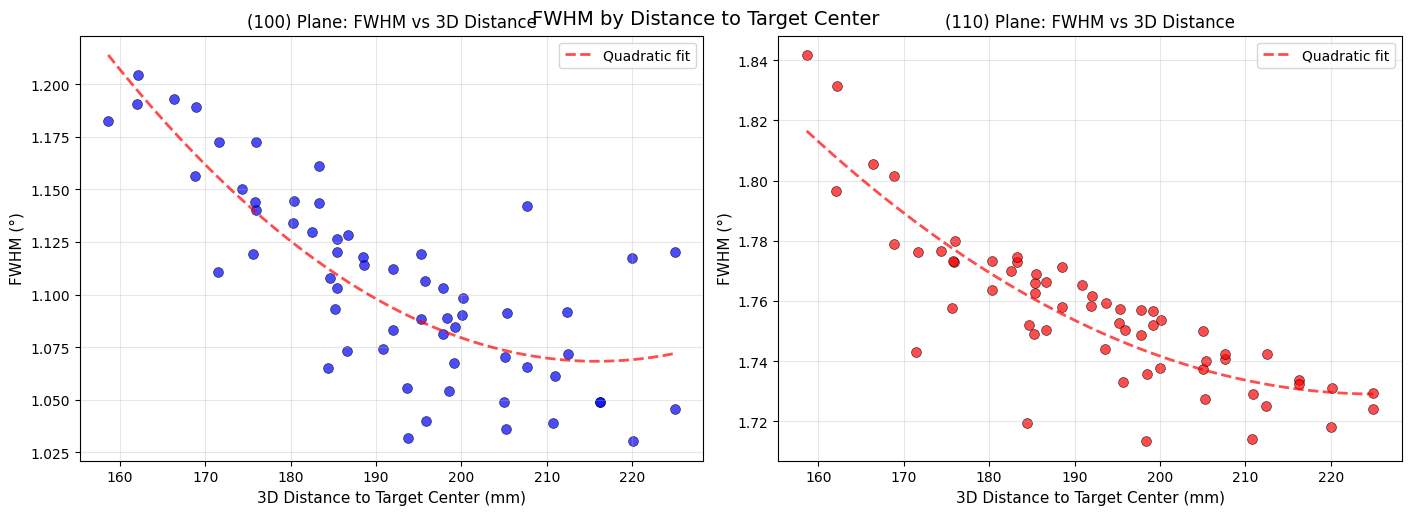

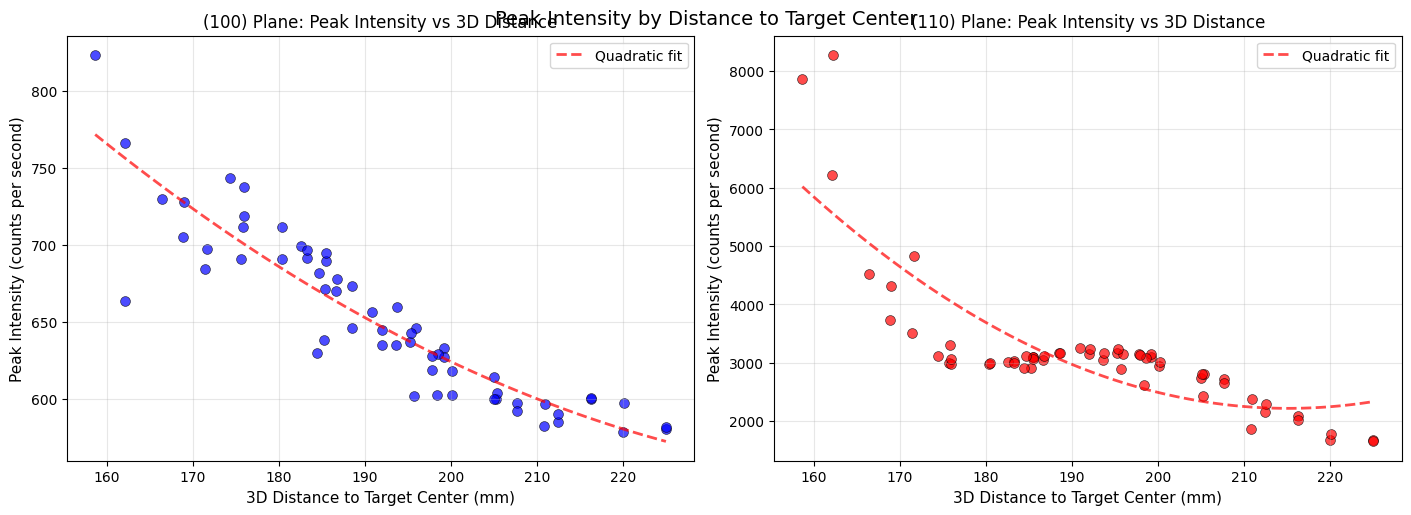

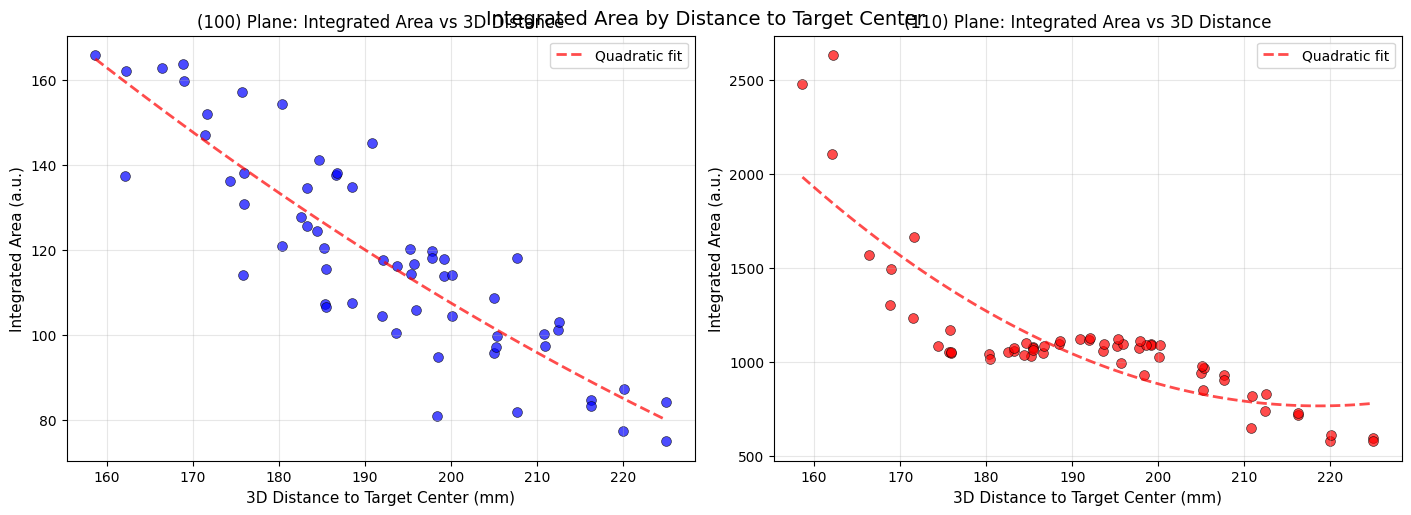


Correlation coefficients (Pearson) with 3D distance:

FWHM:
  (100): r = -0.750
  (110): r = -0.824

Peak Intensity:
  (100): r = -0.904
  (110): r = -0.754

Integrated Area:
  (100): r = -0.870
  (110): r = -0.782

Area Ratio (100)/(110): r = 0.346


In [9]:
# ===============================================================
# INTEGRATED AREA BY DISTANCE TO TARGET CENTER
# ===============================================================

# Target position (mm)
target_x = 399.88
target_y = 224.1
target_z = 332.15

# Wafer center position (x=0, y=0 in XRD coordinates corresponds to this)
wafer_center_x = 242.5
wafer_center_y = 257.0
wafer_center_z = 435.0

# Convert XRD coordinates to real-world coordinates
# The x_coordinates from XRD need to have their sign flipped
x_pos_real = -np.asarray(x_coordinates, dtype=float) + wafer_center_x
y_pos_real = np.asarray(y_coordinates, dtype=float) + wafer_center_y
z_pos_real = np.full_like(x_pos_real, wafer_center_z)  # Assuming all measurements at same z

# Calculate 3D distance from each point to target
distances_3d = np.sqrt(
    (x_pos_real - target_x)**2 + 
    (y_pos_real - target_y)**2 + 
    (z_pos_real - target_z)**2
)

print("3D Distance to target statistics:")
print(f"  Distance range: {distances_3d.min():.2f} - {distances_3d.max():.2f} mm")
print(f"  Mean distance: {distances_3d.mean():.2f} mm")

# Get data for (100) and (110) planes
area_100 = peakA[:, 0]  # (100) integrated area
area_110 = peakA[:, 1]  # (110) integrated area
fwhm_100 = fwhm[:, 0]   # (100) FWHM
fwhm_110 = fwhm[:, 1]   # (110) FWHM
intensity_100 = peakI[:, 0]  # (100) peak intensity
intensity_110 = peakI[:, 1]  # (110) peak intensity

# Calculate area ratio
with np.errstate(divide='ignore', invalid='ignore'):
    area_ratio = area_100 / area_110
area_ratio[~np.isfinite(area_ratio)] = np.nan

# ===============================================================
# PLOT 1: FWHM vs 3D Distance
# ===============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

# (100) FWHM
ax = axes[0]
mask_finite = np.isfinite(fwhm_100) & np.isfinite(distances_3d)
ax.scatter(distances_3d[mask_finite], fwhm_100[mask_finite], 
           c='blue', s=50, alpha=0.7, edgecolors='black', linewidths=0.5)
ax.set_xlabel('3D Distance to Target Center (mm)', fontsize=11)
ax.set_ylabel('FWHM (°)', fontsize=11)
ax.set_title('(100) Plane: FWHM vs 3D Distance', fontsize=12)
ax.grid(True, alpha=0.3)

if np.sum(mask_finite) > 3:
    z = np.polyfit(distances_3d[mask_finite], fwhm_100[mask_finite], 2)
    p = np.poly1d(z)
    x_trend = np.linspace(distances_3d[mask_finite].min(), distances_3d[mask_finite].max(), 100)
    ax.plot(x_trend, p(x_trend), 'r--', linewidth=2, alpha=0.7, label='Quadratic fit')
    ax.legend()

# (110) FWHM
ax = axes[1]
mask_finite = np.isfinite(fwhm_110) & np.isfinite(distances_3d)
ax.scatter(distances_3d[mask_finite], fwhm_110[mask_finite], 
           c='red', s=50, alpha=0.7, edgecolors='black', linewidths=0.5)
ax.set_xlabel('3D Distance to Target Center (mm)', fontsize=11)
ax.set_ylabel('FWHM (°)', fontsize=11)
ax.set_title('(110) Plane: FWHM vs 3D Distance', fontsize=12)
ax.grid(True, alpha=0.3)

if np.sum(mask_finite) > 3:
    z = np.polyfit(distances_3d[mask_finite], fwhm_110[mask_finite], 2)
    p = np.poly1d(z)
    x_trend = np.linspace(distances_3d[mask_finite].min(), distances_3d[mask_finite].max(), 100)
    ax.plot(x_trend, p(x_trend), 'r--', linewidth=2, alpha=0.7, label='Quadratic fit')
    ax.legend()

plt.suptitle('FWHM by Distance to Target Center', y=1.00, fontsize=14)
plt.show()

# ===============================================================
# PLOT 2: Peak Intensity vs 3D Distance
# ===============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

# (100) Peak Intensity
ax = axes[0]
mask_finite = np.isfinite(intensity_100) & np.isfinite(distances_3d)
ax.scatter(distances_3d[mask_finite], intensity_100[mask_finite], 
           c='blue', s=50, alpha=0.7, edgecolors='black', linewidths=0.5)
ax.set_xlabel('3D Distance to Target Center (mm)', fontsize=11)
ax.set_ylabel('Peak Intensity (counts per second)', fontsize=11)
ax.set_title('(100) Plane: Peak Intensity vs 3D Distance', fontsize=12)
ax.grid(True, alpha=0.3)

if np.sum(mask_finite) > 3:
    z = np.polyfit(distances_3d[mask_finite], intensity_100[mask_finite], 2)
    p = np.poly1d(z)
    x_trend = np.linspace(distances_3d[mask_finite].min(), distances_3d[mask_finite].max(), 100)
    ax.plot(x_trend, p(x_trend), 'r--', linewidth=2, alpha=0.7, label='Quadratic fit')
    ax.legend()

# (110) Peak Intensity
ax = axes[1]
mask_finite = np.isfinite(intensity_110) & np.isfinite(distances_3d)
ax.scatter(distances_3d[mask_finite], intensity_110[mask_finite], 
           c='red', s=50, alpha=0.7, edgecolors='black', linewidths=0.5)
ax.set_xlabel('3D Distance to Target Center (mm)', fontsize=11)
ax.set_ylabel('Peak Intensity (counts per second)', fontsize=11)
ax.set_title('(110) Plane: Peak Intensity vs 3D Distance', fontsize=12)
ax.grid(True, alpha=0.3)

if np.sum(mask_finite) > 3:
    z = np.polyfit(distances_3d[mask_finite], intensity_110[mask_finite], 2)
    p = np.poly1d(z)
    x_trend = np.linspace(distances_3d[mask_finite].min(), distances_3d[mask_finite].max(), 100)
    ax.plot(x_trend, p(x_trend), 'r--', linewidth=2, alpha=0.7, label='Quadratic fit')
    ax.legend()

plt.suptitle('Peak Intensity by Distance to Target Center', y=1.00, fontsize=14)
plt.show()

# ===============================================================
# PLOT 3: Integrated Area vs 3D Distance
# ===============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

# (100) Integrated Area
ax = axes[0]
mask_finite = np.isfinite(area_100) & np.isfinite(distances_3d)
ax.scatter(distances_3d[mask_finite], area_100[mask_finite], 
           c='blue', s=50, alpha=0.7, edgecolors='black', linewidths=0.5)
ax.set_xlabel('3D Distance to Target Center (mm)', fontsize=11)
ax.set_ylabel('Integrated Area (a.u.)', fontsize=11)
ax.set_title('(100) Plane: Integrated Area vs 3D Distance', fontsize=12)
ax.grid(True, alpha=0.3)

if np.sum(mask_finite) > 3:
    z = np.polyfit(distances_3d[mask_finite], area_100[mask_finite], 2)
    p = np.poly1d(z)
    x_trend = np.linspace(distances_3d[mask_finite].min(), distances_3d[mask_finite].max(), 100)
    ax.plot(x_trend, p(x_trend), 'r--', linewidth=2, alpha=0.7, label='Quadratic fit')
    ax.legend()

# (110) Integrated Area
ax = axes[1]
mask_finite = np.isfinite(area_110) & np.isfinite(distances_3d)
ax.scatter(distances_3d[mask_finite], area_110[mask_finite], 
           c='red', s=50, alpha=0.7, edgecolors='black', linewidths=0.5)
ax.set_xlabel('3D Distance to Target Center (mm)', fontsize=11)
ax.set_ylabel('Integrated Area (a.u.)', fontsize=11)
ax.set_title('(110) Plane: Integrated Area vs 3D Distance', fontsize=12)
ax.grid(True, alpha=0.3)

if np.sum(mask_finite) > 3:
    z = np.polyfit(distances_3d[mask_finite], area_110[mask_finite], 2)
    p = np.poly1d(z)
    x_trend = np.linspace(distances_3d[mask_finite].min(), distances_3d[mask_finite].max(), 100)
    ax.plot(x_trend, p(x_trend), 'r--', linewidth=2, alpha=0.7, label='Quadratic fit')
    ax.legend()

plt.suptitle('Integrated Area by Distance to Target Center', y=1.00, fontsize=14)
plt.show()

# ===============================================================
# PLOT 4: Area Ratio (100)/(110) vs 3D Distance
# ===============================================================
fig, ax = plt.subplots(1, 1, figsize=(8, 6), constrained_layout=True)

mask_finite = np.isfinite(area_ratio) & np.isfinite(distances_3d)
ax.scatter(distances_3d[mask_finite], area_ratio[mask_finite], 
           c='green', s=50, alpha=0.7, edgecolors='black', linewidths=0.5)
ax.set_xlabel('3D Distance to Target Center (mm)', fontsize=11)
ax.set_ylabel('Area Ratio (100)/(110)', fontsize=11)
ax.set_title('Area Ratio vs 3D Distance to Target', fontsize=12)
ax.grid(True, alpha=0.3)

if np.sum(mask_finite) > 3:
    z = np.polyfit(distances_3d[mask_finite], area_ratio[mask_finite], 2)
    p = np.poly1d(z)
    x_trend = np.linspace(distances_3d[mask_finite].min(), distances_3d[mask_finite].max(), 100)
    ax.plot(x_trend, p(x_trend), 'r--', linewidth=2, alpha=0.7, label='Quadratic fit')
    ax.legend()

plt.show()

# Print correlation statistics
print("\nCorrelation coefficients (Pearson) with 3D distance:")
for metric_name, data_100, data_110 in [
    ("FWHM", fwhm_100, fwhm_110),
    ("Peak Intensity", intensity_100, intensity_110),
    ("Integrated Area", area_100, area_110)
]:
    print(f"\n{metric_name}:")
    for plane_name, data in [("(100)", data_100), ("(110)", data_110)]:
        mask = np.isfinite(data) & np.isfinite(distances_3d)
        if np.sum(mask) > 2:
            corr = np.corrcoef(distances_3d[mask], data[mask])[0, 1]
            print(f"  {plane_name}: r = {corr:.3f}")

# Area ratio
mask = np.isfinite(area_ratio) & np.isfinite(distances_3d)
if np.sum(mask) > 2:
    corr = np.corrcoef(distances_3d[mask], area_ratio[mask])[0, 1]
    print(f"\nArea Ratio (100)/(110): r = {corr:.3f}")